In [1]:
import sys
import time
from utils import *
from tqdm import *
from deep_lstm import *
from glob import glob
import os
from collections import Counter
from matplotlib import pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow.contrib import rnn

In [2]:
# parameters for training load_dataset
data_dir = './data'
dataset_name = 'cnn'
sub_dataset_train = 'training'
sub_data_size_train = 28000

In [3]:
train, train_len, y  = new_load_dataset(data_dir, dataset_name, sub_data_size_train,sub_dataset_train)
num_train = len(train)
print('Number of training: ', num_train)

28000it [00:07, 3732.23it/s]

Number of training:  28000


In [4]:
# parameters for validation load_dataset
sub_dataset_dev = 'validation'
sub_data_size_dev = 2000

In [5]:
dev, dev_len, y_dev = new_load_dataset(data_dir, dataset_name, sub_data_size_dev,sub_dataset_dev)
num_dev = len(dev)
print('Number of validation:', num_dev)

2000it [00:00, 4210.36it/s]

Number of validation: 2000


In [6]:
maxlen_train = max(train_len)
maxlen_dev = max(dev_len)
avelen_train = np.ceil(np.mean(train_len))
avelen_dev = np.ceil(np.mean(dev_len))
print('Data max len in train:', maxlen_train)
print('Data max len in validation:', maxlen_dev)
print('Data average len in train:', avelen_train)
print('Data average len in validation:', avelen_dev)

Data max len in train: 2015
Data max len in validation: 2005
Data average len in train: 777.0
Data average len in validation: 771.0


In [10]:
print('Build dictionary..')
word_dict = build_dict(train,max_words=70000)
entity_markers = list(set([w for w in word_dict.keys() if w.startswith('@entity')] + y))
entity_markers = ['<unk_entity>'] + entity_markers
entity_dict = {w: index for (index, w) in enumerate(entity_markers)}
print('Entity markers: %d' % len(entity_dict))
num_labels = len(entity_dict)

Build dictionary..
#Words: 71440 -> 70000
('the', 1135030)
(',', 1013611)
('.', 868925)
('to', 530700)
('"', 514180)
...
('56.96', 1)
('0.72', 1)
('mid-section', 1)
('super-combi', 1)
('6,118', 1)
Entity markers: 454


In [8]:
# parameters for embedding matrix
vocab_size = max(word_dict.values()) + 1 
embd_size = 100
print('vocab size:', vocab_size)
print('embedding dim:', embd_size)

vocab size: 70002
embedding dim: 100


In [9]:
glove_embd_w = load_glove_weights('./Embedding', embd_size, vocab_size, word_dict)

Found 400000 word vectors.
embed_matrix.shape (70002, 100)


In [10]:
# prepate the training data 
train_x, train_l, train_y = vectorize(train, y, word_dict, entity_dict)

vectorize: Vectorization: processed 0 / 28000
vectorize: Vectorization: processed 1000 / 28000
vectorize: Vectorization: processed 2000 / 28000
vectorize: Vectorization: processed 3000 / 28000
vectorize: Vectorization: processed 4000 / 28000
vectorize: Vectorization: processed 5000 / 28000
vectorize: Vectorization: processed 6000 / 28000
vectorize: Vectorization: processed 7000 / 28000
vectorize: Vectorization: processed 8000 / 28000
vectorize: Vectorization: processed 9000 / 28000
vectorize: Vectorization: processed 10000 / 28000
vectorize: Vectorization: processed 11000 / 28000
vectorize: Vectorization: processed 12000 / 28000
vectorize: Vectorization: processed 13000 / 28000
vectorize: Vectorization: processed 14000 / 28000
vectorize: Vectorization: processed 15000 / 28000
vectorize: Vectorization: processed 16000 / 28000
vectorize: Vectorization: processed 17000 / 28000
vectorize: Vectorization: processed 18000 / 28000
vectorize: Vectorization: processed 19000 / 28000
vectorize: Ve

In [11]:
# prepate the validation data 
dev_x, dev_l, dev_y = vectorize(dev, y_dev, word_dict, entity_dict)

vectorize: Vectorization: processed 0 / 2000
vectorize: Vectorization: processed 1000 / 2000


In [12]:
rnn_type = 'lstm'
hidden_size = 128
dropout_rate_embd = 0.1
dropout_rate_encoder = 0.2
learning_rate = 0.001
batch_size = 32
optimizer_name = 'adam'
depth = 2
num_epoches = 25
eval_iter = 200
model_path = 'checkpoint/deeplstm.ckpt'

In [13]:
# padding and get each mini batch for training
all_train = gen_examples(train_x, train_l, train_y, batch_size)

In [14]:
# padding and get each mini batch for validation
all_dev = gen_examples(dev_x, dev_l, dev_y, batch_size)

In [15]:
train_loss,train_acc,dev_loss,dev_acc = DeepLSTM(rnn_type, hidden_size, dropout_rate_embd,dropout_rate_encoder,learning_rate, 
                                                 batch_size, optimizer_name, num_epoches, eval_iter,depth,
                                                 vocab_size, embd_size, glove_embd_w,num_labels, model_path,all_train, all_dev)

--------------------------------------------------
Creating TF computation graph...
Using LSTM Cells
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
Build the Model Done!
--------------------------------------------------
Initial Test...
Initial Dev Accuracy: 0.00 %
--------------------------------------------------
Start training

Epoch = 0, Iter = 41 (max = 875), Loss = 12.28, Elapsed Time = 45.289 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 799
Epoch = 0, Iter = 42 (max = 875), Loss = 7.09, Elapsed Time = 46.357 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 711
Epoch = 0, Iter = 43 (max = 875), Loss = 10.16, Elapsed Time = 47.315 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 934
Epoch = 0, Iter = 44 (max = 875), Loss = 10.90, Elapsed Time = 48.603 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1261
Epoch = 0, Iter = 45 (max = 875), Loss = 9.65, Elapsed Time = 50.270 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 750
Epoch = 0, Iter = 46 (max = 875), Loss = 9.65, Elapsed Time = 51.311 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 981
Epoch = 0, Iter = 47 (max = 875), Loss = 7.21, Elapsed Time = 52.678 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1180
Epoch = 0, Iter = 48 (max = 875), Loss = 9.

Epoch = 0, Iter = 101 (max = 875), Loss = 10.13, Elapsed Time = 112.583 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 365
Epoch = 0, Iter = 102 (max = 875), Loss = 4.99, Elapsed Time = 113.084 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 586
Epoch = 0, Iter = 103 (max = 875), Loss = 10.03, Elapsed Time = 113.886 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1230
Epoch = 0, Iter = 104 (max = 875), Loss = 10.10, Elapsed Time = 115.438 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 267
Epoch = 0, Iter = 105 (max = 875), Loss = 8.42, Elapsed Time = 115.813 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1319
Epoch = 0, Iter = 106 (max = 875), Loss = 9.18, Elapsed Time = 117.638 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 795
Epoch = 0, Iter = 107 (max = 875), Loss = 8.17, Elapsed Time = 118.811 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 758
Epoch = 0, Iter = 108 (max = 

Epoch = 0, Iter = 161 (max = 875), Loss = 6.05, Elapsed Time = 170.864 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 696
Epoch = 0, Iter = 162 (max = 875), Loss = 7.79, Elapsed Time = 171.812 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1178
Epoch = 0, Iter = 163 (max = 875), Loss = 5.69, Elapsed Time = 173.339 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 299
Epoch = 0, Iter = 164 (max = 875), Loss = 5.18, Elapsed Time = 173.745 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 325
Epoch = 0, Iter = 165 (max = 875), Loss = 9.43, Elapsed Time = 174.157 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 282
Epoch = 0, Iter = 166 (max = 875), Loss = 9.00, Elapsed Time = 174.530 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 781
Epoch = 0, Iter = 167 (max = 875), Loss = 6.09, Elapsed Time = 175.572 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 788
Epoch = 0, Iter = 168 (max 

Epoch = 0, Iter = 220 (max = 875), Loss = 6.59, Elapsed Time = 287.405 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 718
Epoch = 0, Iter = 221 (max = 875), Loss = 8.38, Elapsed Time = 288.453 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1192
Epoch = 0, Iter = 222 (max = 875), Loss = 8.51, Elapsed Time = 290.156 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 467
Epoch = 0, Iter = 223 (max = 875), Loss = 7.43, Elapsed Time = 290.836 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 952
Epoch = 0, Iter = 224 (max = 875), Loss = 7.27, Elapsed Time = 292.077 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 650
Epoch = 0, Iter = 225 (max = 875), Loss = 7.52, Elapsed Time = 292.938 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1860
Epoch = 0, Iter = 226 (max = 875), Loss = 8.92, Elapsed Time = 295.377 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 990
Epoch = 0, Iter = 227 (max = 87

Epoch = 0, Iter = 280 (max = 875), Loss = 8.28, Elapsed Time = 356.063 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 973
Epoch = 0, Iter = 281 (max = 875), Loss = 7.65, Elapsed Time = 357.290 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1393
Epoch = 0, Iter = 282 (max = 875), Loss = 6.37, Elapsed Time = 359.034 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1538
Epoch = 0, Iter = 283 (max = 875), Loss = 5.48, Elapsed Time = 360.966 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 307
Epoch = 0, Iter = 284 (max = 875), Loss = 5.58, Elapsed Time = 361.358 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 604
Epoch = 0, Iter = 285 (max = 875), Loss = 8.01, Elapsed Time = 362.144 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1696
Epoch = 0, Iter = 286 (max = 875), Loss = 7.90, Elapsed Time = 364.346 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 749
Epoch = 0, Iter = 287 (max = 8

Epoch = 0, Iter = 340 (max = 875), Loss = 6.97, Elapsed Time = 418.960 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 593
Epoch = 0, Iter = 341 (max = 875), Loss = 5.65, Elapsed Time = 419.718 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 521
Epoch = 0, Iter = 342 (max = 875), Loss = 4.54, Elapsed Time = 420.382 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 864
Epoch = 0, Iter = 343 (max = 875), Loss = 8.48, Elapsed Time = 421.558 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 901
Epoch = 0, Iter = 344 (max = 875), Loss = 7.65, Elapsed Time = 422.681 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 936
Epoch = 0, Iter = 345 (max = 875), Loss = 5.23, Elapsed Time = 423.877 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1604
Epoch = 0, Iter = 346 (max = 875), Loss = 7.21, Elapsed Time = 425.973 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 570
Epoch = 0, Iter = 347 (max = 875)

Dev Accuracy: 8.85 %
Batch Size = 32, # of Examples = 32, max_len = 1067
Epoch = 0, Iter = 400 (max = 875), Loss = 6.10, Elapsed Time = 526.581 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 809
Epoch = 0, Iter = 401 (max = 875), Loss = 8.28, Elapsed Time = 527.598 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 183
Epoch = 0, Iter = 402 (max = 875), Loss = 6.54, Elapsed Time = 527.835 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 479
Epoch = 0, Iter = 403 (max = 875), Loss = 6.57, Elapsed Time = 528.466 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 541
Epoch = 0, Iter = 404 (max = 875), Loss = 7.60, Elapsed Time = 529.191 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 498
Epoch = 0, Iter = 405 (max = 875), Loss = 5.51, Elapsed Time = 529.915 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 840
Epoch = 0, Iter = 406 (max = 875), Loss = 5.24, Elapsed Time = 531.033 (s), Acc = 21.88
Batch S

Epoch = 0, Iter = 459 (max = 875), Loss = 8.11, Elapsed Time = 585.479 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 831
Epoch = 0, Iter = 460 (max = 875), Loss = 8.03, Elapsed Time = 586.594 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 884
Epoch = 0, Iter = 461 (max = 875), Loss = 5.52, Elapsed Time = 587.763 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 477
Epoch = 0, Iter = 462 (max = 875), Loss = 8.89, Elapsed Time = 588.372 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 380
Epoch = 0, Iter = 463 (max = 875), Loss = 6.89, Elapsed Time = 588.863 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 961
Epoch = 0, Iter = 464 (max = 875), Loss = 8.91, Elapsed Time = 590.104 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 575
Epoch = 0, Iter = 465 (max = 875), Loss = 7.90, Elapsed Time = 590.916 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 846
Epoch = 0, Iter = 466 (max = 87

Epoch = 0, Iter = 519 (max = 875), Loss = 6.89, Elapsed Time = 646.061 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 442
Epoch = 0, Iter = 520 (max = 875), Loss = 8.42, Elapsed Time = 646.636 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 856
Epoch = 0, Iter = 521 (max = 875), Loss = 9.40, Elapsed Time = 647.772 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 474
Epoch = 0, Iter = 522 (max = 875), Loss = 7.18, Elapsed Time = 648.415 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 817
Epoch = 0, Iter = 523 (max = 875), Loss = 6.92, Elapsed Time = 649.454 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 221
Epoch = 0, Iter = 524 (max = 875), Loss = 6.47, Elapsed Time = 649.749 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 362
Epoch = 0, Iter = 525 (max = 875), Loss = 6.34, Elapsed Time = 650.238 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1069
Epoch = 0, Iter = 526 (max = 8

Epoch = 0, Iter = 579 (max = 875), Loss = 7.58, Elapsed Time = 701.841 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1442
Epoch = 0, Iter = 580 (max = 875), Loss = 10.45, Elapsed Time = 703.645 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 450
Epoch = 0, Iter = 581 (max = 875), Loss = 9.81, Elapsed Time = 704.250 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 387
Epoch = 0, Iter = 582 (max = 875), Loss = 5.11, Elapsed Time = 704.794 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 791
Epoch = 0, Iter = 583 (max = 875), Loss = 8.91, Elapsed Time = 705.911 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 855
Epoch = 0, Iter = 584 (max = 875), Loss = 7.95, Elapsed Time = 707.023 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 585
Epoch = 0, Iter = 585 (max = 875), Loss = 8.71, Elapsed Time = 707.827 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1033
Epoch = 0, Iter = 586 (ma

Epoch = 0, Iter = 638 (max = 875), Loss = 9.51, Elapsed Time = 817.127 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1304
Epoch = 0, Iter = 639 (max = 875), Loss = 8.14, Elapsed Time = 818.793 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1109
Epoch = 0, Iter = 640 (max = 875), Loss = 7.54, Elapsed Time = 820.198 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 186
Epoch = 0, Iter = 641 (max = 875), Loss = 8.53, Elapsed Time = 820.474 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 569
Epoch = 0, Iter = 642 (max = 875), Loss = 7.54, Elapsed Time = 821.269 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1233
Epoch = 0, Iter = 643 (max = 875), Loss = 9.03, Elapsed Time = 822.867 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 664
Epoch = 0, Iter = 644 (max = 875), Loss = 8.83, Elapsed Time = 823.731 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1021
Epoch = 0, Iter = 645 (max

Epoch = 0, Iter = 698 (max = 875), Loss = 8.36, Elapsed Time = 885.265 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1408
Epoch = 0, Iter = 699 (max = 875), Loss = 6.08, Elapsed Time = 887.094 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 839
Epoch = 0, Iter = 700 (max = 875), Loss = 8.04, Elapsed Time = 888.188 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 875
Epoch = 0, Iter = 701 (max = 875), Loss = 7.38, Elapsed Time = 889.340 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 176
Epoch = 0, Iter = 702 (max = 875), Loss = 6.91, Elapsed Time = 889.586 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1428
Epoch = 0, Iter = 703 (max = 875), Loss = 7.18, Elapsed Time = 891.451 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 892
Epoch = 0, Iter = 704 (max = 875), Loss = 7.77, Elapsed Time = 892.648 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 389
Epoch = 0, Iter = 705 (max = 8

Epoch = 0, Iter = 758 (max = 875), Loss = 9.40, Elapsed Time = 945.374 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1078
Epoch = 0, Iter = 759 (max = 875), Loss = 7.09, Elapsed Time = 946.786 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 889
Epoch = 0, Iter = 760 (max = 875), Loss = 6.80, Elapsed Time = 947.927 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 993
Epoch = 0, Iter = 761 (max = 875), Loss = 8.69, Elapsed Time = 949.274 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 407
Epoch = 0, Iter = 762 (max = 875), Loss = 5.44, Elapsed Time = 949.811 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 511
Epoch = 0, Iter = 763 (max = 875), Loss = 5.92, Elapsed Time = 950.518 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1369
Epoch = 0, Iter = 764 (max = 875), Loss = 7.73, Elapsed Time = 952.354 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 882
Epoch = 0, Iter = 765 (max = 8

Epoch = 0, Iter = 817 (max = 875), Loss = 7.60, Elapsed Time = 1064.936 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 369
Epoch = 0, Iter = 818 (max = 875), Loss = 5.08, Elapsed Time = 1065.472 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1076
Epoch = 0, Iter = 819 (max = 875), Loss = 6.24, Elapsed Time = 1066.916 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 141
Epoch = 0, Iter = 820 (max = 875), Loss = 6.39, Elapsed Time = 1067.115 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1802
Epoch = 0, Iter = 821 (max = 875), Loss = 8.09, Elapsed Time = 1069.443 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 277
Epoch = 0, Iter = 822 (max = 875), Loss = 6.94, Elapsed Time = 1069.817 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 907
Epoch = 0, Iter = 823 (max = 875), Loss = 6.08, Elapsed Time = 1071.053 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 976
Epoch = 0, Iter = 824 

Epoch = 1, Iter = 1 (max = 875), Loss = 6.01, Elapsed Time = 1.072 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 401
Epoch = 1, Iter = 2 (max = 875), Loss = 8.34, Elapsed Time = 1.611 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1652
Epoch = 1, Iter = 3 (max = 875), Loss = 6.64, Elapsed Time = 3.813 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 708
Epoch = 1, Iter = 4 (max = 875), Loss = 7.26, Elapsed Time = 4.724 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 461
Epoch = 1, Iter = 5 (max = 875), Loss = 6.58, Elapsed Time = 5.312 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 456
Epoch = 1, Iter = 6 (max = 875), Loss = 4.57, Elapsed Time = 5.955 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 799
Epoch = 1, Iter = 7 (max = 875), Loss = 7.67, Elapsed Time = 7.023 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1214
Epoch = 1, Iter = 8 (max = 875), Loss = 9.17, Elapsed Tim

Epoch = 1, Iter = 62 (max = 875), Loss = 7.89, Elapsed Time = 67.776 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 249
Epoch = 1, Iter = 63 (max = 875), Loss = 7.85, Elapsed Time = 68.116 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 502
Epoch = 1, Iter = 64 (max = 875), Loss = 7.41, Elapsed Time = 68.776 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 945
Epoch = 1, Iter = 65 (max = 875), Loss = 10.42, Elapsed Time = 70.020 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 742
Epoch = 1, Iter = 66 (max = 875), Loss = 6.41, Elapsed Time = 70.981 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1126
Epoch = 1, Iter = 67 (max = 875), Loss = 10.01, Elapsed Time = 72.534 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1100
Epoch = 1, Iter = 68 (max = 875), Loss = 7.18, Elapsed Time = 73.989 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 541
Epoch = 1, Iter = 69 (max = 875), Loss = 8

Epoch = 1, Iter = 122 (max = 875), Loss = 8.61, Elapsed Time = 131.665 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 922
Epoch = 1, Iter = 123 (max = 875), Loss = 5.94, Elapsed Time = 132.864 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 533
Epoch = 1, Iter = 124 (max = 875), Loss = 8.42, Elapsed Time = 133.595 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1124
Epoch = 1, Iter = 125 (max = 875), Loss = 7.58, Elapsed Time = 135.039 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 696
Epoch = 1, Iter = 126 (max = 875), Loss = 8.08, Elapsed Time = 135.946 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 683
Epoch = 1, Iter = 127 (max = 875), Loss = 8.72, Elapsed Time = 136.870 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1074
Epoch = 1, Iter = 128 (max = 875), Loss = 7.52, Elapsed Time = 138.262 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 747
Epoch = 1, Iter = 129 (max = 8

Epoch = 1, Iter = 182 (max = 875), Loss = 8.98, Elapsed Time = 190.864 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1250
Epoch = 1, Iter = 183 (max = 875), Loss = 9.58, Elapsed Time = 192.462 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1860
Epoch = 1, Iter = 184 (max = 875), Loss = 7.83, Elapsed Time = 194.860 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 357
Epoch = 1, Iter = 185 (max = 875), Loss = 5.01, Elapsed Time = 195.393 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 792
Epoch = 1, Iter = 186 (max = 875), Loss = 8.06, Elapsed Time = 196.470 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 521
Epoch = 1, Iter = 187 (max = 875), Loss = 4.70, Elapsed Time = 197.182 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 546
Epoch = 1, Iter = 188 (max = 875), Loss = 8.35, Elapsed Time = 197.889 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 682
Epoch = 1, Iter = 189 (max = 8

Epoch = 1, Iter = 241 (max = 875), Loss = 5.56, Elapsed Time = 302.258 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1157
Epoch = 1, Iter = 242 (max = 875), Loss = 7.72, Elapsed Time = 303.856 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 226
Epoch = 1, Iter = 243 (max = 875), Loss = 7.41, Elapsed Time = 304.165 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 532
Epoch = 1, Iter = 244 (max = 875), Loss = 9.60, Elapsed Time = 304.872 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 537
Epoch = 1, Iter = 245 (max = 875), Loss = 5.93, Elapsed Time = 305.590 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1097
Epoch = 1, Iter = 246 (max = 875), Loss = 6.15, Elapsed Time = 307.052 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 514
Epoch = 1, Iter = 247 (max = 875), Loss = 6.41, Elapsed Time = 307.763 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 1741
Epoch = 1, Iter = 248 (max 

Epoch = 1, Iter = 301 (max = 875), Loss = 8.53, Elapsed Time = 368.304 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 612
Epoch = 1, Iter = 302 (max = 875), Loss = 6.67, Elapsed Time = 369.134 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 239
Epoch = 1, Iter = 303 (max = 875), Loss = 5.22, Elapsed Time = 369.475 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 525
Epoch = 1, Iter = 304 (max = 875), Loss = 5.09, Elapsed Time = 370.167 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1349
Epoch = 1, Iter = 305 (max = 875), Loss = 7.69, Elapsed Time = 371.969 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 896
Epoch = 1, Iter = 306 (max = 875), Loss = 5.59, Elapsed Time = 373.145 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1390
Epoch = 1, Iter = 307 (max = 875), Loss = 9.01, Elapsed Time = 374.921 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 902
Epoch = 1, Iter = 308 (max =

Epoch = 1, Iter = 361 (max = 875), Loss = 4.78, Elapsed Time = 432.907 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 961
Epoch = 1, Iter = 362 (max = 875), Loss = 7.53, Elapsed Time = 434.271 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1017
Epoch = 1, Iter = 363 (max = 875), Loss = 7.65, Elapsed Time = 435.598 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1501
Epoch = 1, Iter = 364 (max = 875), Loss = 7.65, Elapsed Time = 437.554 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1386
Epoch = 1, Iter = 365 (max = 875), Loss = 6.21, Elapsed Time = 439.335 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 295
Epoch = 1, Iter = 366 (max = 875), Loss = 6.03, Elapsed Time = 439.740 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 693
Epoch = 1, Iter = 367 (max = 875), Loss = 8.99, Elapsed Time = 440.665 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 421
Epoch = 1, Iter = 368 (max = 

Epoch = 1, Iter = 420 (max = 875), Loss = 8.46, Elapsed Time = 551.971 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 445
Epoch = 1, Iter = 421 (max = 875), Loss = 6.93, Elapsed Time = 552.608 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 387
Epoch = 1, Iter = 422 (max = 875), Loss = 4.52, Elapsed Time = 553.152 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1076
Epoch = 1, Iter = 423 (max = 875), Loss = 3.49, Elapsed Time = 554.648 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 363
Epoch = 1, Iter = 424 (max = 875), Loss = 7.89, Elapsed Time = 555.144 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 782
Epoch = 1, Iter = 425 (max = 875), Loss = 7.47, Elapsed Time = 556.262 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1021
Epoch = 1, Iter = 426 (max = 875), Loss = 9.07, Elapsed Time = 557.584 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 359
Epoch = 1, Iter = 427 (max = 

Epoch = 1, Iter = 480 (max = 875), Loss = 6.78, Elapsed Time = 611.608 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 691
Epoch = 1, Iter = 481 (max = 875), Loss = 5.69, Elapsed Time = 612.534 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1357
Epoch = 1, Iter = 482 (max = 875), Loss = 6.57, Elapsed Time = 614.363 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1461
Epoch = 1, Iter = 483 (max = 875), Loss = 6.28, Elapsed Time = 616.286 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 826
Epoch = 1, Iter = 484 (max = 875), Loss = 5.64, Elapsed Time = 617.407 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 907
Epoch = 1, Iter = 485 (max = 875), Loss = 6.08, Elapsed Time = 618.607 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1312
Epoch = 1, Iter = 486 (max = 875), Loss = 7.25, Elapsed Time = 620.322 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 655
Epoch = 1, Iter = 487 (max = 

Epoch = 1, Iter = 540 (max = 875), Loss = 6.36, Elapsed Time = 676.229 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1152
Epoch = 1, Iter = 541 (max = 875), Loss = 6.22, Elapsed Time = 677.760 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 823
Epoch = 1, Iter = 542 (max = 875), Loss = 8.51, Elapsed Time = 678.906 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1553
Epoch = 1, Iter = 543 (max = 875), Loss = 8.63, Elapsed Time = 681.003 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1446
Epoch = 1, Iter = 544 (max = 875), Loss = 8.50, Elapsed Time = 682.889 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 556
Epoch = 1, Iter = 545 (max = 875), Loss = 3.51, Elapsed Time = 683.693 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 569
Epoch = 1, Iter = 546 (max = 875), Loss = 7.57, Elapsed Time = 684.446 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 491
Epoch = 1, Iter = 547 (max =

Dev Accuracy: 8.65 %
Batch Size = 32, # of Examples = 32, max_len = 467
Epoch = 1, Iter = 600 (max = 875), Loss = 8.80, Elapsed Time = 799.597 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 397
Epoch = 1, Iter = 601 (max = 875), Loss = 9.03, Elapsed Time = 800.140 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 762
Epoch = 1, Iter = 602 (max = 875), Loss = 7.75, Elapsed Time = 801.168 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1062
Epoch = 1, Iter = 603 (max = 875), Loss = 7.83, Elapsed Time = 802.592 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 271
Epoch = 1, Iter = 604 (max = 875), Loss = 5.06, Elapsed Time = 803.001 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 511
Epoch = 1, Iter = 605 (max = 875), Loss = 6.92, Elapsed Time = 803.671 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1474
Epoch = 1, Iter = 606 (max = 875), Loss = 8.25, Elapsed Time = 805.620 (s), Acc = 3.12
Batch S

Epoch = 1, Iter = 659 (max = 875), Loss = 5.73, Elapsed Time = 856.186 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 458
Epoch = 1, Iter = 660 (max = 875), Loss = 7.85, Elapsed Time = 856.869 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1010
Epoch = 1, Iter = 661 (max = 875), Loss = 7.53, Elapsed Time = 858.205 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 317
Epoch = 1, Iter = 662 (max = 875), Loss = 7.47, Elapsed Time = 858.657 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1167
Epoch = 1, Iter = 663 (max = 875), Loss = 6.08, Elapsed Time = 860.201 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 467
Epoch = 1, Iter = 664 (max = 875), Loss = 6.44, Elapsed Time = 860.823 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 403
Epoch = 1, Iter = 665 (max = 875), Loss = 6.18, Elapsed Time = 861.375 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 718
Epoch = 1, Iter = 666 (max =

Epoch = 1, Iter = 719 (max = 875), Loss = 7.00, Elapsed Time = 915.280 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 351
Epoch = 1, Iter = 720 (max = 875), Loss = 6.04, Elapsed Time = 915.767 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 223
Epoch = 1, Iter = 721 (max = 875), Loss = 7.75, Elapsed Time = 916.093 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 936
Epoch = 1, Iter = 722 (max = 875), Loss = 4.75, Elapsed Time = 917.346 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1093
Epoch = 1, Iter = 723 (max = 875), Loss = 8.35, Elapsed Time = 918.788 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1354
Epoch = 1, Iter = 724 (max = 875), Loss = 7.07, Elapsed Time = 920.567 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 598
Epoch = 1, Iter = 725 (max = 875), Loss = 3.34, Elapsed Time = 921.364 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 673
Epoch = 1, Iter = 726 (max =

Epoch = 1, Iter = 779 (max = 875), Loss = 8.91, Elapsed Time = 977.308 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 332
Epoch = 1, Iter = 780 (max = 875), Loss = 4.17, Elapsed Time = 977.753 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 934
Epoch = 1, Iter = 781 (max = 875), Loss = 6.11, Elapsed Time = 978.965 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1619
Epoch = 1, Iter = 782 (max = 875), Loss = 9.14, Elapsed Time = 981.144 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 490
Epoch = 1, Iter = 783 (max = 875), Loss = 7.91, Elapsed Time = 981.796 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1047
Epoch = 1, Iter = 784 (max = 875), Loss = 6.72, Elapsed Time = 983.222 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 984
Epoch = 1, Iter = 785 (max = 875), Loss = 8.03, Elapsed Time = 984.505 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 829
Epoch = 1, Iter = 786 (max 

Epoch = 1, Iter = 838 (max = 875), Loss = 7.61, Elapsed Time = 1095.926 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1706
Epoch = 1, Iter = 839 (max = 875), Loss = 6.36, Elapsed Time = 1098.162 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 562
Epoch = 1, Iter = 840 (max = 875), Loss = 8.60, Elapsed Time = 1098.936 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 684
Epoch = 1, Iter = 841 (max = 875), Loss = 7.00, Elapsed Time = 1099.875 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1878
Epoch = 1, Iter = 842 (max = 875), Loss = 8.75, Elapsed Time = 1102.375 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 813
Epoch = 1, Iter = 843 (max = 875), Loss = 9.07, Elapsed Time = 1103.452 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 991
Epoch = 1, Iter = 844 (max = 875), Loss = 6.78, Elapsed Time = 1104.812 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1176
Epoch = 1, Iter = 845 (

Epoch = 2, Iter = 23 (max = 875), Loss = 5.62, Elapsed Time = 26.518 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 715
Epoch = 2, Iter = 24 (max = 875), Loss = 6.44, Elapsed Time = 27.472 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 991
Epoch = 2, Iter = 25 (max = 875), Loss = 7.72, Elapsed Time = 28.788 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 283
Epoch = 2, Iter = 26 (max = 875), Loss = 3.62, Elapsed Time = 29.169 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 708
Epoch = 2, Iter = 27 (max = 875), Loss = 5.73, Elapsed Time = 30.080 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 793
Epoch = 2, Iter = 28 (max = 875), Loss = 7.42, Elapsed Time = 31.091 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 297
Epoch = 2, Iter = 29 (max = 875), Loss = 6.97, Elapsed Time = 31.477 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 319
Epoch = 2, Iter = 30 (max = 875), Loss = 6.91,

Epoch = 2, Iter = 83 (max = 875), Loss = 8.15, Elapsed Time = 93.090 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 253
Epoch = 2, Iter = 84 (max = 875), Loss = 7.63, Elapsed Time = 93.438 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1011
Epoch = 2, Iter = 85 (max = 875), Loss = 5.18, Elapsed Time = 94.765 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 274
Epoch = 2, Iter = 86 (max = 875), Loss = 8.91, Elapsed Time = 95.121 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 373
Epoch = 2, Iter = 87 (max = 875), Loss = 6.96, Elapsed Time = 95.647 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1342
Epoch = 2, Iter = 88 (max = 875), Loss = 5.37, Elapsed Time = 97.437 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 406
Epoch = 2, Iter = 89 (max = 875), Loss = 8.44, Elapsed Time = 97.979 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 343
Epoch = 2, Iter = 90 (max = 875), Loss = 5.9

Epoch = 2, Iter = 143 (max = 875), Loss = 8.08, Elapsed Time = 161.627 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 954
Epoch = 2, Iter = 144 (max = 875), Loss = 9.03, Elapsed Time = 162.947 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 591
Epoch = 2, Iter = 145 (max = 875), Loss = 8.94, Elapsed Time = 163.759 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 454
Epoch = 2, Iter = 146 (max = 875), Loss = 5.57, Elapsed Time = 164.391 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 795
Epoch = 2, Iter = 147 (max = 875), Loss = 5.42, Elapsed Time = 165.474 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1628
Epoch = 2, Iter = 148 (max = 875), Loss = 7.46, Elapsed Time = 167.698 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1185
Epoch = 2, Iter = 149 (max = 875), Loss = 8.68, Elapsed Time = 169.368 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1829
Epoch = 2, Iter = 150 (max =

Epoch = 2, Iter = 202 (max = 875), Loss = 7.96, Elapsed Time = 275.610 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 642
Epoch = 2, Iter = 203 (max = 875), Loss = 7.07, Elapsed Time = 276.487 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 482
Epoch = 2, Iter = 204 (max = 875), Loss = 6.54, Elapsed Time = 277.119 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 465
Epoch = 2, Iter = 205 (max = 875), Loss = 8.92, Elapsed Time = 277.739 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 423
Epoch = 2, Iter = 206 (max = 875), Loss = 7.35, Elapsed Time = 278.298 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 153
Epoch = 2, Iter = 207 (max = 875), Loss = 5.39, Elapsed Time = 278.515 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 229
Epoch = 2, Iter = 208 (max = 875), Loss = 5.96, Elapsed Time = 278.841 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 359
Epoch = 2, Iter = 209 (max = 

Epoch = 2, Iter = 262 (max = 875), Loss = 8.46, Elapsed Time = 332.588 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 232
Epoch = 2, Iter = 263 (max = 875), Loss = 8.05, Elapsed Time = 332.902 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 673
Epoch = 2, Iter = 264 (max = 875), Loss = 4.03, Elapsed Time = 333.798 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 417
Epoch = 2, Iter = 265 (max = 875), Loss = 6.47, Elapsed Time = 334.358 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 940
Epoch = 2, Iter = 266 (max = 875), Loss = 7.25, Elapsed Time = 335.624 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1036
Epoch = 2, Iter = 267 (max = 875), Loss = 6.60, Elapsed Time = 336.994 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1176
Epoch = 2, Iter = 268 (max = 875), Loss = 7.26, Elapsed Time = 338.529 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 495
Epoch = 2, Iter = 269 (max =

Epoch = 2, Iter = 322 (max = 875), Loss = 8.24, Elapsed Time = 387.343 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1604
Epoch = 2, Iter = 323 (max = 875), Loss = 7.23, Elapsed Time = 389.408 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1446
Epoch = 2, Iter = 324 (max = 875), Loss = 7.47, Elapsed Time = 391.272 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 395
Epoch = 2, Iter = 325 (max = 875), Loss = 5.58, Elapsed Time = 391.811 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 850
Epoch = 2, Iter = 326 (max = 875), Loss = 8.52, Elapsed Time = 392.917 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 504
Epoch = 2, Iter = 327 (max = 875), Loss = 9.39, Elapsed Time = 393.586 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 935
Epoch = 2, Iter = 328 (max = 875), Loss = 9.87, Elapsed Time = 394.766 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 984
Epoch = 2, Iter = 329 (max 

Epoch = 2, Iter = 382 (max = 875), Loss = 6.52, Elapsed Time = 449.943 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1309
Epoch = 2, Iter = 383 (max = 875), Loss = 6.98, Elapsed Time = 451.577 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 620
Epoch = 2, Iter = 384 (max = 875), Loss = 7.49, Elapsed Time = 452.381 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 336
Epoch = 2, Iter = 385 (max = 875), Loss = 6.04, Elapsed Time = 452.835 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 697
Epoch = 2, Iter = 386 (max = 875), Loss = 7.14, Elapsed Time = 453.760 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 514
Epoch = 2, Iter = 387 (max = 875), Loss = 8.41, Elapsed Time = 454.460 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 494
Epoch = 2, Iter = 388 (max = 875), Loss = 6.48, Elapsed Time = 455.086 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 470
Epoch = 2, Iter = 389 (max = 

Epoch = 2, Iter = 441 (max = 875), Loss = 10.05, Elapsed Time = 568.868 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 623
Epoch = 2, Iter = 442 (max = 875), Loss = 5.00, Elapsed Time = 569.704 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 488
Epoch = 2, Iter = 443 (max = 875), Loss = 8.03, Elapsed Time = 570.361 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 389
Epoch = 2, Iter = 444 (max = 875), Loss = 7.84, Elapsed Time = 570.861 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 603
Epoch = 2, Iter = 445 (max = 875), Loss = 6.62, Elapsed Time = 571.722 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 785
Epoch = 2, Iter = 446 (max = 875), Loss = 6.91, Elapsed Time = 572.804 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 699
Epoch = 2, Iter = 447 (max = 875), Loss = 9.34, Elapsed Time = 573.741 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 693
Epoch = 2, Iter = 448 (max = 8

Epoch = 2, Iter = 501 (max = 875), Loss = 6.44, Elapsed Time = 623.201 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 626
Epoch = 2, Iter = 502 (max = 875), Loss = 9.94, Elapsed Time = 624.025 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 339
Epoch = 2, Iter = 503 (max = 875), Loss = 5.93, Elapsed Time = 624.510 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 483
Epoch = 2, Iter = 504 (max = 875), Loss = 7.96, Elapsed Time = 625.127 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 587
Epoch = 2, Iter = 505 (max = 875), Loss = 7.69, Elapsed Time = 625.936 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 474
Epoch = 2, Iter = 506 (max = 875), Loss = 6.76, Elapsed Time = 626.564 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 839
Epoch = 2, Iter = 507 (max = 875), Loss = 9.53, Elapsed Time = 627.728 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1000
Epoch = 2, Iter = 508 (max =

Epoch = 2, Iter = 561 (max = 875), Loss = 6.82, Elapsed Time = 685.330 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1490
Epoch = 2, Iter = 562 (max = 875), Loss = 9.07, Elapsed Time = 687.223 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 255
Epoch = 2, Iter = 563 (max = 875), Loss = 5.53, Elapsed Time = 687.582 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1813
Epoch = 2, Iter = 564 (max = 875), Loss = 8.94, Elapsed Time = 689.995 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1030
Epoch = 2, Iter = 565 (max = 875), Loss = 6.60, Elapsed Time = 691.313 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 821
Epoch = 2, Iter = 566 (max = 875), Loss = 8.07, Elapsed Time = 692.443 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 730
Epoch = 2, Iter = 567 (max = 875), Loss = 6.44, Elapsed Time = 693.405 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 580
Epoch = 2, Iter = 568 (max

Epoch = 2, Iter = 620 (max = 875), Loss = 8.46, Elapsed Time = 801.241 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 976
Epoch = 2, Iter = 621 (max = 875), Loss = 6.54, Elapsed Time = 802.484 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1088
Epoch = 2, Iter = 622 (max = 875), Loss = 8.55, Elapsed Time = 803.890 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 596
Epoch = 2, Iter = 623 (max = 875), Loss = 8.34, Elapsed Time = 804.670 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 612
Epoch = 2, Iter = 624 (max = 875), Loss = 8.22, Elapsed Time = 805.470 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 741
Epoch = 2, Iter = 625 (max = 875), Loss = 4.68, Elapsed Time = 806.455 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 797
Epoch = 2, Iter = 626 (max = 875), Loss = 5.65, Elapsed Time = 807.517 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 597
Epoch = 2, Iter = 627 (max = 8

Epoch = 2, Iter = 680 (max = 875), Loss = 6.92, Elapsed Time = 860.800 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 522
Epoch = 2, Iter = 681 (max = 875), Loss = 9.35, Elapsed Time = 861.518 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 404
Epoch = 2, Iter = 682 (max = 875), Loss = 8.51, Elapsed Time = 862.054 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 987
Epoch = 2, Iter = 683 (max = 875), Loss = 7.21, Elapsed Time = 863.446 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 403
Epoch = 2, Iter = 684 (max = 875), Loss = 6.68, Elapsed Time = 863.986 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1386
Epoch = 2, Iter = 685 (max = 875), Loss = 8.12, Elapsed Time = 865.820 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1136
Epoch = 2, Iter = 686 (max = 875), Loss = 5.60, Elapsed Time = 867.314 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 533
Epoch = 2, Iter = 687 (max = 87

Epoch = 2, Iter = 740 (max = 875), Loss = 5.67, Elapsed Time = 924.777 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1533
Epoch = 2, Iter = 741 (max = 875), Loss = 7.05, Elapsed Time = 926.792 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 657
Epoch = 2, Iter = 742 (max = 875), Loss = 7.53, Elapsed Time = 927.667 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 630
Epoch = 2, Iter = 743 (max = 875), Loss = 8.00, Elapsed Time = 928.611 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 615
Epoch = 2, Iter = 744 (max = 875), Loss = 10.00, Elapsed Time = 929.411 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 755
Epoch = 2, Iter = 745 (max = 875), Loss = 7.92, Elapsed Time = 930.397 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1126
Epoch = 2, Iter = 746 (max = 875), Loss = 8.46, Elapsed Time = 931.887 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 305
Epoch = 2, Iter = 747 (max =

Dev Accuracy: 9.80 %
Batch Size = 32, # of Examples = 32, max_len = 925
Epoch = 2, Iter = 800 (max = 875), Loss = 8.52, Elapsed Time = 1039.152 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 582
Epoch = 2, Iter = 801 (max = 875), Loss = 9.53, Elapsed Time = 1039.968 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1293
Epoch = 2, Iter = 802 (max = 875), Loss = 8.66, Elapsed Time = 1041.652 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 366
Epoch = 2, Iter = 803 (max = 875), Loss = 4.66, Elapsed Time = 1042.122 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 300
Epoch = 2, Iter = 804 (max = 875), Loss = 6.65, Elapsed Time = 1042.514 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 542
Epoch = 2, Iter = 805 (max = 875), Loss = 7.93, Elapsed Time = 1043.254 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1003
Epoch = 2, Iter = 806 (max = 875), Loss = 7.63, Elapsed Time = 1044.626 (s), Acc = 12.50
B

Epoch = 2, Iter = 859 (max = 875), Loss = 8.88, Elapsed Time = 1106.747 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1690
Epoch = 2, Iter = 860 (max = 875), Loss = 8.67, Elapsed Time = 1108.903 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1041
Epoch = 2, Iter = 861 (max = 875), Loss = 8.05, Elapsed Time = 1110.260 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 434
Epoch = 2, Iter = 862 (max = 875), Loss = 7.94, Elapsed Time = 1110.845 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 387
Epoch = 2, Iter = 863 (max = 875), Loss = 7.05, Elapsed Time = 1111.356 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1953
Epoch = 2, Iter = 864 (max = 875), Loss = 6.04, Elapsed Time = 1113.920 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 989
Epoch = 2, Iter = 865 (max = 875), Loss = 6.52, Elapsed Time = 1115.198 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1150
Epoch = 2, Iter =

Epoch = 3, Iter = 44 (max = 875), Loss = 6.98, Elapsed Time = 42.686 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1312
Epoch = 3, Iter = 45 (max = 875), Loss = 4.72, Elapsed Time = 44.441 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1103
Epoch = 3, Iter = 46 (max = 875), Loss = 7.98, Elapsed Time = 45.893 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1217
Epoch = 3, Iter = 47 (max = 875), Loss = 6.78, Elapsed Time = 47.478 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 631
Epoch = 3, Iter = 48 (max = 875), Loss = 7.93, Elapsed Time = 48.356 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1501
Epoch = 3, Iter = 49 (max = 875), Loss = 6.61, Elapsed Time = 50.337 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 588
Epoch = 3, Iter = 50 (max = 875), Loss = 6.96, Elapsed Time = 51.181 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1180
Epoch = 3, Iter = 51 (max = 875), Loss = 

Epoch = 3, Iter = 104 (max = 875), Loss = 6.66, Elapsed Time = 110.158 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 359
Epoch = 3, Iter = 105 (max = 875), Loss = 8.40, Elapsed Time = 110.699 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 639
Epoch = 3, Iter = 106 (max = 875), Loss = 7.91, Elapsed Time = 111.556 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1437
Epoch = 3, Iter = 107 (max = 875), Loss = 8.91, Elapsed Time = 113.502 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1171
Epoch = 3, Iter = 108 (max = 875), Loss = 9.50, Elapsed Time = 115.129 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 384
Epoch = 3, Iter = 109 (max = 875), Loss = 7.05, Elapsed Time = 115.667 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 875
Epoch = 3, Iter = 110 (max = 875), Loss = 7.52, Elapsed Time = 116.824 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 811
Epoch = 3, Iter = 111 (max = 

Epoch = 3, Iter = 164 (max = 875), Loss = 6.12, Elapsed Time = 173.689 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 573
Epoch = 3, Iter = 165 (max = 875), Loss = 5.90, Elapsed Time = 174.461 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 909
Epoch = 3, Iter = 166 (max = 875), Loss = 8.52, Elapsed Time = 175.657 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 708
Epoch = 3, Iter = 167 (max = 875), Loss = 6.74, Elapsed Time = 176.634 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 991
Epoch = 3, Iter = 168 (max = 875), Loss = 7.14, Elapsed Time = 178.017 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 735
Epoch = 3, Iter = 169 (max = 875), Loss = 5.90, Elapsed Time = 179.035 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 808
Epoch = 3, Iter = 170 (max = 875), Loss = 8.93, Elapsed Time = 180.076 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 463
Epoch = 3, Iter = 171 (max = 87

Epoch = 3, Iter = 223 (max = 875), Loss = 9.96, Elapsed Time = 292.646 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 745
Epoch = 3, Iter = 224 (max = 875), Loss = 7.08, Elapsed Time = 293.617 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 612
Epoch = 3, Iter = 225 (max = 875), Loss = 6.65, Elapsed Time = 294.425 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1369
Epoch = 3, Iter = 226 (max = 875), Loss = 8.54, Elapsed Time = 296.221 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 957
Epoch = 3, Iter = 227 (max = 875), Loss = 7.95, Elapsed Time = 297.465 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1357
Epoch = 3, Iter = 228 (max = 875), Loss = 8.55, Elapsed Time = 299.311 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1088
Epoch = 3, Iter = 229 (max = 875), Loss = 7.55, Elapsed Time = 300.733 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 952
Epoch = 3, Iter = 230 (max = 

Epoch = 3, Iter = 283 (max = 875), Loss = 8.04, Elapsed Time = 355.967 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 310
Epoch = 3, Iter = 284 (max = 875), Loss = 5.52, Elapsed Time = 356.369 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 466
Epoch = 3, Iter = 285 (max = 875), Loss = 4.94, Elapsed Time = 357.031 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 574
Epoch = 3, Iter = 286 (max = 875), Loss = 5.99, Elapsed Time = 357.778 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1652
Epoch = 3, Iter = 287 (max = 875), Loss = 8.21, Elapsed Time = 359.895 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 461
Epoch = 3, Iter = 288 (max = 875), Loss = 6.66, Elapsed Time = 360.535 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 484
Epoch = 3, Iter = 289 (max = 875), Loss = 4.28, Elapsed Time = 361.237 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 416
Epoch = 3, Iter = 290 (max = 875

Epoch = 3, Iter = 343 (max = 875), Loss = 7.10, Elapsed Time = 417.583 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1134
Epoch = 3, Iter = 344 (max = 875), Loss = 6.54, Elapsed Time = 419.037 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 598
Epoch = 3, Iter = 345 (max = 875), Loss = 4.24, Elapsed Time = 419.822 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 376
Epoch = 3, Iter = 346 (max = 875), Loss = 8.03, Elapsed Time = 420.317 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1361
Epoch = 3, Iter = 347 (max = 875), Loss = 7.63, Elapsed Time = 422.130 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 629
Epoch = 3, Iter = 348 (max = 875), Loss = 7.52, Elapsed Time = 423.048 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1935
Epoch = 3, Iter = 349 (max = 875), Loss = 9.53, Elapsed Time = 425.530 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 865
Epoch = 3, Iter = 350 (max 

Epoch = 3, Iter = 402 (max = 875), Loss = 8.50, Elapsed Time = 535.236 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1208
Epoch = 3, Iter = 403 (max = 875), Loss = 7.15, Elapsed Time = 536.826 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1279
Epoch = 3, Iter = 404 (max = 875), Loss = 8.58, Elapsed Time = 538.539 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 425
Epoch = 3, Iter = 405 (max = 875), Loss = 9.05, Elapsed Time = 539.126 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 153
Epoch = 3, Iter = 406 (max = 875), Loss = 5.92, Elapsed Time = 539.328 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 563
Epoch = 3, Iter = 407 (max = 875), Loss = 8.43, Elapsed Time = 540.065 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 817
Epoch = 3, Iter = 408 (max = 875), Loss = 4.48, Elapsed Time = 541.168 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1378
Epoch = 3, Iter = 409 (max = 

Epoch = 3, Iter = 462 (max = 875), Loss = 9.46, Elapsed Time = 600.964 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1325
Epoch = 3, Iter = 463 (max = 875), Loss = 7.59, Elapsed Time = 602.691 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 621
Epoch = 3, Iter = 464 (max = 875), Loss = 8.56, Elapsed Time = 603.546 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 785
Epoch = 3, Iter = 465 (max = 875), Loss = 6.90, Elapsed Time = 604.717 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 383
Epoch = 3, Iter = 466 (max = 875), Loss = 9.91, Elapsed Time = 605.241 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1010
Epoch = 3, Iter = 467 (max = 875), Loss = 10.00, Elapsed Time = 606.666 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 344
Epoch = 3, Iter = 468 (max = 875), Loss = 9.19, Elapsed Time = 607.195 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 447
Epoch = 3, Iter = 469 (ma

Epoch = 3, Iter = 522 (max = 875), Loss = 8.53, Elapsed Time = 662.113 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1289
Epoch = 3, Iter = 523 (max = 875), Loss = 7.22, Elapsed Time = 663.797 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 176
Epoch = 3, Iter = 524 (max = 875), Loss = 6.94, Elapsed Time = 664.030 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1563
Epoch = 3, Iter = 525 (max = 875), Loss = 6.83, Elapsed Time = 666.096 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1316
Epoch = 3, Iter = 526 (max = 875), Loss = 5.65, Elapsed Time = 667.836 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 984
Epoch = 3, Iter = 527 (max = 875), Loss = 7.58, Elapsed Time = 669.162 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 219
Epoch = 3, Iter = 528 (max = 875), Loss = 7.54, Elapsed Time = 669.449 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 763
Epoch = 3, Iter = 529 (max = 

Epoch = 3, Iter = 582 (max = 875), Loss = 4.05, Elapsed Time = 723.775 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 599
Epoch = 3, Iter = 583 (max = 875), Loss = 6.27, Elapsed Time = 724.577 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 779
Epoch = 3, Iter = 584 (max = 875), Loss = 5.96, Elapsed Time = 725.658 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1583
Epoch = 3, Iter = 585 (max = 875), Loss = 6.84, Elapsed Time = 727.773 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1144
Epoch = 3, Iter = 586 (max = 875), Loss = 6.59, Elapsed Time = 729.284 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 398
Epoch = 3, Iter = 587 (max = 875), Loss = 6.57, Elapsed Time = 729.847 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 509
Epoch = 3, Iter = 588 (max = 875), Loss = 8.56, Elapsed Time = 730.519 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1176
Epoch = 3, Iter = 589 (max

Epoch = 3, Iter = 641 (max = 875), Loss = 7.61, Elapsed Time = 836.720 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 974
Epoch = 3, Iter = 642 (max = 875), Loss = 7.88, Elapsed Time = 838.092 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 469
Epoch = 3, Iter = 643 (max = 875), Loss = 8.94, Elapsed Time = 838.748 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 499
Epoch = 3, Iter = 644 (max = 875), Loss = 8.39, Elapsed Time = 839.403 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 838
Epoch = 3, Iter = 645 (max = 875), Loss = 5.53, Elapsed Time = 840.504 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 871
Epoch = 3, Iter = 646 (max = 875), Loss = 9.01, Elapsed Time = 841.679 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1433
Epoch = 3, Iter = 647 (max = 875), Loss = 5.23, Elapsed Time = 843.633 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 381
Epoch = 3, Iter = 648 (max = 8

Epoch = 3, Iter = 701 (max = 875), Loss = 6.19, Elapsed Time = 895.114 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 604
Epoch = 3, Iter = 702 (max = 875), Loss = 7.95, Elapsed Time = 895.916 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 856
Epoch = 3, Iter = 703 (max = 875), Loss = 8.77, Elapsed Time = 897.027 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 501
Epoch = 3, Iter = 704 (max = 875), Loss = 7.44, Elapsed Time = 897.709 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 655
Epoch = 3, Iter = 705 (max = 875), Loss = 7.59, Elapsed Time = 898.588 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 761
Epoch = 3, Iter = 706 (max = 875), Loss = 8.50, Elapsed Time = 899.614 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 562
Epoch = 3, Iter = 707 (max = 875), Loss = 8.58, Elapsed Time = 900.364 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 495
Epoch = 3, Iter = 708 (max = 875)

Epoch = 3, Iter = 761 (max = 875), Loss = 7.63, Elapsed Time = 956.516 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1442
Epoch = 3, Iter = 762 (max = 875), Loss = 9.39, Elapsed Time = 958.397 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1015
Epoch = 3, Iter = 763 (max = 875), Loss = 10.14, Elapsed Time = 959.749 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 711
Epoch = 3, Iter = 764 (max = 875), Loss = 5.19, Elapsed Time = 960.746 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 641
Epoch = 3, Iter = 765 (max = 875), Loss = 6.87, Elapsed Time = 961.633 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 270
Epoch = 3, Iter = 766 (max = 875), Loss = 6.44, Elapsed Time = 962.013 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 201
Epoch = 3, Iter = 767 (max = 875), Loss = 7.84, Elapsed Time = 962.280 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 771
Epoch = 3, Iter = 768 (max =

Epoch = 3, Iter = 820 (max = 875), Loss = 8.09, Elapsed Time = 1076.700 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1119
Epoch = 3, Iter = 821 (max = 875), Loss = 7.99, Elapsed Time = 1078.163 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 439
Epoch = 3, Iter = 822 (max = 875), Loss = 5.85, Elapsed Time = 1078.779 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 628
Epoch = 3, Iter = 823 (max = 875), Loss = 5.98, Elapsed Time = 1079.671 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1183
Epoch = 3, Iter = 824 (max = 875), Loss = 7.86, Elapsed Time = 1081.286 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 571
Epoch = 3, Iter = 825 (max = 875), Loss = 8.98, Elapsed Time = 1082.081 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 997
Epoch = 3, Iter = 826 (max = 875), Loss = 6.72, Elapsed Time = 1083.430 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 596
Epoch = 3, Iter = 827 

Epoch = 4, Iter = 4 (max = 875), Loss = 9.00, Elapsed Time = 5.661 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 715
Epoch = 4, Iter = 5 (max = 875), Loss = 5.97, Elapsed Time = 6.670 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1304
Epoch = 4, Iter = 6 (max = 875), Loss = 6.58, Elapsed Time = 8.362 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1474
Epoch = 4, Iter = 7 (max = 875), Loss = 9.63, Elapsed Time = 10.366 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 351
Epoch = 4, Iter = 8 (max = 875), Loss = 5.47, Elapsed Time = 10.858 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 944
Epoch = 4, Iter = 9 (max = 875), Loss = 7.72, Elapsed Time = 12.093 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1741
Epoch = 4, Iter = 10 (max = 875), Loss = 7.07, Elapsed Time = 14.442 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 869
Epoch = 4, Iter = 11 (max = 875), Loss = 5.86, Elap

Epoch = 4, Iter = 65 (max = 875), Loss = 8.83, Elapsed Time = 75.360 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1237
Epoch = 4, Iter = 66 (max = 875), Loss = 6.72, Elapsed Time = 76.986 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 534
Epoch = 4, Iter = 67 (max = 875), Loss = 6.16, Elapsed Time = 77.703 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1450
Epoch = 4, Iter = 68 (max = 875), Loss = 8.68, Elapsed Time = 79.625 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 622
Epoch = 4, Iter = 69 (max = 875), Loss = 7.40, Elapsed Time = 80.468 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1085
Epoch = 4, Iter = 70 (max = 875), Loss = 5.20, Elapsed Time = 82.014 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 263
Epoch = 4, Iter = 71 (max = 875), Loss = 5.84, Elapsed Time = 82.373 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 915
Epoch = 4, Iter = 72 (max = 875), Loss = 7.

Epoch = 4, Iter = 125 (max = 875), Loss = 7.06, Elapsed Time = 137.272 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 902
Epoch = 4, Iter = 126 (max = 875), Loss = 8.89, Elapsed Time = 138.481 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 959
Epoch = 4, Iter = 127 (max = 875), Loss = 8.05, Elapsed Time = 139.757 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 247
Epoch = 4, Iter = 128 (max = 875), Loss = 7.15, Elapsed Time = 140.117 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1140
Epoch = 4, Iter = 129 (max = 875), Loss = 8.44, Elapsed Time = 141.617 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 691
Epoch = 4, Iter = 130 (max = 875), Loss = 6.06, Elapsed Time = 142.558 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 479
Epoch = 4, Iter = 131 (max = 875), Loss = 6.85, Elapsed Time = 143.184 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 141
Epoch = 4, Iter = 132 (max = 

Epoch = 4, Iter = 185 (max = 875), Loss = 5.47, Elapsed Time = 204.102 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 377
Epoch = 4, Iter = 186 (max = 875), Loss = 7.95, Elapsed Time = 204.605 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 485
Epoch = 4, Iter = 187 (max = 875), Loss = 7.22, Elapsed Time = 205.251 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 353
Epoch = 4, Iter = 188 (max = 875), Loss = 6.59, Elapsed Time = 205.723 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1420
Epoch = 4, Iter = 189 (max = 875), Loss = 7.82, Elapsed Time = 207.562 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 870
Epoch = 4, Iter = 190 (max = 875), Loss = 7.92, Elapsed Time = 208.707 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 379
Epoch = 4, Iter = 191 (max = 875), Loss = 5.42, Elapsed Time = 209.225 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1652
Epoch = 4, Iter = 192 (max = 8

Epoch = 4, Iter = 244 (max = 875), Loss = 7.15, Elapsed Time = 315.409 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 283
Epoch = 4, Iter = 245 (max = 875), Loss = 4.67, Elapsed Time = 315.784 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1512
Epoch = 4, Iter = 246 (max = 875), Loss = 11.49, Elapsed Time = 317.726 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 843
Epoch = 4, Iter = 247 (max = 875), Loss = 9.45, Elapsed Time = 318.955 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 459
Epoch = 4, Iter = 248 (max = 875), Loss = 8.43, Elapsed Time = 319.596 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 711
Epoch = 4, Iter = 249 (max = 875), Loss = 5.12, Elapsed Time = 320.547 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 359
Epoch = 4, Iter = 250 (max = 875), Loss = 9.39, Elapsed Time = 321.047 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 475
Epoch = 4, Iter = 251 (max = 8

Epoch = 4, Iter = 304 (max = 875), Loss = 7.68, Elapsed Time = 375.639 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 255
Epoch = 4, Iter = 305 (max = 875), Loss = 4.52, Elapsed Time = 375.993 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 470
Epoch = 4, Iter = 306 (max = 875), Loss = 6.35, Elapsed Time = 376.633 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 299
Epoch = 4, Iter = 307 (max = 875), Loss = 5.53, Elapsed Time = 377.068 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 954
Epoch = 4, Iter = 308 (max = 875), Loss = 8.40, Elapsed Time = 378.387 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 758
Epoch = 4, Iter = 309 (max = 875), Loss = 6.61, Elapsed Time = 379.426 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 536
Epoch = 4, Iter = 310 (max = 875), Loss = 7.97, Elapsed Time = 380.134 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1973
Epoch = 4, Iter = 311 (max = 8

Epoch = 4, Iter = 364 (max = 875), Loss = 7.21, Elapsed Time = 442.326 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 480
Epoch = 4, Iter = 365 (max = 875), Loss = 6.06, Elapsed Time = 443.001 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 874
Epoch = 4, Iter = 366 (max = 875), Loss = 5.66, Elapsed Time = 444.237 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 661
Epoch = 4, Iter = 367 (max = 875), Loss = 6.53, Elapsed Time = 445.105 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1258
Epoch = 4, Iter = 368 (max = 875), Loss = 7.32, Elapsed Time = 446.793 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 438
Epoch = 4, Iter = 369 (max = 875), Loss = 6.34, Elapsed Time = 447.407 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 427
Epoch = 4, Iter = 370 (max = 875), Loss = 5.61, Elapsed Time = 447.993 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 262
Epoch = 4, Iter = 371 (max = 8

Epoch = 4, Iter = 423 (max = 875), Loss = 7.92, Elapsed Time = 557.360 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 428
Epoch = 4, Iter = 424 (max = 875), Loss = 6.92, Elapsed Time = 557.958 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 454
Epoch = 4, Iter = 425 (max = 875), Loss = 6.07, Elapsed Time = 558.565 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1087
Epoch = 4, Iter = 426 (max = 875), Loss = 9.58, Elapsed Time = 559.967 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 465
Epoch = 4, Iter = 427 (max = 875), Loss = 7.44, Elapsed Time = 560.633 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 900
Epoch = 4, Iter = 428 (max = 875), Loss = 8.56, Elapsed Time = 561.853 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 502
Epoch = 4, Iter = 429 (max = 875), Loss = 6.91, Elapsed Time = 562.519 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1045
Epoch = 4, Iter = 430 (max =

Epoch = 4, Iter = 483 (max = 875), Loss = 10.55, Elapsed Time = 620.163 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1113
Epoch = 4, Iter = 484 (max = 875), Loss = 8.00, Elapsed Time = 621.592 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 601
Epoch = 4, Iter = 485 (max = 875), Loss = 5.56, Elapsed Time = 622.452 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1035
Epoch = 4, Iter = 486 (max = 875), Loss = 6.70, Elapsed Time = 623.821 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1917
Epoch = 4, Iter = 487 (max = 875), Loss = 7.65, Elapsed Time = 626.444 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 492
Epoch = 4, Iter = 488 (max = 875), Loss = 6.89, Elapsed Time = 627.101 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 909
Epoch = 4, Iter = 489 (max = 875), Loss = 8.49, Elapsed Time = 628.399 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1953
Epoch = 4, Iter = 490 (max =

Epoch = 4, Iter = 543 (max = 875), Loss = 7.47, Elapsed Time = 682.940 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 618
Epoch = 4, Iter = 544 (max = 875), Loss = 4.61, Elapsed Time = 683.773 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1072
Epoch = 4, Iter = 545 (max = 875), Loss = 6.09, Elapsed Time = 685.279 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 719
Epoch = 4, Iter = 546 (max = 875), Loss = 6.02, Elapsed Time = 686.238 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 685
Epoch = 4, Iter = 547 (max = 875), Loss = 6.46, Elapsed Time = 687.166 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 683
Epoch = 4, Iter = 548 (max = 875), Loss = 8.94, Elapsed Time = 688.094 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1010
Epoch = 4, Iter = 549 (max = 875), Loss = 9.43, Elapsed Time = 689.410 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 183
Epoch = 4, Iter = 550 (max = 

Epoch = 4, Iter = 602 (max = 875), Loss = 7.16, Elapsed Time = 799.320 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 668
Epoch = 4, Iter = 603 (max = 875), Loss = 6.93, Elapsed Time = 800.225 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 905
Epoch = 4, Iter = 604 (max = 875), Loss = 6.01, Elapsed Time = 801.411 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1479
Epoch = 4, Iter = 605 (max = 875), Loss = 6.07, Elapsed Time = 803.330 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 305
Epoch = 4, Iter = 606 (max = 875), Loss = 6.67, Elapsed Time = 803.752 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 676
Epoch = 4, Iter = 607 (max = 875), Loss = 7.52, Elapsed Time = 804.642 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 866
Epoch = 4, Iter = 608 (max = 875), Loss = 9.90, Elapsed Time = 805.801 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 391
Epoch = 4, Iter = 609 (max =

Epoch = 4, Iter = 662 (max = 875), Loss = 8.39, Elapsed Time = 865.079 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 315
Epoch = 4, Iter = 663 (max = 875), Loss = 6.77, Elapsed Time = 865.518 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 678
Epoch = 4, Iter = 664 (max = 875), Loss = 10.79, Elapsed Time = 866.499 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 488
Epoch = 4, Iter = 665 (max = 875), Loss = 7.55, Elapsed Time = 867.139 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 431
Epoch = 4, Iter = 666 (max = 875), Loss = 5.70, Elapsed Time = 867.747 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1781
Epoch = 4, Iter = 667 (max = 875), Loss = 10.05, Elapsed Time = 870.060 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 500
Epoch = 4, Iter = 668 (max = 875), Loss = 6.07, Elapsed Time = 870.753 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1538
Epoch = 4, Iter = 669 (max 

Epoch = 4, Iter = 722 (max = 875), Loss = 6.61, Elapsed Time = 925.248 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 892
Epoch = 4, Iter = 723 (max = 875), Loss = 8.60, Elapsed Time = 926.408 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 660
Epoch = 4, Iter = 724 (max = 875), Loss = 6.45, Elapsed Time = 927.321 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 439
Epoch = 4, Iter = 725 (max = 875), Loss = 6.39, Elapsed Time = 927.942 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 279
Epoch = 4, Iter = 726 (max = 875), Loss = 7.52, Elapsed Time = 928.326 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 657
Epoch = 4, Iter = 727 (max = 875), Loss = 7.48, Elapsed Time = 929.190 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 362
Epoch = 4, Iter = 728 (max = 875), Loss = 7.37, Elapsed Time = 929.683 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 435
Epoch = 4, Iter = 729 (max = 

Epoch = 4, Iter = 782 (max = 875), Loss = 6.64, Elapsed Time = 989.370 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1642
Epoch = 4, Iter = 783 (max = 875), Loss = 8.65, Elapsed Time = 991.547 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 956
Epoch = 4, Iter = 784 (max = 875), Loss = 8.50, Elapsed Time = 992.858 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 547
Epoch = 4, Iter = 785 (max = 875), Loss = 6.52, Elapsed Time = 993.584 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 578
Epoch = 4, Iter = 786 (max = 875), Loss = 7.41, Elapsed Time = 994.347 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 857
Epoch = 4, Iter = 787 (max = 875), Loss = 8.01, Elapsed Time = 995.525 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1665
Epoch = 4, Iter = 788 (max = 875), Loss = 9.18, Elapsed Time = 997.849 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 455
Epoch = 4, Iter = 789 (max =

Epoch = 4, Iter = 841 (max = 875), Loss = 6.49, Elapsed Time = 1108.304 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 198
Epoch = 4, Iter = 842 (max = 875), Loss = 4.99, Elapsed Time = 1108.588 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 993
Epoch = 4, Iter = 843 (max = 875), Loss = 10.56, Elapsed Time = 1109.912 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 793
Epoch = 4, Iter = 844 (max = 875), Loss = 8.44, Elapsed Time = 1111.001 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1424
Epoch = 4, Iter = 845 (max = 875), Loss = 9.07, Elapsed Time = 1112.838 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1174
Epoch = 4, Iter = 846 (max = 875), Loss = 6.49, Elapsed Time = 1114.386 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1090
Epoch = 4, Iter = 847 (max = 875), Loss = 9.96, Elapsed Time = 1115.870 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 176
Epoch = 4, Iter = 84

Epoch = 5, Iter = 26 (max = 875), Loss = 7.14, Elapsed Time = 30.754 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 572
Epoch = 5, Iter = 27 (max = 875), Loss = 6.51, Elapsed Time = 31.556 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 472
Epoch = 5, Iter = 28 (max = 875), Loss = 6.59, Elapsed Time = 32.202 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 361
Epoch = 5, Iter = 29 (max = 875), Loss = 5.46, Elapsed Time = 32.708 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 434
Epoch = 5, Iter = 30 (max = 875), Loss = 8.96, Elapsed Time = 33.297 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1741
Epoch = 5, Iter = 31 (max = 875), Loss = 8.08, Elapsed Time = 35.569 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1469
Epoch = 5, Iter = 32 (max = 875), Loss = 8.90, Elapsed Time = 37.461 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1917
Epoch = 5, Iter = 33 (max = 875), Loss = 8

Epoch = 5, Iter = 86 (max = 875), Loss = 7.93, Elapsed Time = 95.815 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 763
Epoch = 5, Iter = 87 (max = 875), Loss = 7.90, Elapsed Time = 96.798 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 336
Epoch = 5, Iter = 88 (max = 875), Loss = 5.98, Elapsed Time = 97.241 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 480
Epoch = 5, Iter = 89 (max = 875), Loss = 7.55, Elapsed Time = 97.895 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 372
Epoch = 5, Iter = 90 (max = 875), Loss = 5.63, Elapsed Time = 98.391 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 581
Epoch = 5, Iter = 91 (max = 875), Loss = 6.75, Elapsed Time = 99.212 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 708
Epoch = 5, Iter = 92 (max = 875), Loss = 6.13, Elapsed Time = 100.146 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 727
Epoch = 5, Iter = 93 (max = 875), Loss = 7.

Epoch = 5, Iter = 146 (max = 875), Loss = 7.77, Elapsed Time = 159.930 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 917
Epoch = 5, Iter = 147 (max = 875), Loss = 8.71, Elapsed Time = 161.130 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 749
Epoch = 5, Iter = 148 (max = 875), Loss = 7.12, Elapsed Time = 162.092 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 861
Epoch = 5, Iter = 149 (max = 875), Loss = 6.69, Elapsed Time = 163.233 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 234
Epoch = 5, Iter = 150 (max = 875), Loss = 7.81, Elapsed Time = 163.557 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 534
Epoch = 5, Iter = 151 (max = 875), Loss = 6.67, Elapsed Time = 164.304 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 936
Epoch = 5, Iter = 152 (max = 875), Loss = 4.85, Elapsed Time = 165.535 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 330
Epoch = 5, Iter = 153 (max = 875)

Epoch = 5, Iter = 203 (max = 875), Loss = 5.73, Elapsed Time = 277.429 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 358
Epoch = 5, Iter = 204 (max = 875), Loss = 6.02, Elapsed Time = 277.903 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 604
Epoch = 5, Iter = 205 (max = 875), Loss = 7.00, Elapsed Time = 278.708 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 846
Epoch = 5, Iter = 206 (max = 875), Loss = 6.58, Elapsed Time = 279.852 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 509
Epoch = 5, Iter = 207 (max = 875), Loss = 8.15, Elapsed Time = 280.558 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 317
Epoch = 5, Iter = 208 (max = 875), Loss = 6.90, Elapsed Time = 281.024 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1198
Epoch = 5, Iter = 209 (max = 875), Loss = 9.97, Elapsed Time = 282.611 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1450
Epoch = 5, Iter = 210 (max = 

Epoch = 5, Iter = 263 (max = 875), Loss = 8.05, Elapsed Time = 344.151 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 274
Epoch = 5, Iter = 264 (max = 875), Loss = 7.37, Elapsed Time = 344.542 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 661
Epoch = 5, Iter = 265 (max = 875), Loss = 7.01, Elapsed Time = 345.473 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 995
Epoch = 5, Iter = 266 (max = 875), Loss = 8.02, Elapsed Time = 346.801 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 637
Epoch = 5, Iter = 267 (max = 875), Loss = 7.51, Elapsed Time = 347.676 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1005
Epoch = 5, Iter = 268 (max = 875), Loss = 6.62, Elapsed Time = 349.008 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 711
Epoch = 5, Iter = 269 (max = 875), Loss = 5.66, Elapsed Time = 349.995 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1014
Epoch = 5, Iter = 270 (max = 8

Epoch = 5, Iter = 323 (max = 875), Loss = 6.18, Elapsed Time = 400.634 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1121
Epoch = 5, Iter = 324 (max = 875), Loss = 7.01, Elapsed Time = 402.077 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1479
Epoch = 5, Iter = 325 (max = 875), Loss = 4.57, Elapsed Time = 403.983 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 260
Epoch = 5, Iter = 326 (max = 875), Loss = 5.89, Elapsed Time = 404.338 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1553
Epoch = 5, Iter = 327 (max = 875), Loss = 8.57, Elapsed Time = 406.523 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 409
Epoch = 5, Iter = 328 (max = 875), Loss = 6.56, Elapsed Time = 407.133 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1171
Epoch = 5, Iter = 329 (max = 875), Loss = 7.99, Elapsed Time = 408.720 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1722
Epoch = 5, Iter = 330 (ma

Epoch = 5, Iter = 383 (max = 875), Loss = 5.54, Elapsed Time = 461.214 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1192
Epoch = 5, Iter = 384 (max = 875), Loss = 7.90, Elapsed Time = 462.760 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 384
Epoch = 5, Iter = 385 (max = 875), Loss = 5.99, Elapsed Time = 463.288 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1258
Epoch = 5, Iter = 386 (max = 875), Loss = 6.32, Elapsed Time = 464.909 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 387
Epoch = 5, Iter = 387 (max = 875), Loss = 6.50, Elapsed Time = 465.462 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 477
Epoch = 5, Iter = 388 (max = 875), Loss = 7.92, Elapsed Time = 466.070 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 454
Epoch = 5, Iter = 389 (max = 875), Loss = 6.01, Elapsed Time = 466.681 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 924
Epoch = 5, Iter = 390 (max 

Epoch = 5, Iter = 442 (max = 875), Loss = 7.01, Elapsed Time = 581.071 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 430
Epoch = 5, Iter = 443 (max = 875), Loss = 8.57, Elapsed Time = 581.689 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1304
Epoch = 5, Iter = 444 (max = 875), Loss = 7.17, Elapsed Time = 583.440 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 748
Epoch = 5, Iter = 445 (max = 875), Loss = 9.03, Elapsed Time = 584.419 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 616
Epoch = 5, Iter = 446 (max = 875), Loss = 5.17, Elapsed Time = 585.225 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1007
Epoch = 5, Iter = 447 (max = 875), Loss = 7.57, Elapsed Time = 586.552 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 766
Epoch = 5, Iter = 448 (max = 875), Loss = 9.45, Elapsed Time = 587.583 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 294
Epoch = 5, Iter = 449 (max = 

Epoch = 5, Iter = 502 (max = 875), Loss = 6.37, Elapsed Time = 640.659 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 669
Epoch = 5, Iter = 503 (max = 875), Loss = 9.54, Elapsed Time = 641.542 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 677
Epoch = 5, Iter = 504 (max = 875), Loss = 6.47, Elapsed Time = 642.432 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 609
Epoch = 5, Iter = 505 (max = 875), Loss = 7.02, Elapsed Time = 643.241 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 962
Epoch = 5, Iter = 506 (max = 875), Loss = 5.86, Elapsed Time = 644.459 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 386
Epoch = 5, Iter = 507 (max = 875), Loss = 8.99, Elapsed Time = 644.960 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 432
Epoch = 5, Iter = 508 (max = 875), Loss = 5.58, Elapsed Time = 645.557 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 483
Epoch = 5, Iter = 509 (max = 

Epoch = 5, Iter = 561 (max = 875), Loss = 8.06, Elapsed Time = 699.366 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 362
Epoch = 5, Iter = 562 (max = 875), Loss = 7.89, Elapsed Time = 699.886 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 571
Epoch = 5, Iter = 563 (max = 875), Loss = 9.00, Elapsed Time = 700.666 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 526
Epoch = 5, Iter = 564 (max = 875), Loss = 6.55, Elapsed Time = 701.394 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 733
Epoch = 5, Iter = 565 (max = 875), Loss = 8.60, Elapsed Time = 702.399 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 204
Epoch = 5, Iter = 566 (max = 875), Loss = 5.07, Elapsed Time = 702.668 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 774
Epoch = 5, Iter = 567 (max = 875), Loss = 5.67, Elapsed Time = 703.682 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 531
Epoch = 5, Iter = 568 (max = 8

Epoch = 5, Iter = 620 (max = 875), Loss = 7.53, Elapsed Time = 810.104 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 323
Epoch = 5, Iter = 621 (max = 875), Loss = 8.27, Elapsed Time = 810.539 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 542
Epoch = 5, Iter = 622 (max = 875), Loss = 8.91, Elapsed Time = 811.287 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 343
Epoch = 5, Iter = 623 (max = 875), Loss = 6.89, Elapsed Time = 811.753 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 547
Epoch = 5, Iter = 624 (max = 875), Loss = 6.50, Elapsed Time = 812.470 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 891
Epoch = 5, Iter = 625 (max = 875), Loss = 7.60, Elapsed Time = 813.681 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 223
Epoch = 5, Iter = 626 (max = 875), Loss = 6.26, Elapsed Time = 813.969 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 470
Epoch = 5, Iter = 627 (max = 8

Epoch = 5, Iter = 680 (max = 875), Loss = 8.98, Elapsed Time = 873.817 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 595
Epoch = 5, Iter = 681 (max = 875), Loss = 5.65, Elapsed Time = 874.600 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 380
Epoch = 5, Iter = 682 (max = 875), Loss = 6.78, Elapsed Time = 875.099 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 605
Epoch = 5, Iter = 683 (max = 875), Loss = 8.40, Elapsed Time = 875.905 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 728
Epoch = 5, Iter = 684 (max = 875), Loss = 7.09, Elapsed Time = 876.922 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 406
Epoch = 5, Iter = 685 (max = 875), Loss = 9.34, Elapsed Time = 877.462 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 375
Epoch = 5, Iter = 686 (max = 875), Loss = 7.42, Elapsed Time = 877.959 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1357
Epoch = 5, Iter = 687 (max = 8

Epoch = 5, Iter = 740 (max = 875), Loss = 9.48, Elapsed Time = 937.593 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1420
Epoch = 5, Iter = 741 (max = 875), Loss = 9.42, Elapsed Time = 939.468 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1813
Epoch = 5, Iter = 742 (max = 875), Loss = 6.50, Elapsed Time = 941.909 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 594
Epoch = 5, Iter = 743 (max = 875), Loss = 7.02, Elapsed Time = 942.698 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 265
Epoch = 5, Iter = 744 (max = 875), Loss = 8.46, Elapsed Time = 943.058 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1032
Epoch = 5, Iter = 745 (max = 875), Loss = 6.83, Elapsed Time = 944.481 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1273
Epoch = 5, Iter = 746 (max = 875), Loss = 6.19, Elapsed Time = 946.172 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 525
Epoch = 5, Iter = 747 (max

Dev Accuracy: 8.70 %
Batch Size = 32, # of Examples = 32, max_len = 866
Epoch = 5, Iter = 800 (max = 875), Loss = 9.86, Elapsed Time = 1058.336 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 490
Epoch = 5, Iter = 801 (max = 875), Loss = 8.89, Elapsed Time = 1058.994 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 714
Epoch = 5, Iter = 802 (max = 875), Loss = 8.53, Elapsed Time = 1059.951 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1036
Epoch = 5, Iter = 803 (max = 875), Loss = 4.69, Elapsed Time = 1061.346 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 573
Epoch = 5, Iter = 804 (max = 875), Loss = 7.42, Elapsed Time = 1062.125 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 259
Epoch = 5, Iter = 805 (max = 875), Loss = 8.92, Elapsed Time = 1062.474 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 742
Epoch = 5, Iter = 806 (max = 875), Loss = 7.91, Elapsed Time = 1063.443 (s), Acc = 6.25


Epoch = 5, Iter = 859 (max = 875), Loss = 8.69, Elapsed Time = 1118.169 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 527
Epoch = 5, Iter = 860 (max = 875), Loss = 9.01, Elapsed Time = 1118.838 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 724
Epoch = 5, Iter = 861 (max = 875), Loss = 7.56, Elapsed Time = 1119.758 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 347
Epoch = 5, Iter = 862 (max = 875), Loss = 7.49, Elapsed Time = 1120.212 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 414
Epoch = 5, Iter = 863 (max = 875), Loss = 5.95, Elapsed Time = 1120.764 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1035
Epoch = 5, Iter = 864 (max = 875), Loss = 7.25, Elapsed Time = 1122.092 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1255
Epoch = 5, Iter = 865 (max = 875), Loss = 8.29, Elapsed Time = 1123.797 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 377
Epoch = 5, Iter = 866 (m

Epoch = 6, Iter = 44 (max = 875), Loss = 9.17, Elapsed Time = 47.209 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1507
Epoch = 6, Iter = 45 (max = 875), Loss = 6.99, Elapsed Time = 49.175 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 562
Epoch = 6, Iter = 46 (max = 875), Loss = 8.44, Elapsed Time = 49.986 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 776
Epoch = 6, Iter = 47 (max = 875), Loss = 8.03, Elapsed Time = 50.990 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 804
Epoch = 6, Iter = 48 (max = 875), Loss = 7.59, Elapsed Time = 52.140 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 267
Epoch = 6, Iter = 49 (max = 875), Loss = 10.18, Elapsed Time = 52.526 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 682
Epoch = 6, Iter = 50 (max = 875), Loss = 7.12, Elapsed Time = 53.458 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 698
Epoch = 6, Iter = 51 (max = 875), Loss = 7.04

Epoch = 6, Iter = 104 (max = 875), Loss = 7.90, Elapsed Time = 103.177 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 439
Epoch = 6, Iter = 105 (max = 875), Loss = 7.32, Elapsed Time = 103.790 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 398
Epoch = 6, Iter = 106 (max = 875), Loss = 8.64, Elapsed Time = 104.310 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 226
Epoch = 6, Iter = 107 (max = 875), Loss = 7.91, Elapsed Time = 104.622 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 428
Epoch = 6, Iter = 108 (max = 875), Loss = 7.93, Elapsed Time = 105.183 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 467
Epoch = 6, Iter = 109 (max = 875), Loss = 8.38, Elapsed Time = 105.854 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 618
Epoch = 6, Iter = 110 (max = 875), Loss = 8.46, Elapsed Time = 106.692 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 852
Epoch = 6, Iter = 111 (max = 875

Epoch = 6, Iter = 164 (max = 875), Loss = 7.33, Elapsed Time = 158.997 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 944
Epoch = 6, Iter = 165 (max = 875), Loss = 6.77, Elapsed Time = 160.255 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 486
Epoch = 6, Iter = 166 (max = 875), Loss = 6.59, Elapsed Time = 160.916 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1474
Epoch = 6, Iter = 167 (max = 875), Loss = 8.60, Elapsed Time = 162.905 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1696
Epoch = 6, Iter = 168 (max = 875), Loss = 9.55, Elapsed Time = 165.169 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 683
Epoch = 6, Iter = 169 (max = 875), Loss = 9.93, Elapsed Time = 166.064 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 286
Epoch = 6, Iter = 170 (max = 875), Loss = 7.03, Elapsed Time = 166.475 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 520
Epoch = 6, Iter = 171 (max = 

Epoch = 6, Iter = 223 (max = 875), Loss = 6.84, Elapsed Time = 268.701 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 504
Epoch = 6, Iter = 224 (max = 875), Loss = 9.35, Elapsed Time = 269.395 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 693
Epoch = 6, Iter = 225 (max = 875), Loss = 9.31, Elapsed Time = 270.399 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1349
Epoch = 6, Iter = 226 (max = 875), Loss = 7.27, Elapsed Time = 272.124 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1136
Epoch = 6, Iter = 227 (max = 875), Loss = 7.08, Elapsed Time = 273.654 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1373
Epoch = 6, Iter = 228 (max = 875), Loss = 8.62, Elapsed Time = 275.448 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1412
Epoch = 6, Iter = 229 (max = 875), Loss = 7.38, Elapsed Time = 277.280 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1357
Epoch = 6, Iter = 230 (max =

Epoch = 6, Iter = 283 (max = 875), Loss = 9.97, Elapsed Time = 337.288 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 691
Epoch = 6, Iter = 284 (max = 875), Loss = 7.92, Elapsed Time = 338.244 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1109
Epoch = 6, Iter = 285 (max = 875), Loss = 8.37, Elapsed Time = 339.664 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 990
Epoch = 6, Iter = 286 (max = 875), Loss = 9.11, Elapsed Time = 340.960 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 263
Epoch = 6, Iter = 287 (max = 875), Loss = 6.83, Elapsed Time = 341.307 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 808
Epoch = 6, Iter = 288 (max = 875), Loss = 8.38, Elapsed Time = 342.357 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 778
Epoch = 6, Iter = 289 (max = 875), Loss = 5.39, Elapsed Time = 343.420 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 291
Epoch = 6, Iter = 290 (max =

Epoch = 6, Iter = 343 (max = 875), Loss = 8.86, Elapsed Time = 400.530 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 831
Epoch = 6, Iter = 344 (max = 875), Loss = 7.16, Elapsed Time = 401.626 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1087
Epoch = 6, Iter = 345 (max = 875), Loss = 8.02, Elapsed Time = 403.053 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1342
Epoch = 6, Iter = 346 (max = 875), Loss = 8.70, Elapsed Time = 404.798 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1021
Epoch = 6, Iter = 347 (max = 875), Loss = 8.91, Elapsed Time = 406.126 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 438
Epoch = 6, Iter = 348 (max = 875), Loss = 9.78, Elapsed Time = 406.750 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 853
Epoch = 6, Iter = 349 (max = 875), Loss = 8.07, Elapsed Time = 407.878 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 406
Epoch = 6, Iter = 350 (max = 8

Epoch = 6, Iter = 402 (max = 875), Loss = 8.49, Elapsed Time = 520.354 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 536
Epoch = 6, Iter = 403 (max = 875), Loss = 6.48, Elapsed Time = 521.077 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 818
Epoch = 6, Iter = 404 (max = 875), Loss = 8.13, Elapsed Time = 522.136 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 760
Epoch = 6, Iter = 405 (max = 875), Loss = 7.91, Elapsed Time = 523.156 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1583
Epoch = 6, Iter = 406 (max = 875), Loss = 7.17, Elapsed Time = 525.244 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 659
Epoch = 6, Iter = 407 (max = 875), Loss = 8.54, Elapsed Time = 526.136 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 268
Epoch = 6, Iter = 408 (max = 875), Loss = 6.37, Elapsed Time = 526.488 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 431
Epoch = 6, Iter = 409 (max = 

Epoch = 6, Iter = 462 (max = 875), Loss = 7.88, Elapsed Time = 588.123 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 510
Epoch = 6, Iter = 463 (max = 875), Loss = 8.82, Elapsed Time = 588.820 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 692
Epoch = 6, Iter = 464 (max = 875), Loss = 7.48, Elapsed Time = 589.733 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 384
Epoch = 6, Iter = 465 (max = 875), Loss = 6.97, Elapsed Time = 590.263 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1208
Epoch = 6, Iter = 466 (max = 875), Loss = 7.63, Elapsed Time = 591.814 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 956
Epoch = 6, Iter = 467 (max = 875), Loss = 8.45, Elapsed Time = 593.112 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 588
Epoch = 6, Iter = 468 (max = 875), Loss = 8.39, Elapsed Time = 593.879 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 449
Epoch = 6, Iter = 469 (max = 87

Epoch = 6, Iter = 522 (max = 875), Loss = 8.84, Elapsed Time = 642.988 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 534
Epoch = 6, Iter = 523 (max = 875), Loss = 6.06, Elapsed Time = 643.740 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1013
Epoch = 6, Iter = 524 (max = 875), Loss = 8.92, Elapsed Time = 645.159 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 633
Epoch = 6, Iter = 525 (max = 875), Loss = 8.02, Elapsed Time = 646.016 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 501
Epoch = 6, Iter = 526 (max = 875), Loss = 9.38, Elapsed Time = 646.679 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 645
Epoch = 6, Iter = 527 (max = 875), Loss = 7.84, Elapsed Time = 647.525 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 894
Epoch = 6, Iter = 528 (max = 875), Loss = 8.43, Elapsed Time = 648.692 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 917
Epoch = 6, Iter = 529 (max = 8

Epoch = 6, Iter = 582 (max = 875), Loss = 7.93, Elapsed Time = 706.943 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 369
Epoch = 6, Iter = 583 (max = 875), Loss = 4.89, Elapsed Time = 707.424 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 455
Epoch = 6, Iter = 584 (max = 875), Loss = 5.66, Elapsed Time = 708.048 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 237
Epoch = 6, Iter = 585 (max = 875), Loss = 4.57, Elapsed Time = 708.379 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1132
Epoch = 6, Iter = 586 (max = 875), Loss = 5.69, Elapsed Time = 709.849 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1420
Epoch = 6, Iter = 587 (max = 875), Loss = 7.95, Elapsed Time = 711.688 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 441
Epoch = 6, Iter = 588 (max = 875), Loss = 6.81, Elapsed Time = 712.267 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 897
Epoch = 6, Iter = 589 (max = 8

Epoch = 6, Iter = 641 (max = 875), Loss = 8.99, Elapsed Time = 822.100 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 594
Epoch = 6, Iter = 642 (max = 875), Loss = 7.89, Elapsed Time = 822.896 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 855
Epoch = 6, Iter = 643 (max = 875), Loss = 6.90, Elapsed Time = 824.017 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 940
Epoch = 6, Iter = 644 (max = 875), Loss = 8.16, Elapsed Time = 825.237 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 239
Epoch = 6, Iter = 645 (max = 875), Loss = 6.15, Elapsed Time = 825.554 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1111
Epoch = 6, Iter = 646 (max = 875), Loss = 7.64, Elapsed Time = 827.009 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 387
Epoch = 6, Iter = 647 (max = 875), Loss = 7.77, Elapsed Time = 827.560 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 519
Epoch = 6, Iter = 648 (max = 

Epoch = 6, Iter = 700 (max = 875), Loss = 7.10, Elapsed Time = 886.926 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 479
Epoch = 6, Iter = 701 (max = 875), Loss = 5.40, Elapsed Time = 887.593 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 984
Epoch = 6, Iter = 702 (max = 875), Loss = 6.94, Elapsed Time = 888.901 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 357
Epoch = 6, Iter = 703 (max = 875), Loss = 5.83, Elapsed Time = 889.410 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 386
Epoch = 6, Iter = 704 (max = 875), Loss = 8.33, Elapsed Time = 889.938 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 623
Epoch = 6, Iter = 705 (max = 875), Loss = 6.34, Elapsed Time = 890.773 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 995
Epoch = 6, Iter = 706 (max = 875), Loss = 10.08, Elapsed Time = 892.141 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 605
Epoch = 6, Iter = 707 (max =

Epoch = 6, Iter = 759 (max = 875), Loss = 9.90, Elapsed Time = 954.268 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 498
Epoch = 6, Iter = 760 (max = 875), Loss = 7.94, Elapsed Time = 954.921 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 374
Epoch = 6, Iter = 761 (max = 875), Loss = 8.01, Elapsed Time = 955.425 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1152
Epoch = 6, Iter = 762 (max = 875), Loss = 9.13, Elapsed Time = 956.925 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 521
Epoch = 6, Iter = 763 (max = 875), Loss = 5.04, Elapsed Time = 957.664 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 657
Epoch = 6, Iter = 764 (max = 875), Loss = 8.91, Elapsed Time = 958.528 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1446
Epoch = 6, Iter = 765 (max = 875), Loss = 9.44, Elapsed Time = 960.483 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 735
Epoch = 6, Iter = 766 (max =

Epoch = 6, Iter = 818 (max = 875), Loss = 7.99, Elapsed Time = 1071.743 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 641
Epoch = 6, Iter = 819 (max = 875), Loss = 6.37, Elapsed Time = 1072.577 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 652
Epoch = 6, Iter = 820 (max = 875), Loss = 6.54, Elapsed Time = 1073.503 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1319
Epoch = 6, Iter = 821 (max = 875), Loss = 6.10, Elapsed Time = 1075.224 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 430
Epoch = 6, Iter = 822 (max = 875), Loss = 7.50, Elapsed Time = 1075.804 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 243
Epoch = 6, Iter = 823 (max = 875), Loss = 6.62, Elapsed Time = 1076.131 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 308
Epoch = 6, Iter = 824 (max = 875), Loss = 7.00, Elapsed Time = 1076.571 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 612
Epoch = 6, Iter = 825 

Epoch = 7, Iter = 2 (max = 875), Loss = 8.89, Elapsed Time = 2.225 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 796
Epoch = 7, Iter = 3 (max = 875), Loss = 8.11, Elapsed Time = 3.279 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 279
Epoch = 7, Iter = 4 (max = 875), Loss = 5.41, Elapsed Time = 3.642 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 505
Epoch = 7, Iter = 5 (max = 875), Loss = 6.97, Elapsed Time = 4.336 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 431
Epoch = 7, Iter = 6 (max = 875), Loss = 5.04, Elapsed Time = 4.943 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 191
Epoch = 7, Iter = 7 (max = 875), Loss = 4.93, Elapsed Time = 5.231 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1201
Epoch = 7, Iter = 8 (max = 875), Loss = 8.64, Elapsed Time = 6.848 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 987
Epoch = 7, Iter = 9 (max = 875), Loss = 8.04, Elapsed Time

Epoch = 7, Iter = 62 (max = 875), Loss = 8.33, Elapsed Time = 70.549 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 409
Epoch = 7, Iter = 63 (max = 875), Loss = 5.18, Elapsed Time = 71.109 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 672
Epoch = 7, Iter = 64 (max = 875), Loss = 6.59, Elapsed Time = 71.977 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1990
Epoch = 7, Iter = 65 (max = 875), Loss = 9.03, Elapsed Time = 74.634 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 692
Epoch = 7, Iter = 66 (max = 875), Loss = 7.50, Elapsed Time = 75.560 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 799
Epoch = 7, Iter = 67 (max = 875), Loss = 8.00, Elapsed Time = 76.683 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 676
Epoch = 7, Iter = 68 (max = 875), Loss = 8.83, Elapsed Time = 77.577 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 745
Epoch = 7, Iter = 69 (max = 875), Loss = 8.37

Epoch = 7, Iter = 122 (max = 875), Loss = 9.84, Elapsed Time = 137.914 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1007
Epoch = 7, Iter = 123 (max = 875), Loss = 9.51, Elapsed Time = 139.200 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1132
Epoch = 7, Iter = 124 (max = 875), Loss = 5.14, Elapsed Time = 140.662 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1696
Epoch = 7, Iter = 125 (max = 875), Loss = 8.87, Elapsed Time = 142.895 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 879
Epoch = 7, Iter = 126 (max = 875), Loss = 8.01, Elapsed Time = 144.092 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 814
Epoch = 7, Iter = 127 (max = 875), Loss = 8.38, Elapsed Time = 145.221 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1134
Epoch = 7, Iter = 128 (max = 875), Loss = 6.46, Elapsed Time = 146.789 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 837
Epoch = 7, Iter = 129 (max 

Epoch = 7, Iter = 182 (max = 875), Loss = 6.32, Elapsed Time = 201.825 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 779
Epoch = 7, Iter = 183 (max = 875), Loss = 8.90, Elapsed Time = 202.869 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 353
Epoch = 7, Iter = 184 (max = 875), Loss = 9.55, Elapsed Time = 203.332 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 470
Epoch = 7, Iter = 185 (max = 875), Loss = 8.35, Elapsed Time = 203.950 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 312
Epoch = 7, Iter = 186 (max = 875), Loss = 7.40, Elapsed Time = 204.398 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 421
Epoch = 7, Iter = 187 (max = 875), Loss = 8.84, Elapsed Time = 204.977 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 974
Epoch = 7, Iter = 188 (max = 875), Loss = 7.81, Elapsed Time = 206.297 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1150
Epoch = 7, Iter = 189 (max = 

Epoch = 7, Iter = 241 (max = 875), Loss = 6.33, Elapsed Time = 317.314 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 633
Epoch = 7, Iter = 242 (max = 875), Loss = 9.60, Elapsed Time = 318.191 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 303
Epoch = 7, Iter = 243 (max = 875), Loss = 9.34, Elapsed Time = 318.602 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 333
Epoch = 7, Iter = 244 (max = 875), Loss = 5.24, Elapsed Time = 319.037 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 609
Epoch = 7, Iter = 245 (max = 875), Loss = 7.93, Elapsed Time = 319.842 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1346
Epoch = 7, Iter = 246 (max = 875), Loss = 10.10, Elapsed Time = 321.577 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 299
Epoch = 7, Iter = 247 (max = 875), Loss = 5.46, Elapsed Time = 321.976 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 330
Epoch = 7, Iter = 248 (max =

Epoch = 7, Iter = 301 (max = 875), Loss = 8.77, Elapsed Time = 375.665 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1690
Epoch = 7, Iter = 302 (max = 875), Loss = 10.35, Elapsed Time = 377.916 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 637
Epoch = 7, Iter = 303 (max = 875), Loss = 8.38, Elapsed Time = 378.802 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 385
Epoch = 7, Iter = 304 (max = 875), Loss = 7.54, Elapsed Time = 379.349 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 674
Epoch = 7, Iter = 305 (max = 875), Loss = 7.97, Elapsed Time = 380.262 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 289
Epoch = 7, Iter = 306 (max = 875), Loss = 7.31, Elapsed Time = 380.654 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 516
Epoch = 7, Iter = 307 (max = 875), Loss = 7.40, Elapsed Time = 381.350 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1140
Epoch = 7, Iter = 308 (max = 

Epoch = 7, Iter = 361 (max = 875), Loss = 8.83, Elapsed Time = 434.478 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 539
Epoch = 7, Iter = 362 (max = 875), Loss = 6.12, Elapsed Time = 435.195 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 678
Epoch = 7, Iter = 363 (max = 875), Loss = 8.60, Elapsed Time = 436.209 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 307
Epoch = 7, Iter = 364 (max = 875), Loss = 5.91, Elapsed Time = 436.650 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 164
Epoch = 7, Iter = 365 (max = 875), Loss = 5.42, Elapsed Time = 436.865 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1416
Epoch = 7, Iter = 366 (max = 875), Loss = 4.49, Elapsed Time = 439.014 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 580
Epoch = 7, Iter = 367 (max = 875), Loss = 9.29, Elapsed Time = 439.794 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 612
Epoch = 7, Iter = 368 (max = 87

Epoch = 7, Iter = 420 (max = 875), Loss = 8.66, Elapsed Time = 549.917 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1066
Epoch = 7, Iter = 421 (max = 875), Loss = 9.01, Elapsed Time = 551.294 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 519
Epoch = 7, Iter = 422 (max = 875), Loss = 5.25, Elapsed Time = 551.972 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1187
Epoch = 7, Iter = 423 (max = 875), Loss = 6.14, Elapsed Time = 553.534 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 348
Epoch = 7, Iter = 424 (max = 875), Loss = 9.36, Elapsed Time = 554.005 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1093
Epoch = 7, Iter = 425 (max = 875), Loss = 7.93, Elapsed Time = 555.421 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 395
Epoch = 7, Iter = 426 (max = 875), Loss = 4.93, Elapsed Time = 555.970 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 619
Epoch = 7, Iter = 427 (max 

Epoch = 7, Iter = 480 (max = 875), Loss = 7.40, Elapsed Time = 611.957 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 819
Epoch = 7, Iter = 481 (max = 875), Loss = 7.06, Elapsed Time = 613.055 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 991
Epoch = 7, Iter = 482 (max = 875), Loss = 6.66, Elapsed Time = 614.420 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 404
Epoch = 7, Iter = 483 (max = 875), Loss = 8.47, Elapsed Time = 614.983 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 169
Epoch = 7, Iter = 484 (max = 875), Loss = 8.69, Elapsed Time = 615.218 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 369
Epoch = 7, Iter = 485 (max = 875), Loss = 6.36, Elapsed Time = 615.702 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 892
Epoch = 7, Iter = 486 (max = 875), Loss = 8.90, Elapsed Time = 616.851 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1569
Epoch = 7, Iter = 487 (max = 87

Epoch = 7, Iter = 540 (max = 875), Loss = 8.39, Elapsed Time = 669.083 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 834
Epoch = 7, Iter = 541 (max = 875), Loss = 8.02, Elapsed Time = 670.172 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 752
Epoch = 7, Iter = 542 (max = 875), Loss = 10.66, Elapsed Time = 671.163 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1408
Epoch = 7, Iter = 543 (max = 875), Loss = 5.90, Elapsed Time = 673.014 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1039
Epoch = 7, Iter = 544 (max = 875), Loss = 6.64, Elapsed Time = 674.533 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 335
Epoch = 7, Iter = 545 (max = 875), Loss = 7.49, Elapsed Time = 674.989 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 900
Epoch = 7, Iter = 546 (max = 875), Loss = 7.63, Elapsed Time = 676.268 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 370
Epoch = 7, Iter = 547 (max =

Dev Accuracy: 9.45 %
Batch Size = 32, # of Examples = 32, max_len = 308
Epoch = 7, Iter = 600 (max = 875), Loss = 8.86, Elapsed Time = 784.539 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 247
Epoch = 7, Iter = 601 (max = 875), Loss = 6.88, Elapsed Time = 784.891 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1563
Epoch = 7, Iter = 602 (max = 875), Loss = 8.54, Elapsed Time = 786.912 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 728
Epoch = 7, Iter = 603 (max = 875), Loss = 7.06, Elapsed Time = 787.883 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 595
Epoch = 7, Iter = 604 (max = 875), Loss = 8.08, Elapsed Time = 788.655 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1501
Epoch = 7, Iter = 605 (max = 875), Loss = 8.38, Elapsed Time = 790.670 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 361
Epoch = 7, Iter = 606 (max = 875), Loss = 4.95, Elapsed Time = 791.144 (s), Acc = 9.38
Batch Siz

Epoch = 7, Iter = 659 (max = 875), Loss = 6.34, Elapsed Time = 848.060 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 776
Epoch = 7, Iter = 660 (max = 875), Loss = 7.42, Elapsed Time = 849.097 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 400
Epoch = 7, Iter = 661 (max = 875), Loss = 8.34, Elapsed Time = 849.670 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 500
Epoch = 7, Iter = 662 (max = 875), Loss = 6.97, Elapsed Time = 850.352 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 277
Epoch = 7, Iter = 663 (max = 875), Loss = 8.27, Elapsed Time = 850.716 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 460
Epoch = 7, Iter = 664 (max = 875), Loss = 6.58, Elapsed Time = 851.333 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 274
Epoch = 7, Iter = 665 (max = 875), Loss = 9.35, Elapsed Time = 851.704 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 658
Epoch = 7, Iter = 666 (max = 8

Epoch = 7, Iter = 718 (max = 875), Loss = 8.01, Elapsed Time = 911.738 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 457
Epoch = 7, Iter = 719 (max = 875), Loss = 6.44, Elapsed Time = 912.369 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 396
Epoch = 7, Iter = 720 (max = 875), Loss = 7.43, Elapsed Time = 912.934 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 722
Epoch = 7, Iter = 721 (max = 875), Loss = 6.92, Elapsed Time = 913.931 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1267
Epoch = 7, Iter = 722 (max = 875), Loss = 8.14, Elapsed Time = 915.588 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 461
Epoch = 7, Iter = 723 (max = 875), Loss = 8.45, Elapsed Time = 916.196 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1446
Epoch = 7, Iter = 724 (max = 875), Loss = 9.47, Elapsed Time = 918.136 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 889
Epoch = 7, Iter = 725 (max =

Epoch = 7, Iter = 778 (max = 875), Loss = 9.06, Elapsed Time = 973.091 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 234
Epoch = 7, Iter = 779 (max = 875), Loss = 7.88, Elapsed Time = 973.427 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 648
Epoch = 7, Iter = 780 (max = 875), Loss = 8.00, Elapsed Time = 974.303 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1198
Epoch = 7, Iter = 781 (max = 875), Loss = 10.36, Elapsed Time = 975.869 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 321
Epoch = 7, Iter = 782 (max = 875), Loss = 6.53, Elapsed Time = 976.311 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 153
Epoch = 7, Iter = 783 (max = 875), Loss = 5.30, Elapsed Time = 976.523 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 520
Epoch = 7, Iter = 784 (max = 875), Loss = 8.01, Elapsed Time = 977.206 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 651
Epoch = 7, Iter = 785 (max = 

Epoch = 7, Iter = 837 (max = 875), Loss = 9.34, Elapsed Time = 1091.713 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1378
Epoch = 7, Iter = 838 (max = 875), Loss = 8.13, Elapsed Time = 1093.625 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 870
Epoch = 7, Iter = 839 (max = 875), Loss = 7.76, Elapsed Time = 1094.763 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 697
Epoch = 7, Iter = 840 (max = 875), Loss = 6.33, Elapsed Time = 1095.680 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 249
Epoch = 7, Iter = 841 (max = 875), Loss = 9.80, Elapsed Time = 1096.029 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 714
Epoch = 7, Iter = 842 (max = 875), Loss = 7.08, Elapsed Time = 1096.984 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 571
Epoch = 7, Iter = 843 (max = 875), Loss = 8.07, Elapsed Time = 1097.738 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 967
Epoch = 7, Iter = 844 (

Epoch = 8, Iter = 22 (max = 875), Loss = 9.31, Elapsed Time = 27.545 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 228
Epoch = 8, Iter = 23 (max = 875), Loss = 7.24, Elapsed Time = 27.863 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 393
Epoch = 8, Iter = 24 (max = 875), Loss = 7.82, Elapsed Time = 28.432 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1242
Epoch = 8, Iter = 25 (max = 875), Loss = 9.98, Elapsed Time = 30.056 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 448
Epoch = 8, Iter = 26 (max = 875), Loss = 9.72, Elapsed Time = 30.649 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 383
Epoch = 8, Iter = 27 (max = 875), Loss = 9.69, Elapsed Time = 31.193 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 537
Epoch = 8, Iter = 28 (max = 875), Loss = 7.80, Elapsed Time = 31.903 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 244
Epoch = 8, Iter = 29 (max = 875), Loss = 7

Epoch = 8, Iter = 82 (max = 875), Loss = 7.80, Elapsed Time = 89.515 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1522
Epoch = 8, Iter = 83 (max = 875), Loss = 9.31, Elapsed Time = 91.509 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 657
Epoch = 8, Iter = 84 (max = 875), Loss = 8.05, Elapsed Time = 92.441 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1070
Epoch = 8, Iter = 85 (max = 875), Loss = 8.53, Elapsed Time = 93.872 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 659
Epoch = 8, Iter = 86 (max = 875), Loss = 10.94, Elapsed Time = 94.725 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1017
Epoch = 8, Iter = 87 (max = 875), Loss = 8.50, Elapsed Time = 96.079 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1533
Epoch = 8, Iter = 88 (max = 875), Loss = 8.98, Elapsed Time = 98.145 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 899
Epoch = 8, Iter = 89 (max = 875), Loss = 

Epoch = 8, Iter = 142 (max = 875), Loss = 7.58, Elapsed Time = 147.518 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1057
Epoch = 8, Iter = 143 (max = 875), Loss = 8.01, Elapsed Time = 148.940 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 321
Epoch = 8, Iter = 144 (max = 875), Loss = 7.80, Elapsed Time = 149.358 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 880
Epoch = 8, Iter = 145 (max = 875), Loss = 7.92, Elapsed Time = 150.552 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 907
Epoch = 8, Iter = 146 (max = 875), Loss = 8.20, Elapsed Time = 151.765 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 560
Epoch = 8, Iter = 147 (max = 875), Loss = 6.91, Elapsed Time = 152.492 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1245
Epoch = 8, Iter = 148 (max = 875), Loss = 10.91, Elapsed Time = 154.192 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 796
Epoch = 8, Iter = 149 (max 

Epoch = 8, Iter = 201 (max = 875), Loss = 5.90, Elapsed Time = 267.034 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 428
Epoch = 8, Iter = 202 (max = 875), Loss = 5.76, Elapsed Time = 267.590 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 813
Epoch = 8, Iter = 203 (max = 875), Loss = 8.00, Elapsed Time = 268.648 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 141
Epoch = 8, Iter = 204 (max = 875), Loss = 9.75, Elapsed Time = 268.834 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 485
Epoch = 8, Iter = 205 (max = 875), Loss = 10.38, Elapsed Time = 269.466 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1507
Epoch = 8, Iter = 206 (max = 875), Loss = 7.87, Elapsed Time = 271.402 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 978
Epoch = 8, Iter = 207 (max = 875), Loss = 7.96, Elapsed Time = 272.720 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1455
Epoch = 8, Iter = 208 (max =

Epoch = 8, Iter = 261 (max = 875), Loss = 7.61, Elapsed Time = 331.592 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 289
Epoch = 8, Iter = 262 (max = 875), Loss = 7.82, Elapsed Time = 332.000 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 512
Epoch = 8, Iter = 263 (max = 875), Loss = 7.04, Elapsed Time = 332.716 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 375
Epoch = 8, Iter = 264 (max = 875), Loss = 9.70, Elapsed Time = 333.213 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 363
Epoch = 8, Iter = 265 (max = 875), Loss = 9.74, Elapsed Time = 333.689 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 871
Epoch = 8, Iter = 266 (max = 875), Loss = 8.09, Elapsed Time = 334.862 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 462
Epoch = 8, Iter = 267 (max = 875), Loss = 6.00, Elapsed Time = 335.523 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1357
Epoch = 8, Iter = 268 (max = 8

Epoch = 8, Iter = 320 (max = 875), Loss = 10.01, Elapsed Time = 398.188 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1003
Epoch = 8, Iter = 321 (max = 875), Loss = 8.01, Elapsed Time = 399.606 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 257
Epoch = 8, Iter = 322 (max = 875), Loss = 7.42, Elapsed Time = 399.966 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 806
Epoch = 8, Iter = 323 (max = 875), Loss = 9.92, Elapsed Time = 401.062 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 805
Epoch = 8, Iter = 324 (max = 875), Loss = 8.69, Elapsed Time = 402.121 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 445
Epoch = 8, Iter = 325 (max = 875), Loss = 8.88, Elapsed Time = 402.698 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 900
Epoch = 8, Iter = 326 (max = 875), Loss = 7.56, Elapsed Time = 403.819 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 776
Epoch = 8, Iter = 327 (max = 8

Epoch = 8, Iter = 380 (max = 875), Loss = 9.14, Elapsed Time = 458.210 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 350
Epoch = 8, Iter = 381 (max = 875), Loss = 10.40, Elapsed Time = 458.681 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 935
Epoch = 8, Iter = 382 (max = 875), Loss = 10.02, Elapsed Time = 459.875 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 601
Epoch = 8, Iter = 383 (max = 875), Loss = 9.51, Elapsed Time = 460.717 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 343
Epoch = 8, Iter = 384 (max = 875), Loss = 9.45, Elapsed Time = 461.170 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1025
Epoch = 8, Iter = 385 (max = 875), Loss = 8.58, Elapsed Time = 462.533 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 387
Epoch = 8, Iter = 386 (max = 875), Loss = 7.42, Elapsed Time = 463.044 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 303
Epoch = 8, Iter = 387 (max 

Epoch = 8, Iter = 439 (max = 875), Loss = 8.20, Elapsed Time = 569.502 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 421
Epoch = 8, Iter = 440 (max = 875), Loss = 9.26, Elapsed Time = 570.054 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 804
Epoch = 8, Iter = 441 (max = 875), Loss = 8.16, Elapsed Time = 571.114 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1023
Epoch = 8, Iter = 442 (max = 875), Loss = 10.24, Elapsed Time = 572.526 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1490
Epoch = 8, Iter = 443 (max = 875), Loss = 10.89, Elapsed Time = 574.463 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 765
Epoch = 8, Iter = 444 (max = 875), Loss = 12.69, Elapsed Time = 575.495 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 834
Epoch = 8, Iter = 445 (max = 875), Loss = 10.25, Elapsed Time = 576.619 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 391
Epoch = 8, Iter = 446 (max 

Epoch = 8, Iter = 498 (max = 875), Loss = 9.44, Elapsed Time = 623.104 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 603
Epoch = 8, Iter = 499 (max = 875), Loss = 6.78, Elapsed Time = 623.898 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 492
Epoch = 8, Iter = 500 (max = 875), Loss = 6.29, Elapsed Time = 624.510 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 296
Epoch = 8, Iter = 501 (max = 875), Loss = 7.29, Elapsed Time = 624.892 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 739
Epoch = 8, Iter = 502 (max = 875), Loss = 9.29, Elapsed Time = 625.856 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 450
Epoch = 8, Iter = 503 (max = 875), Loss = 8.95, Elapsed Time = 626.456 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 641
Epoch = 8, Iter = 504 (max = 875), Loss = 8.75, Elapsed Time = 627.281 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 653
Epoch = 8, Iter = 505 (max = 

Epoch = 8, Iter = 557 (max = 875), Loss = 9.04, Elapsed Time = 686.672 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1013
Epoch = 8, Iter = 558 (max = 875), Loss = 8.69, Elapsed Time = 687.943 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 280
Epoch = 8, Iter = 559 (max = 875), Loss = 10.33, Elapsed Time = 688.295 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 416
Epoch = 8, Iter = 560 (max = 875), Loss = 11.29, Elapsed Time = 688.868 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 522
Epoch = 8, Iter = 561 (max = 875), Loss = 8.87, Elapsed Time = 689.537 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 709
Epoch = 8, Iter = 562 (max = 875), Loss = 6.98, Elapsed Time = 690.468 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 324
Epoch = 8, Iter = 563 (max = 875), Loss = 7.87, Elapsed Time = 690.925 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 704
Epoch = 8, Iter = 564 (max = 8

Epoch = 8, Iter = 616 (max = 875), Loss = 8.23, Elapsed Time = 800.052 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1369
Epoch = 8, Iter = 617 (max = 875), Loss = 10.82, Elapsed Time = 801.779 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 879
Epoch = 8, Iter = 618 (max = 875), Loss = 9.92, Elapsed Time = 802.881 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 842
Epoch = 8, Iter = 619 (max = 875), Loss = 8.86, Elapsed Time = 803.937 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 791
Epoch = 8, Iter = 620 (max = 875), Loss = 8.34, Elapsed Time = 804.992 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1424
Epoch = 8, Iter = 621 (max = 875), Loss = 9.31, Elapsed Time = 806.801 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 457
Epoch = 8, Iter = 622 (max = 875), Loss = 7.40, Elapsed Time = 807.422 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 211
Epoch = 8, Iter = 623 (max =

Epoch = 8, Iter = 675 (max = 875), Loss = 10.94, Elapsed Time = 863.938 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 957
Epoch = 8, Iter = 676 (max = 875), Loss = 10.39, Elapsed Time = 865.273 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 329
Epoch = 8, Iter = 677 (max = 875), Loss = 9.31, Elapsed Time = 865.728 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 596
Epoch = 8, Iter = 678 (max = 875), Loss = 8.28, Elapsed Time = 866.523 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 510
Epoch = 8, Iter = 679 (max = 875), Loss = 9.86, Elapsed Time = 867.206 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 407
Epoch = 8, Iter = 680 (max = 875), Loss = 8.25, Elapsed Time = 867.738 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1047
Epoch = 8, Iter = 681 (max = 875), Loss = 7.65, Elapsed Time = 869.078 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 131
Epoch = 8, Iter = 682 (max

Epoch = 8, Iter = 734 (max = 875), Loss = 8.78, Elapsed Time = 918.801 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 822
Epoch = 8, Iter = 735 (max = 875), Loss = 9.41, Elapsed Time = 919.942 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 262
Epoch = 8, Iter = 736 (max = 875), Loss = 10.24, Elapsed Time = 920.290 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 927
Epoch = 8, Iter = 737 (max = 875), Loss = 11.22, Elapsed Time = 921.477 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 423
Epoch = 8, Iter = 738 (max = 875), Loss = 9.38, Elapsed Time = 922.025 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 619
Epoch = 8, Iter = 739 (max = 875), Loss = 10.83, Elapsed Time = 922.840 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1544
Epoch = 8, Iter = 740 (max = 875), Loss = 7.24, Elapsed Time = 924.884 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1412
Epoch = 8, Iter = 741 (max

Epoch = 8, Iter = 793 (max = 875), Loss = 7.72, Elapsed Time = 981.914 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1174
Epoch = 8, Iter = 794 (max = 875), Loss = 8.45, Elapsed Time = 983.427 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 857
Epoch = 8, Iter = 795 (max = 875), Loss = 8.03, Elapsed Time = 984.620 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1103
Epoch = 8, Iter = 796 (max = 875), Loss = 9.03, Elapsed Time = 986.092 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 461
Epoch = 8, Iter = 797 (max = 875), Loss = 9.45, Elapsed Time = 986.701 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 756
Epoch = 8, Iter = 798 (max = 875), Loss = 8.88, Elapsed Time = 987.669 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 308
Epoch = 8, Iter = 799 (max = 875), Loss = 7.76, Elapsed Time = 988.088 (s), Acc = 25.00
Dev Accuracy: 9.55 %
Batch Size = 32, # of Examples = 32, max_len = 475
Epoch =

Epoch = 8, Iter = 852 (max = 875), Loss = 9.36, Elapsed Time = 1096.856 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 516
Epoch = 8, Iter = 853 (max = 875), Loss = 7.47, Elapsed Time = 1097.582 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1080
Epoch = 8, Iter = 854 (max = 875), Loss = 9.74, Elapsed Time = 1099.012 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1576
Epoch = 8, Iter = 855 (max = 875), Loss = 10.40, Elapsed Time = 1100.991 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 191
Epoch = 8, Iter = 856 (max = 875), Loss = 6.34, Elapsed Time = 1101.263 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 706
Epoch = 8, Iter = 857 (max = 875), Loss = 9.06, Elapsed Time = 1102.236 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 817
Epoch = 8, Iter = 858 (max = 875), Loss = 6.35, Elapsed Time = 1103.338 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 551
Epoch = 8, Iter = 85

Epoch = 9, Iter = 37 (max = 875), Loss = 9.25, Elapsed Time = 37.057 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 853
Epoch = 9, Iter = 38 (max = 875), Loss = 11.38, Elapsed Time = 38.155 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 2015
Epoch = 9, Iter = 39 (max = 875), Loss = 7.62, Elapsed Time = 40.695 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 333
Epoch = 9, Iter = 40 (max = 875), Loss = 8.43, Elapsed Time = 41.140 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 477
Epoch = 9, Iter = 41 (max = 875), Loss = 9.49, Elapsed Time = 41.782 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 513
Epoch = 9, Iter = 42 (max = 875), Loss = 9.14, Elapsed Time = 42.522 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1062
Epoch = 9, Iter = 43 (max = 875), Loss = 9.11, Elapsed Time = 43.909 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 749
Epoch = 9, Iter = 44 (max = 875), Loss = 6

Epoch = 9, Iter = 97 (max = 875), Loss = 10.31, Elapsed Time = 96.857 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1576
Epoch = 9, Iter = 98 (max = 875), Loss = 11.39, Elapsed Time = 98.876 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 214
Epoch = 9, Iter = 99 (max = 875), Loss = 9.35, Elapsed Time = 99.156 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1533
Epoch = 9, Iter = 100 (max = 875), Loss = 11.56, Elapsed Time = 101.220 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 316
Epoch = 9, Iter = 101 (max = 875), Loss = 9.42, Elapsed Time = 101.692 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1474
Epoch = 9, Iter = 102 (max = 875), Loss = 11.93, Elapsed Time = 103.664 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 470
Epoch = 9, Iter = 103 (max = 875), Loss = 8.47, Elapsed Time = 104.365 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 393
Epoch = 9, Iter = 104 (max = 875

Epoch = 9, Iter = 157 (max = 875), Loss = 9.88, Elapsed Time = 160.671 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 782
Epoch = 9, Iter = 158 (max = 875), Loss = 9.79, Elapsed Time = 161.693 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1841
Epoch = 9, Iter = 159 (max = 875), Loss = 9.10, Elapsed Time = 164.132 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 474
Epoch = 9, Iter = 160 (max = 875), Loss = 9.07, Elapsed Time = 164.769 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1316
Epoch = 9, Iter = 161 (max = 875), Loss = 10.33, Elapsed Time = 166.499 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1085
Epoch = 9, Iter = 162 (max = 875), Loss = 7.09, Elapsed Time = 167.925 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 609
Epoch = 9, Iter = 163 (max = 875), Loss = 8.98, Elapsed Time = 168.755 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 473
Epoch = 9, Iter = 164 (max =

Epoch = 9, Iter = 216 (max = 875), Loss = 9.45, Elapsed Time = 280.714 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 979
Epoch = 9, Iter = 217 (max = 875), Loss = 8.38, Elapsed Time = 282.053 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 381
Epoch = 9, Iter = 218 (max = 875), Loss = 9.82, Elapsed Time = 282.584 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 532
Epoch = 9, Iter = 219 (max = 875), Loss = 9.20, Elapsed Time = 283.344 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1517
Epoch = 9, Iter = 220 (max = 875), Loss = 7.17, Elapsed Time = 285.308 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 558
Epoch = 9, Iter = 221 (max = 875), Loss = 9.80, Elapsed Time = 286.095 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1558
Epoch = 9, Iter = 222 (max = 875), Loss = 8.99, Elapsed Time = 288.132 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 763
Epoch = 9, Iter = 223 (max 

Epoch = 9, Iter = 275 (max = 875), Loss = 9.12, Elapsed Time = 343.925 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 506
Epoch = 9, Iter = 276 (max = 875), Loss = 10.88, Elapsed Time = 344.591 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 561
Epoch = 9, Iter = 277 (max = 875), Loss = 10.39, Elapsed Time = 345.393 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 900
Epoch = 9, Iter = 278 (max = 875), Loss = 8.49, Elapsed Time = 346.640 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 228
Epoch = 9, Iter = 279 (max = 875), Loss = 8.74, Elapsed Time = 346.949 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 622
Epoch = 9, Iter = 280 (max = 875), Loss = 9.39, Elapsed Time = 347.770 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 965
Epoch = 9, Iter = 281 (max = 875), Loss = 11.85, Elapsed Time = 349.055 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 493
Epoch = 9, Iter = 282 (max 

Epoch = 9, Iter = 334 (max = 875), Loss = 8.11, Elapsed Time = 401.397 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1282
Epoch = 9, Iter = 335 (max = 875), Loss = 6.56, Elapsed Time = 403.059 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 742
Epoch = 9, Iter = 336 (max = 875), Loss = 8.94, Elapsed Time = 404.064 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 864
Epoch = 9, Iter = 337 (max = 875), Loss = 10.80, Elapsed Time = 405.255 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1099
Epoch = 9, Iter = 338 (max = 875), Loss = 7.83, Elapsed Time = 406.668 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 930
Epoch = 9, Iter = 339 (max = 875), Loss = 7.57, Elapsed Time = 407.870 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 697
Epoch = 9, Iter = 340 (max = 875), Loss = 10.42, Elapsed Time = 408.827 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1386
Epoch = 9, Iter = 341 (max 

Epoch = 9, Iter = 393 (max = 875), Loss = 10.37, Elapsed Time = 465.366 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 752
Epoch = 9, Iter = 394 (max = 875), Loss = 8.04, Elapsed Time = 466.342 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 722
Epoch = 9, Iter = 395 (max = 875), Loss = 7.95, Elapsed Time = 467.310 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 574
Epoch = 9, Iter = 396 (max = 875), Loss = 6.95, Elapsed Time = 468.060 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1051
Epoch = 9, Iter = 397 (max = 875), Loss = 9.44, Elapsed Time = 469.429 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 191
Epoch = 9, Iter = 398 (max = 875), Loss = 5.49, Elapsed Time = 469.692 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1039
Epoch = 9, Iter = 399 (max = 875), Loss = 8.75, Elapsed Time = 471.057 (s), Acc = 6.25
Dev Accuracy: 11.50 %
Batch Size = 32, # of Examples = 32, max_len = 976
Epoch 

Epoch = 9, Iter = 452 (max = 875), Loss = 7.18, Elapsed Time = 591.508 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 356
Epoch = 9, Iter = 453 (max = 875), Loss = 8.33, Elapsed Time = 592.025 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 497
Epoch = 9, Iter = 454 (max = 875), Loss = 7.13, Elapsed Time = 592.739 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1501
Epoch = 9, Iter = 455 (max = 875), Loss = 8.54, Elapsed Time = 594.707 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 260
Epoch = 9, Iter = 456 (max = 875), Loss = 5.90, Elapsed Time = 595.051 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 571
Epoch = 9, Iter = 457 (max = 875), Loss = 7.83, Elapsed Time = 595.800 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1261
Epoch = 9, Iter = 458 (max = 875), Loss = 9.47, Elapsed Time = 597.526 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 998
Epoch = 9, Iter = 459 (max = 875

Epoch = 9, Iter = 511 (max = 875), Loss = 10.22, Elapsed Time = 652.039 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 889
Epoch = 9, Iter = 512 (max = 875), Loss = 9.39, Elapsed Time = 653.271 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 635
Epoch = 9, Iter = 513 (max = 875), Loss = 9.55, Elapsed Time = 654.145 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1092
Epoch = 9, Iter = 514 (max = 875), Loss = 9.95, Elapsed Time = 655.577 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 585
Epoch = 9, Iter = 515 (max = 875), Loss = 8.84, Elapsed Time = 656.358 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 750
Epoch = 9, Iter = 516 (max = 875), Loss = 9.58, Elapsed Time = 657.410 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 536
Epoch = 9, Iter = 517 (max = 875), Loss = 7.16, Elapsed Time = 658.151 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1354
Epoch = 9, Iter = 518 (max = 

Epoch = 9, Iter = 570 (max = 875), Loss = 8.52, Elapsed Time = 717.607 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 492
Epoch = 9, Iter = 571 (max = 875), Loss = 9.38, Elapsed Time = 718.297 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 358
Epoch = 9, Iter = 572 (max = 875), Loss = 5.48, Elapsed Time = 718.781 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 531
Epoch = 9, Iter = 573 (max = 875), Loss = 8.96, Elapsed Time = 719.480 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1136
Epoch = 9, Iter = 574 (max = 875), Loss = 7.53, Elapsed Time = 721.019 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1378
Epoch = 9, Iter = 575 (max = 875), Loss = 9.43, Elapsed Time = 722.878 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 982
Epoch = 9, Iter = 576 (max = 875), Loss = 10.35, Elapsed Time = 724.166 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 713
Epoch = 9, Iter = 577 (max 

Epoch = 9, Iter = 629 (max = 875), Loss = 8.58, Elapsed Time = 834.617 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 856
Epoch = 9, Iter = 630 (max = 875), Loss = 9.42, Elapsed Time = 835.800 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 406
Epoch = 9, Iter = 631 (max = 875), Loss = 8.67, Elapsed Time = 836.322 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 400
Epoch = 9, Iter = 632 (max = 875), Loss = 8.25, Elapsed Time = 836.857 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 945
Epoch = 9, Iter = 633 (max = 875), Loss = 8.53, Elapsed Time = 838.094 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1403
Epoch = 9, Iter = 634 (max = 875), Loss = 13.71, Elapsed Time = 839.922 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 547
Epoch = 9, Iter = 635 (max = 875), Loss = 8.65, Elapsed Time = 840.654 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 938
Epoch = 9, Iter = 636 (max =

Epoch = 9, Iter = 688 (max = 875), Loss = 8.79, Elapsed Time = 893.021 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 677
Epoch = 9, Iter = 689 (max = 875), Loss = 7.43, Elapsed Time = 893.944 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1364
Epoch = 9, Iter = 690 (max = 875), Loss = 10.39, Elapsed Time = 895.768 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 565
Epoch = 9, Iter = 691 (max = 875), Loss = 9.29, Elapsed Time = 896.566 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 1665
Epoch = 9, Iter = 692 (max = 875), Loss = 12.37, Elapsed Time = 898.791 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 577
Epoch = 9, Iter = 693 (max = 875), Loss = 10.77, Elapsed Time = 899.567 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1076
Epoch = 9, Iter = 694 (max = 875), Loss = 8.41, Elapsed Time = 901.042 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 447
Epoch = 9, Iter = 695 (

Epoch = 9, Iter = 747 (max = 875), Loss = 9.10, Elapsed Time = 961.643 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1286
Epoch = 9, Iter = 748 (max = 875), Loss = 9.41, Elapsed Time = 963.363 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 645
Epoch = 9, Iter = 749 (max = 875), Loss = 10.82, Elapsed Time = 964.224 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 728
Epoch = 9, Iter = 750 (max = 875), Loss = 7.46, Elapsed Time = 965.194 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 343
Epoch = 9, Iter = 751 (max = 875), Loss = 7.33, Elapsed Time = 965.679 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 462
Epoch = 9, Iter = 752 (max = 875), Loss = 5.95, Elapsed Time = 966.284 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 769
Epoch = 9, Iter = 753 (max = 875), Loss = 7.92, Elapsed Time = 967.287 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 683
Epoch = 9, Iter = 754 (max 

Epoch = 9, Iter = 806 (max = 875), Loss = 9.75, Elapsed Time = 1072.903 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 423
Epoch = 9, Iter = 807 (max = 875), Loss = 8.88, Elapsed Time = 1073.465 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 426
Epoch = 9, Iter = 808 (max = 875), Loss = 11.26, Elapsed Time = 1074.055 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 453
Epoch = 9, Iter = 809 (max = 875), Loss = 8.83, Elapsed Time = 1074.650 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 572
Epoch = 9, Iter = 810 (max = 875), Loss = 6.12, Elapsed Time = 1075.419 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 291
Epoch = 9, Iter = 811 (max = 875), Loss = 12.65, Elapsed Time = 1075.809 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 556
Epoch = 9, Iter = 812 (max = 875), Loss = 10.18, Elapsed Time = 1076.584 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 908
Epoch = 9, Iter = 813 

Epoch = 9, Iter = 865 (max = 875), Loss = 7.60, Elapsed Time = 1130.829 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 989
Epoch = 9, Iter = 866 (max = 875), Loss = 8.96, Elapsed Time = 1132.129 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 295
Epoch = 9, Iter = 867 (max = 875), Loss = 7.74, Elapsed Time = 1132.560 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 204
Epoch = 9, Iter = 868 (max = 875), Loss = 7.29, Elapsed Time = 1132.849 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 244
Epoch = 9, Iter = 869 (max = 875), Loss = 9.22, Elapsed Time = 1133.177 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 616
Epoch = 9, Iter = 870 (max = 875), Loss = 7.73, Elapsed Time = 1134.006 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1070
Epoch = 9, Iter = 871 (max = 875), Loss = 9.46, Elapsed Time = 1135.468 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 993
Epoch = 9, Iter = 872 

Epoch = 10, Iter = 50 (max = 875), Loss = 9.42, Elapsed Time = 55.761 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 706
Epoch = 10, Iter = 51 (max = 875), Loss = 9.43, Elapsed Time = 56.763 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1898
Epoch = 10, Iter = 52 (max = 875), Loss = 10.61, Elapsed Time = 59.249 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1240
Epoch = 10, Iter = 53 (max = 875), Loss = 9.07, Elapsed Time = 60.848 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 324
Epoch = 10, Iter = 54 (max = 875), Loss = 9.68, Elapsed Time = 61.289 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 1140
Epoch = 10, Iter = 55 (max = 875), Loss = 9.83, Elapsed Time = 62.810 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 249
Epoch = 10, Iter = 56 (max = 875), Loss = 9.76, Elapsed Time = 63.162 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 565
Epoch = 10, Iter = 57 (max = 875), 

Epoch = 10, Iter = 110 (max = 875), Loss = 10.38, Elapsed Time = 112.772 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 681
Epoch = 10, Iter = 111 (max = 875), Loss = 10.03, Elapsed Time = 113.701 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 426
Epoch = 10, Iter = 112 (max = 875), Loss = 10.27, Elapsed Time = 114.294 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 604
Epoch = 10, Iter = 113 (max = 875), Loss = 8.57, Elapsed Time = 115.158 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 817
Epoch = 10, Iter = 114 (max = 875), Loss = 8.99, Elapsed Time = 116.215 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 885
Epoch = 10, Iter = 115 (max = 875), Loss = 8.31, Elapsed Time = 117.373 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 420
Epoch = 10, Iter = 116 (max = 875), Loss = 7.89, Elapsed Time = 117.928 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 265
Epoch = 10, Iter = 

Epoch = 10, Iter = 169 (max = 875), Loss = 10.91, Elapsed Time = 175.837 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 859
Epoch = 10, Iter = 170 (max = 875), Loss = 10.53, Elapsed Time = 176.964 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 825
Epoch = 10, Iter = 171 (max = 875), Loss = 10.30, Elapsed Time = 178.074 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 874
Epoch = 10, Iter = 172 (max = 875), Loss = 7.54, Elapsed Time = 179.214 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 846
Epoch = 10, Iter = 173 (max = 875), Loss = 9.01, Elapsed Time = 180.341 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1005
Epoch = 10, Iter = 174 (max = 875), Loss = 9.54, Elapsed Time = 181.660 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1652
Epoch = 10, Iter = 175 (max = 875), Loss = 10.21, Elapsed Time = 183.815 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1396
Epoch = 10, Iter = 

Epoch = 10, Iter = 228 (max = 875), Loss = 10.61, Elapsed Time = 296.601 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1306
Epoch = 10, Iter = 229 (max = 875), Loss = 7.83, Elapsed Time = 298.305 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 617
Epoch = 10, Iter = 230 (max = 875), Loss = 7.34, Elapsed Time = 299.130 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 503
Epoch = 10, Iter = 231 (max = 875), Loss = 7.31, Elapsed Time = 299.840 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 932
Epoch = 10, Iter = 232 (max = 875), Loss = 11.26, Elapsed Time = 301.048 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 956
Epoch = 10, Iter = 233 (max = 875), Loss = 8.35, Elapsed Time = 302.313 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 486
Epoch = 10, Iter = 234 (max = 875), Loss = 6.95, Elapsed Time = 302.963 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1208
Epoch = 10, Iter = 

Epoch = 10, Iter = 287 (max = 875), Loss = 9.52, Elapsed Time = 360.912 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1252
Epoch = 10, Iter = 288 (max = 875), Loss = 10.07, Elapsed Time = 362.554 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 711
Epoch = 10, Iter = 289 (max = 875), Loss = 9.45, Elapsed Time = 363.489 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 927
Epoch = 10, Iter = 290 (max = 875), Loss = 10.64, Elapsed Time = 364.718 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 465
Epoch = 10, Iter = 291 (max = 875), Loss = 9.79, Elapsed Time = 365.425 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1109
Epoch = 10, Iter = 292 (max = 875), Loss = 9.84, Elapsed Time = 366.886 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1802
Epoch = 10, Iter = 293 (max = 875), Loss = 9.25, Elapsed Time = 369.263 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 651
Epoch = 10, Iter = 

Epoch = 10, Iter = 346 (max = 875), Loss = 10.84, Elapsed Time = 420.298 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1041
Epoch = 10, Iter = 347 (max = 875), Loss = 10.01, Elapsed Time = 421.700 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 358
Epoch = 10, Iter = 348 (max = 875), Loss = 5.36, Elapsed Time = 422.195 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 622
Epoch = 10, Iter = 349 (max = 875), Loss = 6.03, Elapsed Time = 423.046 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 752
Epoch = 10, Iter = 350 (max = 875), Loss = 9.00, Elapsed Time = 424.038 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 364
Epoch = 10, Iter = 351 (max = 875), Loss = 9.66, Elapsed Time = 424.545 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1095
Epoch = 10, Iter = 352 (max = 875), Loss = 9.45, Elapsed Time = 425.972 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 965
Epoch = 10, Iter =

Epoch = 10, Iter = 405 (max = 875), Loss = 6.36, Elapsed Time = 541.499 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 589
Epoch = 10, Iter = 406 (max = 875), Loss = 8.52, Elapsed Time = 542.276 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 879
Epoch = 10, Iter = 407 (max = 875), Loss = 7.44, Elapsed Time = 543.584 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 556
Epoch = 10, Iter = 408 (max = 875), Loss = 8.72, Elapsed Time = 544.339 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 907
Epoch = 10, Iter = 409 (max = 875), Loss = 8.09, Elapsed Time = 545.537 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 410
Epoch = 10, Iter = 410 (max = 875), Loss = 7.39, Elapsed Time = 546.138 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 714
Epoch = 10, Iter = 411 (max = 875), Loss = 8.84, Elapsed Time = 547.123 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 767
Epoch = 10, Iter = 412 (

Epoch = 10, Iter = 464 (max = 875), Loss = 9.53, Elapsed Time = 600.651 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 563
Epoch = 10, Iter = 465 (max = 875), Loss = 7.52, Elapsed Time = 601.422 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 483
Epoch = 10, Iter = 466 (max = 875), Loss = 8.44, Elapsed Time = 602.094 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 661
Epoch = 10, Iter = 467 (max = 875), Loss = 10.08, Elapsed Time = 603.024 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1485
Epoch = 10, Iter = 468 (max = 875), Loss = 7.60, Elapsed Time = 604.951 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 347
Epoch = 10, Iter = 469 (max = 875), Loss = 8.39, Elapsed Time = 605.445 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 981
Epoch = 10, Iter = 470 (max = 875), Loss = 10.01, Elapsed Time = 606.771 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1019
Epoch = 10, Iter = 4

Epoch = 10, Iter = 523 (max = 875), Loss = 9.63, Elapsed Time = 656.924 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 734
Epoch = 10, Iter = 524 (max = 875), Loss = 10.83, Elapsed Time = 657.907 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 391
Epoch = 10, Iter = 525 (max = 875), Loss = 11.31, Elapsed Time = 658.452 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 561
Epoch = 10, Iter = 526 (max = 875), Loss = 10.45, Elapsed Time = 659.205 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 682
Epoch = 10, Iter = 527 (max = 875), Loss = 10.31, Elapsed Time = 660.109 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 819
Epoch = 10, Iter = 528 (max = 875), Loss = 8.46, Elapsed Time = 661.223 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 687
Epoch = 10, Iter = 529 (max = 875), Loss = 11.35, Elapsed Time = 662.128 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1032
Epoch = 10, Iter

Epoch = 10, Iter = 582 (max = 875), Loss = 9.15, Elapsed Time = 715.230 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 223
Epoch = 10, Iter = 583 (max = 875), Loss = 7.35, Elapsed Time = 715.540 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 354
Epoch = 10, Iter = 584 (max = 875), Loss = 10.35, Elapsed Time = 716.015 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 221
Epoch = 10, Iter = 585 (max = 875), Loss = 6.34, Elapsed Time = 716.319 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 567
Epoch = 10, Iter = 586 (max = 875), Loss = 8.08, Elapsed Time = 717.110 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 737
Epoch = 10, Iter = 587 (max = 875), Loss = 6.74, Elapsed Time = 718.101 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 930
Epoch = 10, Iter = 588 (max = 875), Loss = 6.89, Elapsed Time = 719.329 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 328
Epoch = 10, Iter = 589

Epoch = 10, Iter = 641 (max = 875), Loss = 9.84, Elapsed Time = 835.142 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 337
Epoch = 10, Iter = 642 (max = 875), Loss = 8.51, Elapsed Time = 835.592 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 848
Epoch = 10, Iter = 643 (max = 875), Loss = 8.87, Elapsed Time = 836.691 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 842
Epoch = 10, Iter = 644 (max = 875), Loss = 10.80, Elapsed Time = 837.826 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1217
Epoch = 10, Iter = 645 (max = 875), Loss = 10.40, Elapsed Time = 839.359 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1085
Epoch = 10, Iter = 646 (max = 875), Loss = 9.25, Elapsed Time = 840.789 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 802
Epoch = 10, Iter = 647 (max = 875), Loss = 11.37, Elapsed Time = 841.820 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 618
Epoch = 10, Iter = 64

Epoch = 10, Iter = 700 (max = 875), Loss = 9.37, Elapsed Time = 890.898 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 267
Epoch = 10, Iter = 701 (max = 875), Loss = 10.75, Elapsed Time = 891.248 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 490
Epoch = 10, Iter = 702 (max = 875), Loss = 7.89, Elapsed Time = 891.926 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1267
Epoch = 10, Iter = 703 (max = 875), Loss = 10.45, Elapsed Time = 893.555 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 782
Epoch = 10, Iter = 704 (max = 875), Loss = 8.47, Elapsed Time = 894.557 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 556
Epoch = 10, Iter = 705 (max = 875), Loss = 9.06, Elapsed Time = 895.302 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 678
Epoch = 10, Iter = 706 (max = 875), Loss = 10.99, Elapsed Time = 896.226 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1595
Epoch = 10, Iter = 7

Epoch = 10, Iter = 759 (max = 875), Loss = 9.88, Elapsed Time = 954.012 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 239
Epoch = 10, Iter = 760 (max = 875), Loss = 9.71, Elapsed Time = 954.354 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 638
Epoch = 10, Iter = 761 (max = 875), Loss = 7.95, Elapsed Time = 955.211 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1090
Epoch = 10, Iter = 762 (max = 875), Loss = 8.63, Elapsed Time = 956.604 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1055
Epoch = 10, Iter = 763 (max = 875), Loss = 8.46, Elapsed Time = 957.943 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1152
Epoch = 10, Iter = 764 (max = 875), Loss = 8.82, Elapsed Time = 959.405 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1330
Epoch = 10, Iter = 765 (max = 875), Loss = 8.40, Elapsed Time = 961.088 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 671
Epoch = 10, Iter =

Epoch = 10, Iter = 818 (max = 875), Loss = 9.72, Elapsed Time = 1068.913 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 873
Epoch = 10, Iter = 819 (max = 875), Loss = 8.41, Elapsed Time = 1070.041 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 396
Epoch = 10, Iter = 820 (max = 875), Loss = 10.73, Elapsed Time = 1070.608 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 707
Epoch = 10, Iter = 821 (max = 875), Loss = 7.43, Elapsed Time = 1071.520 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1072
Epoch = 10, Iter = 822 (max = 875), Loss = 9.37, Elapsed Time = 1072.872 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 291
Epoch = 10, Iter = 823 (max = 875), Loss = 10.31, Elapsed Time = 1073.265 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 727
Epoch = 10, Iter = 824 (max = 875), Loss = 9.32, Elapsed Time = 1074.195 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 560
Epoch = 10, I

Epoch = 11, Iter = 2 (max = 875), Loss = 9.74, Elapsed Time = 1.671 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 915
Epoch = 11, Iter = 3 (max = 875), Loss = 9.93, Elapsed Time = 2.856 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 778
Epoch = 11, Iter = 4 (max = 875), Loss = 7.53, Elapsed Time = 3.861 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 981
Epoch = 11, Iter = 5 (max = 875), Loss = 7.58, Elapsed Time = 5.134 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 447
Epoch = 11, Iter = 6 (max = 875), Loss = 9.60, Elapsed Time = 5.732 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 596
Epoch = 11, Iter = 7 (max = 875), Loss = 9.40, Elapsed Time = 6.504 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1321
Epoch = 11, Iter = 8 (max = 875), Loss = 11.51, Elapsed Time = 8.177 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 917
Epoch = 11, Iter = 9 (max = 875), Loss = 8.00, Ela

Epoch = 11, Iter = 62 (max = 875), Loss = 8.38, Elapsed Time = 60.498 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 372
Epoch = 11, Iter = 63 (max = 875), Loss = 10.00, Elapsed Time = 60.984 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 830
Epoch = 11, Iter = 64 (max = 875), Loss = 9.38, Elapsed Time = 62.030 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1319
Epoch = 11, Iter = 65 (max = 875), Loss = 7.47, Elapsed Time = 63.755 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1442
Epoch = 11, Iter = 66 (max = 875), Loss = 10.48, Elapsed Time = 65.636 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1665
Epoch = 11, Iter = 67 (max = 875), Loss = 9.90, Elapsed Time = 67.866 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 927
Epoch = 11, Iter = 68 (max = 875), Loss = 8.75, Elapsed Time = 69.027 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 673
Epoch = 11, Iter = 69 (max = 875),

Epoch = 11, Iter = 122 (max = 875), Loss = 10.69, Elapsed Time = 125.013 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1681
Epoch = 11, Iter = 123 (max = 875), Loss = 8.92, Elapsed Time = 127.120 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 586
Epoch = 11, Iter = 124 (max = 875), Loss = 11.86, Elapsed Time = 127.897 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 315
Epoch = 11, Iter = 125 (max = 875), Loss = 8.85, Elapsed Time = 128.317 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 426
Epoch = 11, Iter = 126 (max = 875), Loss = 10.83, Elapsed Time = 128.883 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 825
Epoch = 11, Iter = 127 (max = 875), Loss = 10.40, Elapsed Time = 129.976 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1043
Epoch = 11, Iter = 128 (max = 875), Loss = 9.34, Elapsed Time = 131.278 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 446
Epoch = 11, Iter = 

Epoch = 11, Iter = 181 (max = 875), Loss = 9.58, Elapsed Time = 180.478 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1346
Epoch = 11, Iter = 182 (max = 875), Loss = 10.66, Elapsed Time = 182.235 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 650
Epoch = 11, Iter = 183 (max = 875), Loss = 11.32, Elapsed Time = 183.123 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 817
Epoch = 11, Iter = 184 (max = 875), Loss = 6.29, Elapsed Time = 184.223 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1325
Epoch = 11, Iter = 185 (max = 875), Loss = 6.81, Elapsed Time = 185.920 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 692
Epoch = 11, Iter = 186 (max = 875), Loss = 10.02, Elapsed Time = 186.872 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1049
Epoch = 11, Iter = 187 (max = 875), Loss = 7.23, Elapsed Time = 188.244 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1211
Epoch = 11, Iter 

Epoch = 11, Iter = 240 (max = 875), Loss = 6.82, Elapsed Time = 300.065 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 464
Epoch = 11, Iter = 241 (max = 875), Loss = 8.97, Elapsed Time = 300.709 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 339
Epoch = 11, Iter = 242 (max = 875), Loss = 8.49, Elapsed Time = 301.206 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 301
Epoch = 11, Iter = 243 (max = 875), Loss = 10.81, Elapsed Time = 301.631 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1252
Epoch = 11, Iter = 244 (max = 875), Loss = 9.40, Elapsed Time = 303.249 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1102
Epoch = 11, Iter = 245 (max = 875), Loss = 7.47, Elapsed Time = 304.716 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1013
Epoch = 11, Iter = 246 (max = 875), Loss = 10.30, Elapsed Time = 306.019 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 705
Epoch = 11, Iter =

Epoch = 11, Iter = 299 (max = 875), Loss = 10.88, Elapsed Time = 361.492 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 297
Epoch = 11, Iter = 300 (max = 875), Loss = 9.70, Elapsed Time = 361.883 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 740
Epoch = 11, Iter = 301 (max = 875), Loss = 8.76, Elapsed Time = 362.897 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1117
Epoch = 11, Iter = 302 (max = 875), Loss = 9.53, Elapsed Time = 364.371 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 280
Epoch = 11, Iter = 303 (max = 875), Loss = 9.83, Elapsed Time = 364.750 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1802
Epoch = 11, Iter = 304 (max = 875), Loss = 9.92, Elapsed Time = 367.170 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 823
Epoch = 11, Iter = 305 (max = 875), Loss = 10.79, Elapsed Time = 368.320 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 424
Epoch = 11, Iter = 

Epoch = 11, Iter = 358 (max = 875), Loss = 10.85, Elapsed Time = 418.500 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 774
Epoch = 11, Iter = 359 (max = 875), Loss = 9.38, Elapsed Time = 419.495 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 714
Epoch = 11, Iter = 360 (max = 875), Loss = 7.89, Elapsed Time = 420.487 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 850
Epoch = 11, Iter = 361 (max = 875), Loss = 8.94, Elapsed Time = 421.653 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 502
Epoch = 11, Iter = 362 (max = 875), Loss = 9.23, Elapsed Time = 422.311 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 744
Epoch = 11, Iter = 363 (max = 875), Loss = 7.89, Elapsed Time = 423.365 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 519
Epoch = 11, Iter = 364 (max = 875), Loss = 8.87, Elapsed Time = 424.044 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1080
Epoch = 11, Iter = 3

Epoch = 11, Iter = 417 (max = 875), Loss = 10.42, Elapsed Time = 533.345 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 450
Epoch = 11, Iter = 418 (max = 875), Loss = 8.53, Elapsed Time = 533.938 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1023
Epoch = 11, Iter = 419 (max = 875), Loss = 10.94, Elapsed Time = 535.304 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 559
Epoch = 11, Iter = 420 (max = 875), Loss = 10.27, Elapsed Time = 536.045 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 497
Epoch = 11, Iter = 421 (max = 875), Loss = 8.53, Elapsed Time = 536.734 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 387
Epoch = 11, Iter = 422 (max = 875), Loss = 8.79, Elapsed Time = 537.236 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 760
Epoch = 11, Iter = 423 (max = 875), Loss = 10.25, Elapsed Time = 538.230 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 198
Epoch = 11, Iter = 

Epoch = 11, Iter = 476 (max = 875), Loss = 7.27, Elapsed Time = 595.262 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1428
Epoch = 11, Iter = 477 (max = 875), Loss = 10.33, Elapsed Time = 597.127 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 973
Epoch = 11, Iter = 478 (max = 875), Loss = 7.14, Elapsed Time = 598.409 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 651
Epoch = 11, Iter = 479 (max = 875), Loss = 6.82, Elapsed Time = 599.258 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 531
Epoch = 11, Iter = 480 (max = 875), Loss = 6.71, Elapsed Time = 600.002 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 499
Epoch = 11, Iter = 481 (max = 875), Loss = 8.36, Elapsed Time = 600.653 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 838
Epoch = 11, Iter = 482 (max = 875), Loss = 9.85, Elapsed Time = 601.760 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 690
Epoch = 11, Iter = 48

Epoch = 11, Iter = 535 (max = 875), Loss = 8.69, Elapsed Time = 660.324 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1860
Epoch = 11, Iter = 536 (max = 875), Loss = 9.12, Elapsed Time = 662.794 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 724
Epoch = 11, Iter = 537 (max = 875), Loss = 10.85, Elapsed Time = 663.722 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 610
Epoch = 11, Iter = 538 (max = 875), Loss = 8.97, Elapsed Time = 664.507 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 537
Epoch = 11, Iter = 539 (max = 875), Loss = 9.32, Elapsed Time = 665.232 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 748
Epoch = 11, Iter = 540 (max = 875), Loss = 9.31, Elapsed Time = 666.217 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 637
Epoch = 11, Iter = 541 (max = 875), Loss = 9.38, Elapsed Time = 667.115 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 976
Epoch = 11, Iter = 542

Epoch = 11, Iter = 594 (max = 875), Loss = 9.82, Elapsed Time = 724.066 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1076
Epoch = 11, Iter = 595 (max = 875), Loss = 6.48, Elapsed Time = 725.506 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 228
Epoch = 11, Iter = 596 (max = 875), Loss = 9.34, Elapsed Time = 725.819 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 699
Epoch = 11, Iter = 597 (max = 875), Loss = 9.76, Elapsed Time = 726.738 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1230
Epoch = 11, Iter = 598 (max = 875), Loss = 8.28, Elapsed Time = 728.343 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 567
Epoch = 11, Iter = 599 (max = 875), Loss = 7.26, Elapsed Time = 729.106 (s), Acc = 12.50
Dev Accuracy: 10.85 %
Batch Size = 32, # of Examples = 32, max_len = 1169
Epoch = 11, Iter = 600 (max = 875), Loss = 10.87, Elapsed Time = 784.494 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 6

Epoch = 11, Iter = 653 (max = 875), Loss = 10.25, Elapsed Time = 837.968 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 406
Epoch = 11, Iter = 654 (max = 875), Loss = 10.16, Elapsed Time = 838.575 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 417
Epoch = 11, Iter = 655 (max = 875), Loss = 11.80, Elapsed Time = 839.153 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 708
Epoch = 11, Iter = 656 (max = 875), Loss = 10.92, Elapsed Time = 840.070 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 870
Epoch = 11, Iter = 657 (max = 875), Loss = 9.06, Elapsed Time = 841.232 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 550
Epoch = 11, Iter = 658 (max = 875), Loss = 11.19, Elapsed Time = 841.950 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 435
Epoch = 11, Iter = 659 (max = 875), Loss = 11.32, Elapsed Time = 842.508 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 253
Epoch = 11, Iter = 

Epoch = 11, Iter = 712 (max = 875), Loss = 9.53, Elapsed Time = 894.324 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 687
Epoch = 11, Iter = 713 (max = 875), Loss = 12.31, Elapsed Time = 895.237 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1604
Epoch = 11, Iter = 714 (max = 875), Loss = 10.47, Elapsed Time = 897.343 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 950
Epoch = 11, Iter = 715 (max = 875), Loss = 8.99, Elapsed Time = 898.598 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 291
Epoch = 11, Iter = 716 (max = 875), Loss = 9.71, Elapsed Time = 898.990 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1781
Epoch = 11, Iter = 717 (max = 875), Loss = 9.50, Elapsed Time = 901.486 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1039
Epoch = 11, Iter = 718 (max = 875), Loss = 10.24, Elapsed Time = 902.843 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 653
Epoch = 11, Iter 

Epoch = 11, Iter = 771 (max = 875), Loss = 9.45, Elapsed Time = 957.860 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1533
Epoch = 11, Iter = 772 (max = 875), Loss = 10.42, Elapsed Time = 959.930 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 845
Epoch = 11, Iter = 773 (max = 875), Loss = 7.45, Elapsed Time = 961.052 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1024
Epoch = 11, Iter = 774 (max = 875), Loss = 7.20, Elapsed Time = 962.392 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 546
Epoch = 11, Iter = 775 (max = 875), Loss = 10.86, Elapsed Time = 963.120 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 879
Epoch = 11, Iter = 776 (max = 875), Loss = 9.97, Elapsed Time = 964.265 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1612
Epoch = 11, Iter = 777 (max = 875), Loss = 10.59, Elapsed Time = 966.408 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 186
Epoch = 11, Iter 

Epoch = 11, Iter = 830 (max = 875), Loss = 6.41, Elapsed Time = 1079.858 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1074
Epoch = 11, Iter = 831 (max = 875), Loss = 10.30, Elapsed Time = 1081.368 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1085
Epoch = 11, Iter = 832 (max = 875), Loss = 9.09, Elapsed Time = 1082.797 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 827
Epoch = 11, Iter = 833 (max = 875), Loss = 9.69, Elapsed Time = 1084.024 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 496
Epoch = 11, Iter = 834 (max = 875), Loss = 9.51, Elapsed Time = 1084.678 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 336
Epoch = 11, Iter = 835 (max = 875), Loss = 9.41, Elapsed Time = 1085.153 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1242
Epoch = 11, Iter = 836 (max = 875), Loss = 9.92, Elapsed Time = 1086.794 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1589
Epoch = 11,

Epoch = 12, Iter = 14 (max = 875), Loss = 13.30, Elapsed Time = 12.057 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1047
Epoch = 12, Iter = 15 (max = 875), Loss = 9.95, Elapsed Time = 13.486 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 631
Epoch = 12, Iter = 16 (max = 875), Loss = 10.91, Elapsed Time = 14.354 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 594
Epoch = 12, Iter = 17 (max = 875), Loss = 10.30, Elapsed Time = 15.148 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 432
Epoch = 12, Iter = 18 (max = 875), Loss = 6.81, Elapsed Time = 15.723 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 850
Epoch = 12, Iter = 19 (max = 875), Loss = 9.85, Elapsed Time = 16.896 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 997
Epoch = 12, Iter = 20 (max = 875), Loss = 8.00, Elapsed Time = 18.260 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 409
Epoch = 12, Iter = 21 (max = 875

Epoch = 12, Iter = 74 (max = 875), Loss = 11.71, Elapsed Time = 73.704 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1490
Epoch = 12, Iter = 75 (max = 875), Loss = 7.23, Elapsed Time = 75.728 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 964
Epoch = 12, Iter = 76 (max = 875), Loss = 9.03, Elapsed Time = 77.018 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1330
Epoch = 12, Iter = 77 (max = 875), Loss = 10.32, Elapsed Time = 78.947 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1010
Epoch = 12, Iter = 78 (max = 875), Loss = 9.00, Elapsed Time = 80.308 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 474
Epoch = 12, Iter = 79 (max = 875), Loss = 8.33, Elapsed Time = 80.944 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1538
Epoch = 12, Iter = 80 (max = 875), Loss = 9.99, Elapsed Time = 82.967 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 353
Epoch = 12, Iter = 81 (max = 87

Epoch = 12, Iter = 133 (max = 875), Loss = 8.69, Elapsed Time = 136.931 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 333
Epoch = 12, Iter = 134 (max = 875), Loss = 8.68, Elapsed Time = 137.398 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 745
Epoch = 12, Iter = 135 (max = 875), Loss = 9.99, Elapsed Time = 138.388 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 613
Epoch = 12, Iter = 136 (max = 875), Loss = 8.38, Elapsed Time = 139.190 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 384
Epoch = 12, Iter = 137 (max = 875), Loss = 7.70, Elapsed Time = 139.726 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 855
Epoch = 12, Iter = 138 (max = 875), Loss = 8.85, Elapsed Time = 140.854 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 705
Epoch = 12, Iter = 139 (max = 875), Loss = 8.00, Elapsed Time = 141.787 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1304
Epoch = 12, Iter = 140

Epoch = 12, Iter = 192 (max = 875), Loss = 9.05, Elapsed Time = 198.384 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 276
Epoch = 12, Iter = 193 (max = 875), Loss = 10.26, Elapsed Time = 198.775 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 864
Epoch = 12, Iter = 194 (max = 875), Loss = 10.29, Elapsed Time = 200.020 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 470
Epoch = 12, Iter = 195 (max = 875), Loss = 7.56, Elapsed Time = 200.653 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 347
Epoch = 12, Iter = 196 (max = 875), Loss = 9.02, Elapsed Time = 201.125 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1185
Epoch = 12, Iter = 197 (max = 875), Loss = 10.28, Elapsed Time = 202.825 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 300
Epoch = 12, Iter = 198 (max = 875), Loss = 10.32, Elapsed Time = 203.259 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 453
Epoch = 12, Iter = 

Epoch = 12, Iter = 251 (max = 875), Loss = 8.96, Elapsed Time = 306.415 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 532
Epoch = 12, Iter = 252 (max = 875), Loss = 9.92, Elapsed Time = 307.155 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 901
Epoch = 12, Iter = 253 (max = 875), Loss = 8.96, Elapsed Time = 308.404 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 804
Epoch = 12, Iter = 254 (max = 875), Loss = 8.35, Elapsed Time = 309.465 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 427
Epoch = 12, Iter = 255 (max = 875), Loss = 7.99, Elapsed Time = 310.064 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 622
Epoch = 12, Iter = 256 (max = 875), Loss = 6.66, Elapsed Time = 310.891 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1088
Epoch = 12, Iter = 257 (max = 875), Loss = 9.44, Elapsed Time = 312.338 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1038
Epoch = 12, Iter = 25

Epoch = 12, Iter = 310 (max = 875), Loss = 7.94, Elapsed Time = 369.914 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 659
Epoch = 12, Iter = 311 (max = 875), Loss = 9.48, Elapsed Time = 370.799 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1261
Epoch = 12, Iter = 312 (max = 875), Loss = 10.33, Elapsed Time = 372.506 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1142
Epoch = 12, Iter = 313 (max = 875), Loss = 9.82, Elapsed Time = 374.080 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 335
Epoch = 12, Iter = 314 (max = 875), Loss = 10.85, Elapsed Time = 374.530 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 359
Epoch = 12, Iter = 315 (max = 875), Loss = 8.01, Elapsed Time = 375.033 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 733
Epoch = 12, Iter = 316 (max = 875), Loss = 9.63, Elapsed Time = 376.025 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 495
Epoch = 12, Iter = 31

Epoch = 12, Iter = 369 (max = 875), Loss = 10.03, Elapsed Time = 431.743 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 497
Epoch = 12, Iter = 370 (max = 875), Loss = 8.42, Elapsed Time = 432.428 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1078
Epoch = 12, Iter = 371 (max = 875), Loss = 8.14, Elapsed Time = 433.863 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 740
Epoch = 12, Iter = 372 (max = 875), Loss = 8.82, Elapsed Time = 434.860 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 480
Epoch = 12, Iter = 373 (max = 875), Loss = 9.37, Elapsed Time = 435.513 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 833
Epoch = 12, Iter = 374 (max = 875), Loss = 10.96, Elapsed Time = 436.660 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 325
Epoch = 12, Iter = 375 (max = 875), Loss = 8.31, Elapsed Time = 437.146 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 908
Epoch = 12, Iter = 3

Epoch = 12, Iter = 428 (max = 875), Loss = 11.78, Elapsed Time = 556.085 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 327
Epoch = 12, Iter = 429 (max = 875), Loss = 8.23, Elapsed Time = 556.549 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 734
Epoch = 12, Iter = 430 (max = 875), Loss = 9.74, Elapsed Time = 557.557 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1000
Epoch = 12, Iter = 431 (max = 875), Loss = 8.38, Elapsed Time = 558.895 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 978
Epoch = 12, Iter = 432 (max = 875), Loss = 12.29, Elapsed Time = 560.243 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 368
Epoch = 12, Iter = 433 (max = 875), Loss = 8.26, Elapsed Time = 560.761 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 693
Epoch = 12, Iter = 434 (max = 875), Loss = 9.75, Elapsed Time = 561.769 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 922
Epoch = 12, Iter = 4

Epoch = 12, Iter = 487 (max = 875), Loss = 8.69, Elapsed Time = 618.602 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 351
Epoch = 12, Iter = 488 (max = 875), Loss = 7.42, Elapsed Time = 619.098 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 346
Epoch = 12, Iter = 489 (max = 875), Loss = 9.75, Elapsed Time = 619.552 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1126
Epoch = 12, Iter = 490 (max = 875), Loss = 9.94, Elapsed Time = 621.046 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 337
Epoch = 12, Iter = 491 (max = 875), Loss = 9.91, Elapsed Time = 621.487 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 296
Epoch = 12, Iter = 492 (max = 875), Loss = 8.02, Elapsed Time = 621.892 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 419
Epoch = 12, Iter = 493 (max = 875), Loss = 7.89, Elapsed Time = 622.456 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 456
Epoch = 12, Iter = 49

Epoch = 12, Iter = 546 (max = 875), Loss = 7.46, Elapsed Time = 675.224 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 257
Epoch = 12, Iter = 547 (max = 875), Loss = 8.32, Elapsed Time = 675.583 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1706
Epoch = 12, Iter = 548 (max = 875), Loss = 6.11, Elapsed Time = 677.825 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 471
Epoch = 12, Iter = 549 (max = 875), Loss = 8.04, Elapsed Time = 678.464 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 894
Epoch = 12, Iter = 550 (max = 875), Loss = 9.63, Elapsed Time = 679.720 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 701
Epoch = 12, Iter = 551 (max = 875), Loss = 8.40, Elapsed Time = 680.642 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 237
Epoch = 12, Iter = 552 (max = 875), Loss = 8.92, Elapsed Time = 680.991 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 721
Epoch = 12, Iter = 5

Epoch = 12, Iter = 605 (max = 875), Loss = 10.53, Elapsed Time = 791.459 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1696
Epoch = 12, Iter = 606 (max = 875), Loss = 8.65, Elapsed Time = 793.723 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 400
Epoch = 12, Iter = 607 (max = 875), Loss = 10.38, Elapsed Time = 794.261 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1424
Epoch = 12, Iter = 608 (max = 875), Loss = 9.21, Elapsed Time = 796.144 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 873
Epoch = 12, Iter = 609 (max = 875), Loss = 9.36, Elapsed Time = 797.339 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1309
Epoch = 12, Iter = 610 (max = 875), Loss = 7.14, Elapsed Time = 799.092 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 462
Epoch = 12, Iter = 611 (max = 875), Loss = 6.13, Elapsed Time = 799.690 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 324
Epoch = 12, Iter =

Epoch = 12, Iter = 664 (max = 875), Loss = 11.33, Elapsed Time = 857.828 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1203
Epoch = 12, Iter = 665 (max = 875), Loss = 10.21, Elapsed Time = 859.378 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1569
Epoch = 12, Iter = 666 (max = 875), Loss = 9.03, Elapsed Time = 861.491 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 808
Epoch = 12, Iter = 667 (max = 875), Loss = 6.98, Elapsed Time = 862.622 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 678
Epoch = 12, Iter = 668 (max = 875), Loss = 9.56, Elapsed Time = 863.573 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 636
Epoch = 12, Iter = 669 (max = 875), Loss = 7.40, Elapsed Time = 864.396 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 623
Epoch = 12, Iter = 670 (max = 875), Loss = 9.73, Elapsed Time = 865.218 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 696
Epoch = 12, Iter = 6

Epoch = 12, Iter = 723 (max = 875), Loss = 9.02, Elapsed Time = 924.522 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 533
Epoch = 12, Iter = 724 (max = 875), Loss = 9.38, Elapsed Time = 925.231 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 479
Epoch = 12, Iter = 725 (max = 875), Loss = 9.35, Elapsed Time = 925.861 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 449
Epoch = 12, Iter = 726 (max = 875), Loss = 11.31, Elapsed Time = 926.484 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 305
Epoch = 12, Iter = 727 (max = 875), Loss = 11.06, Elapsed Time = 926.881 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 381
Epoch = 12, Iter = 728 (max = 875), Loss = 7.92, Elapsed Time = 927.394 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1190
Epoch = 12, Iter = 729 (max = 875), Loss = 8.74, Elapsed Time = 929.000 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 528
Epoch = 12, Iter = 73

Epoch = 12, Iter = 782 (max = 875), Loss = 9.37, Elapsed Time = 983.674 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 354
Epoch = 12, Iter = 783 (max = 875), Loss = 6.90, Elapsed Time = 984.164 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1087
Epoch = 12, Iter = 784 (max = 875), Loss = 8.40, Elapsed Time = 985.646 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 976
Epoch = 12, Iter = 785 (max = 875), Loss = 9.37, Elapsed Time = 986.927 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 343
Epoch = 12, Iter = 786 (max = 875), Loss = 7.26, Elapsed Time = 987.378 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 243
Epoch = 12, Iter = 787 (max = 875), Loss = 5.43, Elapsed Time = 987.723 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1013
Epoch = 12, Iter = 788 (max = 875), Loss = 9.92, Elapsed Time = 989.068 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 521
Epoch = 12, Iter = 789

Epoch = 12, Iter = 841 (max = 875), Loss = 8.35, Elapsed Time = 1106.607 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 262
Epoch = 12, Iter = 842 (max = 875), Loss = 12.17, Elapsed Time = 1106.956 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1115
Epoch = 12, Iter = 843 (max = 875), Loss = 9.18, Elapsed Time = 1108.472 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1230
Epoch = 12, Iter = 844 (max = 875), Loss = 9.14, Elapsed Time = 1110.084 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 527
Epoch = 12, Iter = 845 (max = 875), Loss = 10.41, Elapsed Time = 1110.798 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 412
Epoch = 12, Iter = 846 (max = 875), Loss = 9.78, Elapsed Time = 1111.379 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 578
Epoch = 12, Iter = 847 (max = 875), Loss = 9.54, Elapsed Time = 1112.145 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 539
Epoch = 12, I

Epoch = 13, Iter = 25 (max = 875), Loss = 12.42, Elapsed Time = 26.685 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 575
Epoch = 13, Iter = 26 (max = 875), Loss = 10.83, Elapsed Time = 27.477 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 268
Epoch = 13, Iter = 27 (max = 875), Loss = 10.19, Elapsed Time = 27.859 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 373
Epoch = 13, Iter = 28 (max = 875), Loss = 8.95, Elapsed Time = 28.374 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1010
Epoch = 13, Iter = 29 (max = 875), Loss = 9.03, Elapsed Time = 29.732 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 464
Epoch = 13, Iter = 30 (max = 875), Loss = 9.84, Elapsed Time = 30.345 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1069
Epoch = 13, Iter = 31 (max = 875), Loss = 12.27, Elapsed Time = 31.799 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 589
Epoch = 13, Iter = 32 (max = 875

Epoch = 13, Iter = 85 (max = 875), Loss = 8.74, Elapsed Time = 85.522 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1150
Epoch = 13, Iter = 86 (max = 875), Loss = 8.31, Elapsed Time = 87.053 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 612
Epoch = 13, Iter = 87 (max = 875), Loss = 7.87, Elapsed Time = 87.875 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 576
Epoch = 13, Iter = 88 (max = 875), Loss = 7.26, Elapsed Time = 88.674 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 730
Epoch = 13, Iter = 89 (max = 875), Loss = 9.48, Elapsed Time = 89.676 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 384
Epoch = 13, Iter = 90 (max = 875), Loss = 8.85, Elapsed Time = 90.178 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 334
Epoch = 13, Iter = 91 (max = 875), Loss = 9.70, Elapsed Time = 90.646 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 884
Epoch = 13, Iter = 92 (max = 875), 

Epoch = 13, Iter = 144 (max = 875), Loss = 11.30, Elapsed Time = 142.619 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 539
Epoch = 13, Iter = 145 (max = 875), Loss = 8.96, Elapsed Time = 143.326 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1132
Epoch = 13, Iter = 146 (max = 875), Loss = 8.18, Elapsed Time = 144.892 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 119
Epoch = 13, Iter = 147 (max = 875), Loss = 9.77, Elapsed Time = 145.071 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 288
Epoch = 13, Iter = 148 (max = 875), Loss = 9.35, Elapsed Time = 145.454 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1015
Epoch = 13, Iter = 149 (max = 875), Loss = 7.09, Elapsed Time = 146.857 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 599
Epoch = 13, Iter = 150 (max = 875), Loss = 8.06, Elapsed Time = 147.645 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 793
Epoch = 13, Iter = 1

Epoch = 13, Iter = 203 (max = 875), Loss = 10.23, Elapsed Time = 256.946 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 864
Epoch = 13, Iter = 204 (max = 875), Loss = 10.79, Elapsed Time = 258.122 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 391
Epoch = 13, Iter = 205 (max = 875), Loss = 9.09, Elapsed Time = 258.663 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 682
Epoch = 13, Iter = 206 (max = 875), Loss = 10.80, Elapsed Time = 259.575 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 294
Epoch = 13, Iter = 207 (max = 875), Loss = 8.20, Elapsed Time = 259.987 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1312
Epoch = 13, Iter = 208 (max = 875), Loss = 9.93, Elapsed Time = 261.721 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1076
Epoch = 13, Iter = 209 (max = 875), Loss = 7.03, Elapsed Time = 263.189 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 690
Epoch = 13, Iter =

Epoch = 13, Iter = 262 (max = 875), Loss = 12.20, Elapsed Time = 319.355 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1245
Epoch = 13, Iter = 263 (max = 875), Loss = 12.30, Elapsed Time = 320.988 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 620
Epoch = 13, Iter = 264 (max = 875), Loss = 8.78, Elapsed Time = 321.779 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 477
Epoch = 13, Iter = 265 (max = 875), Loss = 9.87, Elapsed Time = 322.417 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 303
Epoch = 13, Iter = 266 (max = 875), Loss = 8.79, Elapsed Time = 322.834 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 164
Epoch = 13, Iter = 267 (max = 875), Loss = 8.81, Elapsed Time = 323.054 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1124
Epoch = 13, Iter = 268 (max = 875), Loss = 10.93, Elapsed Time = 324.513 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 687
Epoch = 13, Iter =

Epoch = 13, Iter = 321 (max = 875), Loss = 8.02, Elapsed Time = 381.412 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 570
Epoch = 13, Iter = 322 (max = 875), Loss = 9.30, Elapsed Time = 382.195 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 664
Epoch = 13, Iter = 323 (max = 875), Loss = 9.35, Elapsed Time = 383.113 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 497
Epoch = 13, Iter = 324 (max = 875), Loss = 9.31, Elapsed Time = 383.786 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 312
Epoch = 13, Iter = 325 (max = 875), Loss = 6.90, Elapsed Time = 384.197 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 698
Epoch = 13, Iter = 326 (max = 875), Loss = 8.87, Elapsed Time = 385.151 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 693
Epoch = 13, Iter = 327 (max = 875), Loss = 10.29, Elapsed Time = 386.113 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1533
Epoch = 13, Iter = 3

Epoch = 13, Iter = 380 (max = 875), Loss = 7.48, Elapsed Time = 449.362 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 637
Epoch = 13, Iter = 381 (max = 875), Loss = 11.23, Elapsed Time = 450.216 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 591
Epoch = 13, Iter = 382 (max = 875), Loss = 9.93, Elapsed Time = 450.982 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 510
Epoch = 13, Iter = 383 (max = 875), Loss = 12.47, Elapsed Time = 451.663 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 752
Epoch = 13, Iter = 384 (max = 875), Loss = 12.33, Elapsed Time = 452.688 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 956
Epoch = 13, Iter = 385 (max = 875), Loss = 7.92, Elapsed Time = 454.064 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 891
Epoch = 13, Iter = 386 (max = 875), Loss = 8.65, Elapsed Time = 455.277 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 473
Epoch = 13, Iter = 3

Epoch = 13, Iter = 439 (max = 875), Loss = 8.46, Elapsed Time = 570.813 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 880
Epoch = 13, Iter = 440 (max = 875), Loss = 9.50, Elapsed Time = 571.989 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 277
Epoch = 13, Iter = 441 (max = 875), Loss = 7.84, Elapsed Time = 572.380 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 978
Epoch = 13, Iter = 442 (max = 875), Loss = 11.97, Elapsed Time = 573.689 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1025
Epoch = 13, Iter = 443 (max = 875), Loss = 10.39, Elapsed Time = 575.100 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 523
Epoch = 13, Iter = 444 (max = 875), Loss = 10.41, Elapsed Time = 575.819 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 349
Epoch = 13, Iter = 445 (max = 875), Loss = 11.33, Elapsed Time = 576.310 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 827
Epoch = 13, Iter = 4

Epoch = 13, Iter = 498 (max = 875), Loss = 7.77, Elapsed Time = 633.467 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 971
Epoch = 13, Iter = 499 (max = 875), Loss = 9.26, Elapsed Time = 634.770 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 558
Epoch = 13, Iter = 500 (max = 875), Loss = 7.44, Elapsed Time = 635.538 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 785
Epoch = 13, Iter = 501 (max = 875), Loss = 7.84, Elapsed Time = 636.687 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1357
Epoch = 13, Iter = 502 (max = 875), Loss = 7.40, Elapsed Time = 638.471 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 857
Epoch = 13, Iter = 503 (max = 875), Loss = 9.32, Elapsed Time = 639.615 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 703
Epoch = 13, Iter = 504 (max = 875), Loss = 10.41, Elapsed Time = 640.599 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1180
Epoch = 13, Iter = 5

Epoch = 13, Iter = 557 (max = 875), Loss = 8.44, Elapsed Time = 693.868 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 940
Epoch = 13, Iter = 558 (max = 875), Loss = 6.57, Elapsed Time = 695.089 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 597
Epoch = 13, Iter = 559 (max = 875), Loss = 9.25, Elapsed Time = 695.901 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1917
Epoch = 13, Iter = 560 (max = 875), Loss = 10.19, Elapsed Time = 698.449 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 931
Epoch = 13, Iter = 561 (max = 875), Loss = 10.48, Elapsed Time = 699.669 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1813
Epoch = 13, Iter = 562 (max = 875), Loss = 11.18, Elapsed Time = 702.087 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 421
Epoch = 13, Iter = 563 (max = 875), Loss = 9.33, Elapsed Time = 702.643 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 740
Epoch = 13, Iter = 

Epoch = 13, Iter = 616 (max = 875), Loss = 11.54, Elapsed Time = 812.456 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 679
Epoch = 13, Iter = 617 (max = 875), Loss = 9.31, Elapsed Time = 813.386 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1898
Epoch = 13, Iter = 618 (max = 875), Loss = 10.10, Elapsed Time = 815.883 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 346
Epoch = 13, Iter = 619 (max = 875), Loss = 10.20, Elapsed Time = 816.369 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1583
Epoch = 13, Iter = 620 (max = 875), Loss = 10.45, Elapsed Time = 818.443 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 323
Epoch = 13, Iter = 621 (max = 875), Loss = 10.17, Elapsed Time = 818.911 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 207
Epoch = 13, Iter = 622 (max = 875), Loss = 8.39, Elapsed Time = 819.193 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 813
Epoch = 13, Iter

Epoch = 13, Iter = 675 (max = 875), Loss = 10.76, Elapsed Time = 874.890 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1412
Epoch = 13, Iter = 676 (max = 875), Loss = 8.04, Elapsed Time = 876.837 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 400
Epoch = 13, Iter = 677 (max = 875), Loss = 10.72, Elapsed Time = 877.377 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 692
Epoch = 13, Iter = 678 (max = 875), Loss = 8.18, Elapsed Time = 878.294 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 399
Epoch = 13, Iter = 679 (max = 875), Loss = 10.45, Elapsed Time = 878.824 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 467
Epoch = 13, Iter = 680 (max = 875), Loss = 8.76, Elapsed Time = 879.457 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 991
Epoch = 13, Iter = 681 (max = 875), Loss = 9.03, Elapsed Time = 880.781 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 376
Epoch = 13, Iter = 6

Epoch = 13, Iter = 734 (max = 875), Loss = 8.86, Elapsed Time = 935.283 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 289
Epoch = 13, Iter = 735 (max = 875), Loss = 8.77, Elapsed Time = 935.663 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 311
Epoch = 13, Iter = 736 (max = 875), Loss = 11.41, Elapsed Time = 936.093 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 965
Epoch = 13, Iter = 737 (max = 875), Loss = 10.52, Elapsed Time = 937.407 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1369
Epoch = 13, Iter = 738 (max = 875), Loss = 11.89, Elapsed Time = 939.196 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 902
Epoch = 13, Iter = 739 (max = 875), Loss = 12.77, Elapsed Time = 940.408 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1211
Epoch = 13, Iter = 740 (max = 875), Loss = 10.81, Elapsed Time = 942.018 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 573
Epoch = 13, Iter 

Epoch = 13, Iter = 793 (max = 875), Loss = 7.96, Elapsed Time = 993.549 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 808
Epoch = 13, Iter = 794 (max = 875), Loss = 7.12, Elapsed Time = 994.584 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1706
Epoch = 13, Iter = 795 (max = 875), Loss = 8.01, Elapsed Time = 996.784 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 426
Epoch = 13, Iter = 796 (max = 875), Loss = 9.75, Elapsed Time = 997.344 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 414
Epoch = 13, Iter = 797 (max = 875), Loss = 9.89, Elapsed Time = 997.874 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 367
Epoch = 13, Iter = 798 (max = 875), Loss = 6.42, Elapsed Time = 998.397 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 413
Epoch = 13, Iter = 799 (max = 875), Loss = 10.27, Elapsed Time = 998.962 (s), Acc = 15.62
Dev Accuracy: 12.15 %
Batch Size = 32, # of Examples = 32, max_len = 147

Epoch = 13, Iter = 851 (max = 875), Loss = 7.90, Elapsed Time = 1111.168 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 859
Epoch = 13, Iter = 852 (max = 875), Loss = 10.82, Elapsed Time = 1112.341 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 749
Epoch = 13, Iter = 853 (max = 875), Loss = 8.77, Elapsed Time = 1113.409 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 395
Epoch = 13, Iter = 854 (max = 875), Loss = 9.41, Elapsed Time = 1113.930 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1309
Epoch = 13, Iter = 855 (max = 875), Loss = 7.48, Elapsed Time = 1115.663 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 755
Epoch = 13, Iter = 856 (max = 875), Loss = 7.85, Elapsed Time = 1116.694 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1032
Epoch = 13, Iter = 857 (max = 875), Loss = 8.62, Elapsed Time = 1118.072 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 928
Epoch = 13, It

Epoch = 14, Iter = 35 (max = 875), Loss = 7.85, Elapsed Time = 35.575 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 912
Epoch = 14, Iter = 36 (max = 875), Loss = 10.80, Elapsed Time = 36.825 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1010
Epoch = 14, Iter = 37 (max = 875), Loss = 9.82, Elapsed Time = 38.138 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1102
Epoch = 14, Iter = 38 (max = 875), Loss = 9.28, Elapsed Time = 39.600 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1319
Epoch = 14, Iter = 39 (max = 875), Loss = 8.06, Elapsed Time = 41.341 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1062
Epoch = 14, Iter = 40 (max = 875), Loss = 8.20, Elapsed Time = 42.733 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1690
Epoch = 14, Iter = 41 (max = 875), Loss = 8.48, Elapsed Time = 44.936 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1841
Epoch = 14, Iter = 42 (max = 875

Epoch = 14, Iter = 95 (max = 875), Loss = 10.72, Elapsed Time = 101.961 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 620
Epoch = 14, Iter = 96 (max = 875), Loss = 9.23, Elapsed Time = 102.796 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 488
Epoch = 14, Iter = 97 (max = 875), Loss = 10.76, Elapsed Time = 103.496 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 745
Epoch = 14, Iter = 98 (max = 875), Loss = 10.84, Elapsed Time = 104.565 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 808
Epoch = 14, Iter = 99 (max = 875), Loss = 9.42, Elapsed Time = 105.672 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 633
Epoch = 14, Iter = 100 (max = 875), Loss = 10.39, Elapsed Time = 106.574 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1373
Epoch = 14, Iter = 101 (max = 875), Loss = 9.62, Elapsed Time = 108.343 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 673
Epoch = 14, Iter = 102 

Epoch = 14, Iter = 154 (max = 875), Loss = 8.38, Elapsed Time = 169.524 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 631
Epoch = 14, Iter = 155 (max = 875), Loss = 10.26, Elapsed Time = 170.381 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 762
Epoch = 14, Iter = 156 (max = 875), Loss = 8.64, Elapsed Time = 171.378 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1039
Epoch = 14, Iter = 157 (max = 875), Loss = 10.37, Elapsed Time = 172.772 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 289
Epoch = 14, Iter = 158 (max = 875), Loss = 10.89, Elapsed Time = 173.170 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 845
Epoch = 14, Iter = 159 (max = 875), Loss = 10.00, Elapsed Time = 174.318 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 523
Epoch = 14, Iter = 160 (max = 875), Loss = 8.40, Elapsed Time = 175.015 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 336
Epoch = 14, Iter =

Epoch = 14, Iter = 213 (max = 875), Loss = 7.97, Elapsed Time = 284.462 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 908
Epoch = 14, Iter = 214 (max = 875), Loss = 10.21, Elapsed Time = 285.689 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1144
Epoch = 14, Iter = 215 (max = 875), Loss = 7.55, Elapsed Time = 287.280 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 365
Epoch = 14, Iter = 216 (max = 875), Loss = 7.81, Elapsed Time = 287.756 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 907
Epoch = 14, Iter = 217 (max = 875), Loss = 7.94, Elapsed Time = 288.955 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 624
Epoch = 14, Iter = 218 (max = 875), Loss = 7.53, Elapsed Time = 289.857 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1111
Epoch = 14, Iter = 219 (max = 875), Loss = 6.54, Elapsed Time = 291.370 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 822
Epoch = 14, Iter = 22

Epoch = 14, Iter = 272 (max = 875), Loss = 8.31, Elapsed Time = 343.622 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1781
Epoch = 14, Iter = 273 (max = 875), Loss = 12.36, Elapsed Time = 345.993 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 701
Epoch = 14, Iter = 274 (max = 875), Loss = 8.27, Elapsed Time = 346.907 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1233
Epoch = 14, Iter = 275 (max = 875), Loss = 11.36, Elapsed Time = 348.528 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1078
Epoch = 14, Iter = 276 (max = 875), Loss = 8.14, Elapsed Time = 349.914 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 965
Epoch = 14, Iter = 277 (max = 875), Loss = 10.32, Elapsed Time = 351.228 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 742
Epoch = 14, Iter = 278 (max = 875), Loss = 8.88, Elapsed Time = 352.251 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 379
Epoch = 14, Iter = 

Epoch = 14, Iter = 331 (max = 875), Loss = 9.30, Elapsed Time = 406.475 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 215
Epoch = 14, Iter = 332 (max = 875), Loss = 7.88, Elapsed Time = 406.784 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 681
Epoch = 14, Iter = 333 (max = 875), Loss = 7.37, Elapsed Time = 407.752 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 440
Epoch = 14, Iter = 334 (max = 875), Loss = 10.30, Elapsed Time = 408.328 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 707
Epoch = 14, Iter = 335 (max = 875), Loss = 7.35, Elapsed Time = 409.323 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 442
Epoch = 14, Iter = 336 (max = 875), Loss = 10.72, Elapsed Time = 409.907 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 195
Epoch = 14, Iter = 337 (max = 875), Loss = 8.37, Elapsed Time = 410.180 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1024
Epoch = 14, Iter = 338

Epoch = 14, Iter = 390 (max = 875), Loss = 9.23, Elapsed Time = 467.244 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 662
Epoch = 14, Iter = 391 (max = 875), Loss = 11.26, Elapsed Time = 468.172 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 214
Epoch = 14, Iter = 392 (max = 875), Loss = 9.26, Elapsed Time = 468.464 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1015
Epoch = 14, Iter = 393 (max = 875), Loss = 9.08, Elapsed Time = 469.804 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1178
Epoch = 14, Iter = 394 (max = 875), Loss = 9.89, Elapsed Time = 471.346 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1349
Epoch = 14, Iter = 395 (max = 875), Loss = 10.85, Elapsed Time = 473.079 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 540
Epoch = 14, Iter = 396 (max = 875), Loss = 8.89, Elapsed Time = 473.809 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 393
Epoch = 14, Iter = 3

Epoch = 14, Iter = 449 (max = 875), Loss = 7.32, Elapsed Time = 584.452 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1378
Epoch = 14, Iter = 450 (max = 875), Loss = 10.48, Elapsed Time = 586.278 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 226
Epoch = 14, Iter = 451 (max = 875), Loss = 10.21, Elapsed Time = 586.566 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1301
Epoch = 14, Iter = 452 (max = 875), Loss = 8.74, Elapsed Time = 588.311 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 329
Epoch = 14, Iter = 453 (max = 875), Loss = 8.87, Elapsed Time = 588.769 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 653
Epoch = 14, Iter = 454 (max = 875), Loss = 12.32, Elapsed Time = 589.630 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1469
Epoch = 14, Iter = 455 (max = 875), Loss = 9.38, Elapsed Time = 591.586 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 430
Epoch = 14, Iter 

Epoch = 14, Iter = 508 (max = 875), Loss = 10.28, Elapsed Time = 649.979 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 455
Epoch = 14, Iter = 509 (max = 875), Loss = 9.89, Elapsed Time = 650.598 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 580
Epoch = 14, Iter = 510 (max = 875), Loss = 12.89, Elapsed Time = 651.364 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 267
Epoch = 14, Iter = 511 (max = 875), Loss = 10.15, Elapsed Time = 651.716 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1619
Epoch = 14, Iter = 512 (max = 875), Loss = 9.50, Elapsed Time = 653.829 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1117
Epoch = 14, Iter = 513 (max = 875), Loss = 10.38, Elapsed Time = 655.288 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 769
Epoch = 14, Iter = 514 (max = 875), Loss = 9.42, Elapsed Time = 656.282 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 412
Epoch = 14, Iter 

Epoch = 14, Iter = 567 (max = 875), Loss = 8.22, Elapsed Time = 707.644 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1008
Epoch = 14, Iter = 568 (max = 875), Loss = 10.30, Elapsed Time = 708.945 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 699
Epoch = 14, Iter = 569 (max = 875), Loss = 11.24, Elapsed Time = 709.893 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 388
Epoch = 14, Iter = 570 (max = 875), Loss = 6.48, Elapsed Time = 710.435 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 888
Epoch = 14, Iter = 571 (max = 875), Loss = 9.90, Elapsed Time = 711.610 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1276
Epoch = 14, Iter = 572 (max = 875), Loss = 10.14, Elapsed Time = 713.277 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 782
Epoch = 14, Iter = 573 (max = 875), Loss = 8.92, Elapsed Time = 714.301 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 366
Epoch = 14, Iter =

Epoch = 14, Iter = 626 (max = 875), Loss = 7.58, Elapsed Time = 826.259 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 473
Epoch = 14, Iter = 627 (max = 875), Loss = 9.91, Elapsed Time = 826.902 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 504
Epoch = 14, Iter = 628 (max = 875), Loss = 9.19, Elapsed Time = 827.621 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 280
Epoch = 14, Iter = 629 (max = 875), Loss = 8.30, Elapsed Time = 827.986 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 1533
Epoch = 14, Iter = 630 (max = 875), Loss = 10.39, Elapsed Time = 830.085 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1527
Epoch = 14, Iter = 631 (max = 875), Loss = 7.54, Elapsed Time = 832.103 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1081
Epoch = 14, Iter = 632 (max = 875), Loss = 7.35, Elapsed Time = 833.523 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 778
Epoch = 14, Iter = 6

Epoch = 14, Iter = 685 (max = 875), Loss = 8.99, Elapsed Time = 881.022 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1403
Epoch = 14, Iter = 686 (max = 875), Loss = 11.86, Elapsed Time = 882.860 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 935
Epoch = 14, Iter = 687 (max = 875), Loss = 11.39, Elapsed Time = 884.120 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 405
Epoch = 14, Iter = 688 (max = 875), Loss = 10.31, Elapsed Time = 884.663 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1273
Epoch = 14, Iter = 689 (max = 875), Loss = 9.22, Elapsed Time = 886.398 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 629
Epoch = 14, Iter = 690 (max = 875), Loss = 10.33, Elapsed Time = 887.287 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 899
Epoch = 14, Iter = 691 (max = 875), Loss = 10.93, Elapsed Time = 888.493 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1032
Epoch = 14, Iter 

Epoch = 14, Iter = 744 (max = 875), Loss = 10.06, Elapsed Time = 942.349 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 936
Epoch = 14, Iter = 745 (max = 875), Loss = 10.72, Elapsed Time = 943.597 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 791
Epoch = 14, Iter = 746 (max = 875), Loss = 8.85, Elapsed Time = 944.615 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1036
Epoch = 14, Iter = 747 (max = 875), Loss = 11.51, Elapsed Time = 945.995 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1085
Epoch = 14, Iter = 748 (max = 875), Loss = 11.33, Elapsed Time = 947.490 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 848
Epoch = 14, Iter = 749 (max = 875), Loss = 9.87, Elapsed Time = 948.625 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 857
Epoch = 14, Iter = 750 (max = 875), Loss = 11.29, Elapsed Time = 949.723 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1095
Epoch = 14, Iter

Epoch = 14, Iter = 803 (max = 875), Loss = 10.53, Elapsed Time = 1057.128 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 900
Epoch = 14, Iter = 804 (max = 875), Loss = 8.61, Elapsed Time = 1058.363 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 393
Epoch = 14, Iter = 805 (max = 875), Loss = 10.08, Elapsed Time = 1058.896 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 259
Epoch = 14, Iter = 806 (max = 875), Loss = 11.81, Elapsed Time = 1059.248 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1105
Epoch = 14, Iter = 807 (max = 875), Loss = 9.17, Elapsed Time = 1060.675 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1270
Epoch = 14, Iter = 808 (max = 875), Loss = 8.62, Elapsed Time = 1062.336 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 503
Epoch = 14, Iter = 809 (max = 875), Loss = 10.27, Elapsed Time = 1063.010 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 796
Epoch = 14

Epoch = 14, Iter = 862 (max = 875), Loss = 9.18, Elapsed Time = 1117.205 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 660
Epoch = 14, Iter = 863 (max = 875), Loss = 9.54, Elapsed Time = 1118.079 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 525
Epoch = 14, Iter = 864 (max = 875), Loss = 8.40, Elapsed Time = 1118.817 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 711
Epoch = 14, Iter = 865 (max = 875), Loss = 7.83, Elapsed Time = 1119.790 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1628
Epoch = 14, Iter = 866 (max = 875), Loss = 8.39, Elapsed Time = 1121.900 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 630
Epoch = 14, Iter = 867 (max = 875), Loss = 9.03, Elapsed Time = 1122.719 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 426
Epoch = 14, Iter = 868 (max = 875), Loss = 9.68, Elapsed Time = 1123.287 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 961
Epoch = 14, Ite

Epoch = 15, Iter = 47 (max = 875), Loss = 5.81, Elapsed Time = 47.958 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 628
Epoch = 15, Iter = 48 (max = 875), Loss = 8.61, Elapsed Time = 48.761 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 734
Epoch = 15, Iter = 49 (max = 875), Loss = 6.25, Elapsed Time = 49.760 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 565
Epoch = 15, Iter = 50 (max = 875), Loss = 8.97, Elapsed Time = 50.598 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 749
Epoch = 15, Iter = 51 (max = 875), Loss = 6.26, Elapsed Time = 51.613 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1060
Epoch = 15, Iter = 52 (max = 875), Loss = 10.75, Elapsed Time = 53.008 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 573
Epoch = 15, Iter = 53 (max = 875), Loss = 9.03, Elapsed Time = 53.843 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 554
Epoch = 15, Iter = 54 (max = 875)

Epoch = 15, Iter = 107 (max = 875), Loss = 8.54, Elapsed Time = 107.275 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 219
Epoch = 15, Iter = 108 (max = 875), Loss = 8.34, Elapsed Time = 107.560 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1119
Epoch = 15, Iter = 109 (max = 875), Loss = 9.64, Elapsed Time = 109.016 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1279
Epoch = 15, Iter = 110 (max = 875), Loss = 8.90, Elapsed Time = 110.706 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 617
Epoch = 15, Iter = 111 (max = 875), Loss = 7.94, Elapsed Time = 111.559 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 198
Epoch = 15, Iter = 112 (max = 875), Loss = 9.21, Elapsed Time = 111.819 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 886
Epoch = 15, Iter = 113 (max = 875), Loss = 11.07, Elapsed Time = 112.978 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 985
Epoch = 15, Iter = 

Epoch = 15, Iter = 166 (max = 875), Loss = 8.08, Elapsed Time = 170.221 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 626
Epoch = 15, Iter = 167 (max = 875), Loss = 8.08, Elapsed Time = 171.074 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 715
Epoch = 15, Iter = 168 (max = 875), Loss = 9.37, Elapsed Time = 172.058 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 855
Epoch = 15, Iter = 169 (max = 875), Loss = 10.80, Elapsed Time = 173.156 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 993
Epoch = 15, Iter = 170 (max = 875), Loss = 10.76, Elapsed Time = 174.472 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 430
Epoch = 15, Iter = 171 (max = 875), Loss = 7.58, Elapsed Time = 175.080 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 952
Epoch = 15, Iter = 172 (max = 875), Loss = 8.27, Elapsed Time = 176.321 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 644
Epoch = 15, Iter = 17

Epoch = 15, Iter = 224 (max = 875), Loss = 9.72, Elapsed Time = 288.978 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 434
Epoch = 15, Iter = 225 (max = 875), Loss = 8.86, Elapsed Time = 289.589 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 369
Epoch = 15, Iter = 226 (max = 875), Loss = 7.16, Elapsed Time = 290.147 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 671
Epoch = 15, Iter = 227 (max = 875), Loss = 8.63, Elapsed Time = 291.021 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1064
Epoch = 15, Iter = 228 (max = 875), Loss = 7.27, Elapsed Time = 292.394 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 414
Epoch = 15, Iter = 229 (max = 875), Loss = 10.90, Elapsed Time = 292.949 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1522
Epoch = 15, Iter = 230 (max = 875), Loss = 8.16, Elapsed Time = 294.918 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1935
Epoch = 15, Iter

Epoch = 15, Iter = 283 (max = 875), Loss = 7.94, Elapsed Time = 348.444 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 795
Epoch = 15, Iter = 284 (max = 875), Loss = 6.09, Elapsed Time = 349.573 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1121
Epoch = 15, Iter = 285 (max = 875), Loss = 7.60, Elapsed Time = 351.132 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 410
Epoch = 15, Iter = 286 (max = 875), Loss = 5.22, Elapsed Time = 351.706 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1080
Epoch = 15, Iter = 287 (max = 875), Loss = 9.40, Elapsed Time = 353.082 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1208
Epoch = 15, Iter = 288 (max = 875), Loss = 7.22, Elapsed Time = 354.658 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 360
Epoch = 15, Iter = 289 (max = 875), Loss = 7.06, Elapsed Time = 355.126 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 793
Epoch = 15, Iter = 2

Epoch = 15, Iter = 342 (max = 875), Loss = 9.04, Elapsed Time = 407.578 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 668
Epoch = 15, Iter = 343 (max = 875), Loss = 6.14, Elapsed Time = 408.435 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1100
Epoch = 15, Iter = 344 (max = 875), Loss = 5.12, Elapsed Time = 409.831 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1140
Epoch = 15, Iter = 345 (max = 875), Loss = 8.22, Elapsed Time = 411.401 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 834
Epoch = 15, Iter = 346 (max = 875), Loss = 5.75, Elapsed Time = 412.510 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 207
Epoch = 15, Iter = 347 (max = 875), Loss = 9.24, Elapsed Time = 412.778 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1024
Epoch = 15, Iter = 348 (max = 875), Loss = 8.20, Elapsed Time = 414.134 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1242
Epoch = 15, Iter =

Epoch = 15, Iter = 400 (max = 875), Loss = 6.58, Elapsed Time = 518.767 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 564
Epoch = 15, Iter = 401 (max = 875), Loss = 6.71, Elapsed Time = 519.529 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 412
Epoch = 15, Iter = 402 (max = 875), Loss = 6.67, Elapsed Time = 520.093 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 274
Epoch = 15, Iter = 403 (max = 875), Loss = 7.60, Elapsed Time = 520.447 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 288
Epoch = 15, Iter = 404 (max = 875), Loss = 5.99, Elapsed Time = 520.835 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 513
Epoch = 15, Iter = 405 (max = 875), Loss = 9.13, Elapsed Time = 521.521 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1049
Epoch = 15, Iter = 406 (max = 875), Loss = 6.54, Elapsed Time = 522.850 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 426
Epoch = 15, Iter = 40

Epoch = 15, Iter = 459 (max = 875), Loss = 5.19, Elapsed Time = 581.877 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 503
Epoch = 15, Iter = 460 (max = 875), Loss = 6.65, Elapsed Time = 582.519 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 387
Epoch = 15, Iter = 461 (max = 875), Loss = 8.12, Elapsed Time = 583.011 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 989
Epoch = 15, Iter = 462 (max = 875), Loss = 9.69, Elapsed Time = 584.278 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 657
Epoch = 15, Iter = 463 (max = 875), Loss = 7.17, Elapsed Time = 585.114 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 265
Epoch = 15, Iter = 464 (max = 875), Loss = 4.09, Elapsed Time = 585.470 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 692
Epoch = 15, Iter = 465 (max = 875), Loss = 8.32, Elapsed Time = 586.391 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 900
Epoch = 15, Iter = 46

Epoch = 15, Iter = 518 (max = 875), Loss = 6.85, Elapsed Time = 641.576 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1174
Epoch = 15, Iter = 519 (max = 875), Loss = 7.63, Elapsed Time = 643.087 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1841
Epoch = 15, Iter = 520 (max = 875), Loss = 6.67, Elapsed Time = 645.448 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1408
Epoch = 15, Iter = 521 (max = 875), Loss = 7.59, Elapsed Time = 647.242 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1102
Epoch = 15, Iter = 522 (max = 875), Loss = 5.69, Elapsed Time = 648.663 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1990
Epoch = 15, Iter = 523 (max = 875), Loss = 8.87, Elapsed Time = 651.163 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1652
Epoch = 15, Iter = 524 (max = 875), Loss = 10.04, Elapsed Time = 653.249 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 641
Epoch = 15, I

Epoch = 15, Iter = 577 (max = 875), Loss = 7.29, Elapsed Time = 709.722 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 648
Epoch = 15, Iter = 578 (max = 875), Loss = 4.79, Elapsed Time = 710.573 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 674
Epoch = 15, Iter = 579 (max = 875), Loss = 5.67, Elapsed Time = 711.453 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 159
Epoch = 15, Iter = 580 (max = 875), Loss = 6.54, Elapsed Time = 711.686 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 260
Epoch = 15, Iter = 581 (max = 875), Loss = 6.96, Elapsed Time = 712.054 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1316
Epoch = 15, Iter = 582 (max = 875), Loss = 8.11, Elapsed Time = 713.722 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 560
Epoch = 15, Iter = 583 (max = 875), Loss = 6.07, Elapsed Time = 714.501 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1136
Epoch = 15, Iter = 5

Epoch = 15, Iter = 636 (max = 875), Loss = 7.64, Elapsed Time = 824.333 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 899
Epoch = 15, Iter = 637 (max = 875), Loss = 6.72, Elapsed Time = 825.546 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 836
Epoch = 15, Iter = 638 (max = 875), Loss = 8.44, Elapsed Time = 826.649 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 447
Epoch = 15, Iter = 639 (max = 875), Loss = 6.98, Elapsed Time = 827.256 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 932
Epoch = 15, Iter = 640 (max = 875), Loss = 9.35, Elapsed Time = 828.435 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 361
Epoch = 15, Iter = 641 (max = 875), Loss = 5.51, Elapsed Time = 828.931 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 271
Epoch = 15, Iter = 642 (max = 875), Loss = 4.99, Elapsed Time = 829.342 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1013
Epoch = 15, Iter = 6

Epoch = 15, Iter = 695 (max = 875), Loss = 6.21, Elapsed Time = 885.561 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 295
Epoch = 15, Iter = 696 (max = 875), Loss = 5.00, Elapsed Time = 885.949 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1095
Epoch = 15, Iter = 697 (max = 875), Loss = 7.31, Elapsed Time = 887.361 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1014
Epoch = 15, Iter = 698 (max = 875), Loss = 8.06, Elapsed Time = 888.681 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 598
Epoch = 15, Iter = 699 (max = 875), Loss = 6.71, Elapsed Time = 889.505 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 577
Epoch = 15, Iter = 700 (max = 875), Loss = 5.53, Elapsed Time = 890.318 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 588
Epoch = 15, Iter = 701 (max = 875), Loss = 6.60, Elapsed Time = 891.132 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1019
Epoch = 15, Iter = 

Epoch = 15, Iter = 754 (max = 875), Loss = 8.34, Elapsed Time = 946.407 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 589
Epoch = 15, Iter = 755 (max = 875), Loss = 7.94, Elapsed Time = 947.177 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 387
Epoch = 15, Iter = 756 (max = 875), Loss = 6.58, Elapsed Time = 947.698 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 756
Epoch = 15, Iter = 757 (max = 875), Loss = 8.33, Elapsed Time = 948.676 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 305
Epoch = 15, Iter = 758 (max = 875), Loss = 6.61, Elapsed Time = 949.096 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 333
Epoch = 15, Iter = 759 (max = 875), Loss = 7.10, Elapsed Time = 949.557 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 421
Epoch = 15, Iter = 760 (max = 875), Loss = 7.86, Elapsed Time = 950.133 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1416
Epoch = 15, Iter = 761

Epoch = 15, Iter = 813 (max = 875), Loss = 4.93, Elapsed Time = 1054.827 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1183
Epoch = 15, Iter = 814 (max = 875), Loss = 11.30, Elapsed Time = 1056.345 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1152
Epoch = 15, Iter = 815 (max = 875), Loss = 8.46, Elapsed Time = 1057.835 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1270
Epoch = 15, Iter = 816 (max = 875), Loss = 8.44, Elapsed Time = 1059.467 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 727
Epoch = 15, Iter = 817 (max = 875), Loss = 11.24, Elapsed Time = 1060.401 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1223
Epoch = 15, Iter = 818 (max = 875), Loss = 6.33, Elapsed Time = 1062.085 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1339
Epoch = 15, Iter = 819 (max = 875), Loss = 4.57, Elapsed Time = 1063.862 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 475
Epoch = 

Epoch = 15, Iter = 872 (max = 875), Loss = 8.17, Elapsed Time = 1122.547 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 339
Epoch = 15, Iter = 873 (max = 875), Loss = 7.95, Elapsed Time = 1123.010 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1289
Epoch = 15, Iter = 874 (max = 875), Loss = 7.49, Elapsed Time = 1124.627 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 237
Epoch = 16, Iter = 0 (max = 875), Loss = 6.58, Elapsed Time = 0.330 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 486
Epoch = 16, Iter = 1 (max = 875), Loss = 6.13, Elapsed Time = 0.991 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 353
Epoch = 16, Iter = 2 (max = 875), Loss = 6.31, Elapsed Time = 1.447 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 855
Epoch = 16, Iter = 3 (max = 875), Loss = 6.47, Elapsed Time = 2.611 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 465
Epoch = 16, Iter = 4 (max = 875),

Epoch = 16, Iter = 57 (max = 875), Loss = 5.17, Elapsed Time = 59.502 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 393
Epoch = 16, Iter = 58 (max = 875), Loss = 8.45, Elapsed Time = 60.081 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 621
Epoch = 16, Iter = 59 (max = 875), Loss = 8.08, Elapsed Time = 60.952 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 346
Epoch = 16, Iter = 60 (max = 875), Loss = 5.06, Elapsed Time = 61.433 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1167
Epoch = 16, Iter = 61 (max = 875), Loss = 7.06, Elapsed Time = 62.952 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 198
Epoch = 16, Iter = 62 (max = 875), Loss = 6.44, Elapsed Time = 63.221 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 766
Epoch = 16, Iter = 63 (max = 875), Loss = 6.63, Elapsed Time = 64.217 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 419
Epoch = 16, Iter = 64 (max = 875),

Epoch = 16, Iter = 117 (max = 875), Loss = 8.49, Elapsed Time = 115.611 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1258
Epoch = 16, Iter = 118 (max = 875), Loss = 7.10, Elapsed Time = 117.196 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 630
Epoch = 16, Iter = 119 (max = 875), Loss = 8.39, Elapsed Time = 118.007 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 626
Epoch = 16, Iter = 120 (max = 875), Loss = 7.38, Elapsed Time = 118.838 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 255
Epoch = 16, Iter = 121 (max = 875), Loss = 5.64, Elapsed Time = 119.181 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 693
Epoch = 16, Iter = 122 (max = 875), Loss = 7.27, Elapsed Time = 120.117 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 639
Epoch = 16, Iter = 123 (max = 875), Loss = 7.95, Elapsed Time = 120.945 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1316
Epoch = 16, Iter = 

Epoch = 16, Iter = 176 (max = 875), Loss = 5.20, Elapsed Time = 174.647 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 159
Epoch = 16, Iter = 177 (max = 875), Loss = 6.04, Elapsed Time = 174.858 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 885
Epoch = 16, Iter = 178 (max = 875), Loss = 7.10, Elapsed Time = 176.015 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 299
Epoch = 16, Iter = 179 (max = 875), Loss = 8.00, Elapsed Time = 176.423 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1706
Epoch = 16, Iter = 180 (max = 875), Loss = 7.17, Elapsed Time = 178.694 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 410
Epoch = 16, Iter = 181 (max = 875), Loss = 4.60, Elapsed Time = 179.267 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 379
Epoch = 16, Iter = 182 (max = 875), Loss = 8.32, Elapsed Time = 179.766 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 782
Epoch = 16, Iter = 183

Epoch = 16, Iter = 234 (max = 875), Loss = 8.41, Elapsed Time = 286.172 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1245
Epoch = 16, Iter = 235 (max = 875), Loss = 8.98, Elapsed Time = 287.842 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 660
Epoch = 16, Iter = 236 (max = 875), Loss = 6.62, Elapsed Time = 288.742 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1474
Epoch = 16, Iter = 237 (max = 875), Loss = 8.74, Elapsed Time = 290.734 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 609
Epoch = 16, Iter = 238 (max = 875), Loss = 5.53, Elapsed Time = 291.551 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 564
Epoch = 16, Iter = 239 (max = 875), Loss = 7.20, Elapsed Time = 292.314 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 868
Epoch = 16, Iter = 240 (max = 875), Loss = 5.90, Elapsed Time = 293.493 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 279
Epoch = 16, Iter = 2

Epoch = 16, Iter = 293 (max = 875), Loss = 6.15, Elapsed Time = 349.733 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1386
Epoch = 16, Iter = 294 (max = 875), Loss = 7.72, Elapsed Time = 351.636 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 907
Epoch = 16, Iter = 295 (max = 875), Loss = 6.41, Elapsed Time = 352.795 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 880
Epoch = 16, Iter = 296 (max = 875), Loss = 7.82, Elapsed Time = 354.014 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 393
Epoch = 16, Iter = 297 (max = 875), Loss = 5.41, Elapsed Time = 354.570 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 981
Epoch = 16, Iter = 298 (max = 875), Loss = 7.57, Elapsed Time = 355.898 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 247
Epoch = 16, Iter = 299 (max = 875), Loss = 7.01, Elapsed Time = 356.226 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 715
Epoch = 16, Iter = 300

Epoch = 16, Iter = 352 (max = 875), Loss = 5.39, Elapsed Time = 410.337 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 743
Epoch = 16, Iter = 353 (max = 875), Loss = 7.06, Elapsed Time = 411.314 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1070
Epoch = 16, Iter = 354 (max = 875), Loss = 9.96, Elapsed Time = 412.746 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1190
Epoch = 16, Iter = 355 (max = 875), Loss = 5.77, Elapsed Time = 414.380 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 375
Epoch = 16, Iter = 356 (max = 875), Loss = 5.03, Elapsed Time = 414.897 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 908
Epoch = 16, Iter = 357 (max = 875), Loss = 6.66, Elapsed Time = 416.079 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 643
Epoch = 16, Iter = 358 (max = 875), Loss = 8.43, Elapsed Time = 416.930 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 307
Epoch = 16, Iter = 3

Epoch = 16, Iter = 411 (max = 875), Loss = 10.46, Elapsed Time = 529.020 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 433
Epoch = 16, Iter = 412 (max = 875), Loss = 9.05, Elapsed Time = 529.646 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 473
Epoch = 16, Iter = 413 (max = 875), Loss = 6.54, Elapsed Time = 530.296 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 364
Epoch = 16, Iter = 414 (max = 875), Loss = 9.43, Elapsed Time = 530.796 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 831
Epoch = 16, Iter = 415 (max = 875), Loss = 7.14, Elapsed Time = 531.946 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 493
Epoch = 16, Iter = 416 (max = 875), Loss = 8.02, Elapsed Time = 532.597 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 173
Epoch = 16, Iter = 417 (max = 875), Loss = 6.32, Elapsed Time = 532.833 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 808
Epoch = 16, Iter = 41

Epoch = 16, Iter = 470 (max = 875), Loss = 5.96, Elapsed Time = 596.978 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 575
Epoch = 16, Iter = 471 (max = 875), Loss = 7.12, Elapsed Time = 597.811 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 380
Epoch = 16, Iter = 472 (max = 875), Loss = 6.60, Elapsed Time = 598.339 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 527
Epoch = 16, Iter = 473 (max = 875), Loss = 7.24, Elapsed Time = 599.059 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 333
Epoch = 16, Iter = 474 (max = 875), Loss = 7.66, Elapsed Time = 599.519 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 799
Epoch = 16, Iter = 475 (max = 875), Loss = 5.73, Elapsed Time = 600.587 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 856
Epoch = 16, Iter = 476 (max = 875), Loss = 7.63, Elapsed Time = 601.759 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 818
Epoch = 16, Iter = 477

Epoch = 16, Iter = 529 (max = 875), Loss = 7.87, Elapsed Time = 655.363 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 470
Epoch = 16, Iter = 530 (max = 875), Loss = 6.61, Elapsed Time = 656.036 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 886
Epoch = 16, Iter = 531 (max = 875), Loss = 8.15, Elapsed Time = 657.248 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 164
Epoch = 16, Iter = 532 (max = 875), Loss = 5.03, Elapsed Time = 657.463 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 906
Epoch = 16, Iter = 533 (max = 875), Loss = 5.64, Elapsed Time = 658.647 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1485
Epoch = 16, Iter = 534 (max = 875), Loss = 8.57, Elapsed Time = 660.607 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 317
Epoch = 16, Iter = 535 (max = 875), Loss = 6.99, Elapsed Time = 661.040 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 690
Epoch = 16, Iter = 53

Epoch = 16, Iter = 588 (max = 875), Loss = 7.16, Elapsed Time = 720.791 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 343
Epoch = 16, Iter = 589 (max = 875), Loss = 7.03, Elapsed Time = 721.249 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 714
Epoch = 16, Iter = 590 (max = 875), Loss = 7.42, Elapsed Time = 722.188 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 697
Epoch = 16, Iter = 591 (max = 875), Loss = 8.70, Elapsed Time = 723.233 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1461
Epoch = 16, Iter = 592 (max = 875), Loss = 7.64, Elapsed Time = 725.125 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 582
Epoch = 16, Iter = 593 (max = 875), Loss = 8.62, Elapsed Time = 725.959 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1087
Epoch = 16, Iter = 594 (max = 875), Loss = 9.33, Elapsed Time = 727.500 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1023
Epoch = 16, Iter =

Epoch = 16, Iter = 646 (max = 875), Loss = 7.55, Elapsed Time = 837.407 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1403
Epoch = 16, Iter = 647 (max = 875), Loss = 7.60, Elapsed Time = 839.232 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 267
Epoch = 16, Iter = 648 (max = 875), Loss = 6.01, Elapsed Time = 839.597 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 541
Epoch = 16, Iter = 649 (max = 875), Loss = 4.22, Elapsed Time = 840.319 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 940
Epoch = 16, Iter = 650 (max = 875), Loss = 9.40, Elapsed Time = 841.527 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 153
Epoch = 16, Iter = 651 (max = 875), Loss = 5.45, Elapsed Time = 841.727 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 283
Epoch = 16, Iter = 652 (max = 875), Loss = 7.42, Elapsed Time = 842.138 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 644
Epoch = 16, Iter = 653

Epoch = 16, Iter = 705 (max = 875), Loss = 6.97, Elapsed Time = 898.747 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 930
Epoch = 16, Iter = 706 (max = 875), Loss = 7.68, Elapsed Time = 900.013 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1762
Epoch = 16, Iter = 707 (max = 875), Loss = 9.62, Elapsed Time = 902.388 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 424
Epoch = 16, Iter = 708 (max = 875), Loss = 8.16, Elapsed Time = 902.961 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 349
Epoch = 16, Iter = 709 (max = 875), Loss = 6.68, Elapsed Time = 903.455 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 706
Epoch = 16, Iter = 710 (max = 875), Loss = 8.96, Elapsed Time = 904.480 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 560
Epoch = 16, Iter = 711 (max = 875), Loss = 6.60, Elapsed Time = 905.240 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 736
Epoch = 16, Iter = 71

Epoch = 16, Iter = 764 (max = 875), Loss = 9.13, Elapsed Time = 962.434 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 327
Epoch = 16, Iter = 765 (max = 875), Loss = 7.96, Elapsed Time = 962.868 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 271
Epoch = 16, Iter = 766 (max = 875), Loss = 5.00, Elapsed Time = 963.270 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 399
Epoch = 16, Iter = 767 (max = 875), Loss = 7.01, Elapsed Time = 963.832 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 492
Epoch = 16, Iter = 768 (max = 875), Loss = 6.09, Elapsed Time = 964.508 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 239
Epoch = 16, Iter = 769 (max = 875), Loss = 6.42, Elapsed Time = 964.853 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 896
Epoch = 16, Iter = 770 (max = 875), Loss = 7.34, Elapsed Time = 966.048 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 834
Epoch = 16, Iter = 77

Epoch = 16, Iter = 822 (max = 875), Loss = 8.10, Elapsed Time = 1081.908 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 384
Epoch = 16, Iter = 823 (max = 875), Loss = 8.07, Elapsed Time = 1082.451 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1636
Epoch = 16, Iter = 824 (max = 875), Loss = 6.54, Elapsed Time = 1084.604 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 699
Epoch = 16, Iter = 825 (max = 875), Loss = 11.42, Elapsed Time = 1085.520 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 695
Epoch = 16, Iter = 826 (max = 875), Loss = 7.19, Elapsed Time = 1086.486 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1469
Epoch = 16, Iter = 827 (max = 875), Loss = 7.17, Elapsed Time = 1088.421 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 400
Epoch = 16, Iter = 828 (max = 875), Loss = 8.89, Elapsed Time = 1088.968 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 404
Epoch = 16,

Epoch = 17, Iter = 6 (max = 875), Loss = 5.22, Elapsed Time = 7.373 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1183
Epoch = 17, Iter = 7 (max = 875), Loss = 10.93, Elapsed Time = 9.038 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 735
Epoch = 17, Iter = 8 (max = 875), Loss = 5.73, Elapsed Time = 9.999 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1214
Epoch = 17, Iter = 9 (max = 875), Loss = 6.60, Elapsed Time = 11.618 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1261
Epoch = 17, Iter = 10 (max = 875), Loss = 8.44, Elapsed Time = 13.347 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1032
Epoch = 17, Iter = 11 (max = 875), Loss = 8.15, Elapsed Time = 14.725 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1538
Epoch = 17, Iter = 12 (max = 875), Loss = 5.99, Elapsed Time = 16.755 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1297
Epoch = 17, Iter = 13 (max = 875), L

Epoch = 17, Iter = 66 (max = 875), Loss = 5.82, Elapsed Time = 71.034 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 173
Epoch = 17, Iter = 67 (max = 875), Loss = 5.36, Elapsed Time = 71.274 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 885
Epoch = 17, Iter = 68 (max = 875), Loss = 6.09, Elapsed Time = 72.487 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 870
Epoch = 17, Iter = 69 (max = 875), Loss = 8.05, Elapsed Time = 73.662 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 426
Epoch = 17, Iter = 70 (max = 875), Loss = 4.51, Elapsed Time = 74.242 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 897
Epoch = 17, Iter = 71 (max = 875), Loss = 9.85, Elapsed Time = 75.424 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1990
Epoch = 17, Iter = 72 (max = 875), Loss = 9.56, Elapsed Time = 78.044 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 815
Epoch = 17, Iter = 73 (max = 875),

Epoch = 17, Iter = 126 (max = 875), Loss = 7.49, Elapsed Time = 130.548 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 472
Epoch = 17, Iter = 127 (max = 875), Loss = 5.12, Elapsed Time = 131.202 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1025
Epoch = 17, Iter = 128 (max = 875), Loss = 3.73, Elapsed Time = 132.570 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 588
Epoch = 17, Iter = 129 (max = 875), Loss = 5.61, Elapsed Time = 133.360 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 587
Epoch = 17, Iter = 130 (max = 875), Loss = 7.62, Elapsed Time = 134.144 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 397
Epoch = 17, Iter = 131 (max = 875), Loss = 6.05, Elapsed Time = 134.676 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1201
Epoch = 17, Iter = 132 (max = 875), Loss = 7.61, Elapsed Time = 136.247 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 982
Epoch = 17, Iter =

Epoch = 17, Iter = 185 (max = 875), Loss = 3.97, Elapsed Time = 195.044 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 998
Epoch = 17, Iter = 186 (max = 875), Loss = 6.17, Elapsed Time = 196.349 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1595
Epoch = 17, Iter = 187 (max = 875), Loss = 8.71, Elapsed Time = 198.481 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 259
Epoch = 17, Iter = 188 (max = 875), Loss = 6.48, Elapsed Time = 198.811 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1507
Epoch = 17, Iter = 189 (max = 875), Loss = 9.97, Elapsed Time = 200.812 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 800
Epoch = 17, Iter = 190 (max = 875), Loss = 5.76, Elapsed Time = 201.873 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 736
Epoch = 17, Iter = 191 (max = 875), Loss = 10.01, Elapsed Time = 202.857 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 561
Epoch = 17, Iter = 1

Epoch = 17, Iter = 244 (max = 875), Loss = 7.92, Elapsed Time = 312.340 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 262
Epoch = 17, Iter = 245 (max = 875), Loss = 9.24, Elapsed Time = 312.682 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 817
Epoch = 17, Iter = 246 (max = 875), Loss = 8.57, Elapsed Time = 313.836 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 981
Epoch = 17, Iter = 247 (max = 875), Loss = 9.08, Elapsed Time = 315.170 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1334
Epoch = 17, Iter = 248 (max = 875), Loss = 8.75, Elapsed Time = 316.974 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 773
Epoch = 17, Iter = 249 (max = 875), Loss = 7.08, Elapsed Time = 318.070 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 845
Epoch = 17, Iter = 250 (max = 875), Loss = 5.73, Elapsed Time = 319.244 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 766
Epoch = 17, Iter = 25

Epoch = 17, Iter = 303 (max = 875), Loss = 7.13, Elapsed Time = 374.958 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 361
Epoch = 17, Iter = 304 (max = 875), Loss = 5.54, Elapsed Time = 375.464 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1220
Epoch = 17, Iter = 305 (max = 875), Loss = 8.59, Elapsed Time = 377.134 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 692
Epoch = 17, Iter = 306 (max = 875), Loss = 8.58, Elapsed Time = 378.071 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1062
Epoch = 17, Iter = 307 (max = 875), Loss = 6.17, Elapsed Time = 379.501 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 526
Epoch = 17, Iter = 308 (max = 875), Loss = 5.75, Elapsed Time = 380.258 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1628
Epoch = 17, Iter = 309 (max = 875), Loss = 6.91, Elapsed Time = 382.383 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 795
Epoch = 17, Iter = 31

Epoch = 17, Iter = 362 (max = 875), Loss = 8.93, Elapsed Time = 434.597 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 955
Epoch = 17, Iter = 363 (max = 875), Loss = 9.14, Elapsed Time = 435.897 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 343
Epoch = 17, Iter = 364 (max = 875), Loss = 7.43, Elapsed Time = 436.362 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 341
Epoch = 17, Iter = 365 (max = 875), Loss = 7.50, Elapsed Time = 436.834 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 1369
Epoch = 17, Iter = 366 (max = 875), Loss = 8.13, Elapsed Time = 438.627 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 663
Epoch = 17, Iter = 367 (max = 875), Loss = 7.07, Elapsed Time = 439.551 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 627
Epoch = 17, Iter = 368 (max = 875), Loss = 9.48, Elapsed Time = 440.381 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1935
Epoch = 17, Iter = 3

Epoch = 17, Iter = 421 (max = 875), Loss = 8.47, Elapsed Time = 552.486 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 520
Epoch = 17, Iter = 422 (max = 875), Loss = 6.14, Elapsed Time = 553.170 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1553
Epoch = 17, Iter = 423 (max = 875), Loss = 8.10, Elapsed Time = 555.323 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1078
Epoch = 17, Iter = 424 (max = 875), Loss = 8.72, Elapsed Time = 556.719 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 927
Epoch = 17, Iter = 425 (max = 875), Loss = 4.91, Elapsed Time = 557.928 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1672
Epoch = 17, Iter = 426 (max = 875), Loss = 5.75, Elapsed Time = 560.222 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1237
Epoch = 17, Iter = 427 (max = 875), Loss = 6.78, Elapsed Time = 561.899 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 226
Epoch = 17, Iter = 

Epoch = 17, Iter = 480 (max = 875), Loss = 9.51, Elapsed Time = 616.642 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1039
Epoch = 17, Iter = 481 (max = 875), Loss = 9.83, Elapsed Time = 618.130 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 467
Epoch = 17, Iter = 482 (max = 875), Loss = 5.91, Elapsed Time = 618.803 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 131
Epoch = 17, Iter = 483 (max = 875), Loss = 7.01, Elapsed Time = 618.990 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 650
Epoch = 17, Iter = 484 (max = 875), Loss = 8.49, Elapsed Time = 619.903 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 912
Epoch = 17, Iter = 485 (max = 875), Loss = 5.96, Elapsed Time = 621.127 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 462
Epoch = 17, Iter = 486 (max = 875), Loss = 6.18, Elapsed Time = 621.749 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 682
Epoch = 17, Iter = 4

Epoch = 17, Iter = 539 (max = 875), Loss = 7.21, Elapsed Time = 676.864 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1169
Epoch = 17, Iter = 540 (max = 875), Loss = 10.42, Elapsed Time = 678.413 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1533
Epoch = 17, Iter = 541 (max = 875), Loss = 6.73, Elapsed Time = 680.467 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 519
Epoch = 17, Iter = 542 (max = 875), Loss = 8.45, Elapsed Time = 681.168 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 301
Epoch = 17, Iter = 543 (max = 875), Loss = 6.45, Elapsed Time = 681.621 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1339
Epoch = 17, Iter = 544 (max = 875), Loss = 7.65, Elapsed Time = 683.400 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1103
Epoch = 17, Iter = 545 (max = 875), Loss = 7.09, Elapsed Time = 684.874 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 762
Epoch = 17, Iter 

Epoch = 17, Iter = 598 (max = 875), Loss = 9.44, Elapsed Time = 737.652 (s), Acc = 34.38
Batch Size = 32, # of Examples = 32, max_len = 748
Epoch = 17, Iter = 599 (max = 875), Loss = 6.72, Elapsed Time = 738.653 (s), Acc = 18.75
Dev Accuracy: 16.10 %
Best Dev Accuracy: epoch = 17, n_updates (iter) = 600, acc = 16.10 %
Batch Size = 32, # of Examples = 32, max_len = 1361
Epoch = 17, Iter = 600 (max = 875), Loss = 9.39, Elapsed Time = 795.874 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 737
Epoch = 17, Iter = 601 (max = 875), Loss = 5.08, Elapsed Time = 796.906 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1093
Epoch = 17, Iter = 602 (max = 875), Loss = 8.58, Elapsed Time = 798.340 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1681
Epoch = 17, Iter = 603 (max = 875), Loss = 7.64, Elapsed Time = 800.582 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1312
Epoch = 17, Iter = 604 (max = 875), Loss = 7.63, Elapsed Time = 802

Epoch = 17, Iter = 656 (max = 875), Loss = 7.41, Elapsed Time = 850.057 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1878
Epoch = 17, Iter = 657 (max = 875), Loss = 8.69, Elapsed Time = 852.586 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1563
Epoch = 17, Iter = 658 (max = 875), Loss = 6.49, Elapsed Time = 854.671 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 336
Epoch = 17, Iter = 659 (max = 875), Loss = 6.79, Elapsed Time = 855.139 (s), Acc = 34.38
Batch Size = 32, # of Examples = 32, max_len = 1051
Epoch = 17, Iter = 660 (max = 875), Loss = 9.39, Elapsed Time = 856.605 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1636
Epoch = 17, Iter = 661 (max = 875), Loss = 6.96, Elapsed Time = 858.728 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 441
Epoch = 17, Iter = 662 (max = 875), Loss = 7.42, Elapsed Time = 859.300 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 529
Epoch = 17, Iter 

Epoch = 17, Iter = 715 (max = 875), Loss = 9.37, Elapsed Time = 913.394 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 388
Epoch = 17, Iter = 716 (max = 875), Loss = 5.98, Elapsed Time = 913.917 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 806
Epoch = 17, Iter = 717 (max = 875), Loss = 8.59, Elapsed Time = 914.979 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1230
Epoch = 17, Iter = 718 (max = 875), Loss = 4.85, Elapsed Time = 916.592 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 681
Epoch = 17, Iter = 719 (max = 875), Loss = 4.30, Elapsed Time = 917.535 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 445
Epoch = 17, Iter = 720 (max = 875), Loss = 9.83, Elapsed Time = 918.159 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 450
Epoch = 17, Iter = 721 (max = 875), Loss = 7.43, Elapsed Time = 918.773 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1455
Epoch = 17, Iter = 

Epoch = 17, Iter = 774 (max = 875), Loss = 8.11, Elapsed Time = 974.055 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 297
Epoch = 17, Iter = 775 (max = 875), Loss = 7.92, Elapsed Time = 974.456 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1316
Epoch = 17, Iter = 776 (max = 875), Loss = 6.58, Elapsed Time = 976.240 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 708
Epoch = 17, Iter = 777 (max = 875), Loss = 8.66, Elapsed Time = 977.209 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 405
Epoch = 17, Iter = 778 (max = 875), Loss = 7.34, Elapsed Time = 977.744 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1033
Epoch = 17, Iter = 779 (max = 875), Loss = 8.63, Elapsed Time = 979.110 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1446
Epoch = 17, Iter = 780 (max = 875), Loss = 6.26, Elapsed Time = 981.065 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 778
Epoch = 17, Iter 

Epoch = 17, Iter = 833 (max = 875), Loss = 8.63, Elapsed Time = 1091.529 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1121
Epoch = 17, Iter = 834 (max = 875), Loss = 6.62, Elapsed Time = 1092.957 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1003
Epoch = 17, Iter = 835 (max = 875), Loss = 6.04, Elapsed Time = 1094.275 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 508
Epoch = 17, Iter = 836 (max = 875), Loss = 5.89, Elapsed Time = 1094.949 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 997
Epoch = 17, Iter = 837 (max = 875), Loss = 7.63, Elapsed Time = 1096.318 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1136
Epoch = 17, Iter = 838 (max = 875), Loss = 7.23, Elapsed Time = 1097.873 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1576
Epoch = 17, Iter = 839 (max = 875), Loss = 8.48, Elapsed Time = 1100.020 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 825
Epoch = 17,

Epoch = 18, Iter = 17 (max = 875), Loss = 7.60, Elapsed Time = 21.963 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 450
Epoch = 18, Iter = 18 (max = 875), Loss = 6.89, Elapsed Time = 22.581 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 587
Epoch = 18, Iter = 19 (max = 875), Loss = 7.65, Elapsed Time = 23.387 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 978
Epoch = 18, Iter = 20 (max = 875), Loss = 8.02, Elapsed Time = 24.671 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1069
Epoch = 18, Iter = 21 (max = 875), Loss = 6.03, Elapsed Time = 26.066 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 696
Epoch = 18, Iter = 22 (max = 875), Loss = 7.55, Elapsed Time = 27.034 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1424
Epoch = 18, Iter = 23 (max = 875), Loss = 7.18, Elapsed Time = 28.842 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 480
Epoch = 18, Iter = 24 (max = 875),

Epoch = 18, Iter = 77 (max = 875), Loss = 9.39, Elapsed Time = 84.521 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1129
Epoch = 18, Iter = 78 (max = 875), Loss = 10.44, Elapsed Time = 86.031 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 741
Epoch = 18, Iter = 79 (max = 875), Loss = 9.48, Elapsed Time = 87.003 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1917
Epoch = 18, Iter = 80 (max = 875), Loss = 7.13, Elapsed Time = 89.548 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 871
Epoch = 18, Iter = 81 (max = 875), Loss = 6.37, Elapsed Time = 90.679 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 564
Epoch = 18, Iter = 82 (max = 875), Loss = 6.21, Elapsed Time = 91.423 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 657
Epoch = 18, Iter = 83 (max = 875), Loss = 7.12, Elapsed Time = 92.353 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 321
Epoch = 18, Iter = 84 (max = 875)

Epoch = 18, Iter = 136 (max = 875), Loss = 8.62, Elapsed Time = 151.048 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 211
Epoch = 18, Iter = 137 (max = 875), Loss = 5.45, Elapsed Time = 151.352 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 462
Epoch = 18, Iter = 138 (max = 875), Loss = 4.19, Elapsed Time = 151.963 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 749
Epoch = 18, Iter = 139 (max = 875), Loss = 8.11, Elapsed Time = 152.934 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 186
Epoch = 18, Iter = 140 (max = 875), Loss = 5.50, Elapsed Time = 153.203 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 920
Epoch = 18, Iter = 141 (max = 875), Loss = 8.41, Elapsed Time = 154.462 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 608
Epoch = 18, Iter = 142 (max = 875), Loss = 7.48, Elapsed Time = 155.301 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 793
Epoch = 18, Iter = 143

Epoch = 18, Iter = 195 (max = 875), Loss = 4.74, Elapsed Time = 207.642 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 519
Epoch = 18, Iter = 196 (max = 875), Loss = 9.48, Elapsed Time = 208.323 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1240
Epoch = 18, Iter = 197 (max = 875), Loss = 6.76, Elapsed Time = 209.981 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1512
Epoch = 18, Iter = 198 (max = 875), Loss = 8.72, Elapsed Time = 211.968 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 943
Epoch = 18, Iter = 199 (max = 875), Loss = 5.48, Elapsed Time = 213.228 (s), Acc = 6.25
Dev Accuracy: 15.30 %
Batch Size = 32, # of Examples = 32, max_len = 758
Epoch = 18, Iter = 200 (max = 875), Loss = 7.08, Elapsed Time = 268.828 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 572
Epoch = 18, Iter = 201 (max = 875), Loss = 6.13, Elapsed Time = 269.579 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 28

Epoch = 18, Iter = 254 (max = 875), Loss = 7.50, Elapsed Time = 324.749 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 283
Epoch = 18, Iter = 255 (max = 875), Loss = 7.94, Elapsed Time = 325.121 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 622
Epoch = 18, Iter = 256 (max = 875), Loss = 5.31, Elapsed Time = 325.935 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 442
Epoch = 18, Iter = 257 (max = 875), Loss = 8.52, Elapsed Time = 326.509 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 433
Epoch = 18, Iter = 258 (max = 875), Loss = 7.50, Elapsed Time = 327.127 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 273
Epoch = 18, Iter = 259 (max = 875), Loss = 6.03, Elapsed Time = 327.483 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 573
Epoch = 18, Iter = 260 (max = 875), Loss = 8.59, Elapsed Time = 328.288 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1105
Epoch = 18, Iter = 261 

Epoch = 18, Iter = 313 (max = 875), Loss = 5.63, Elapsed Time = 383.596 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 903
Epoch = 18, Iter = 314 (max = 875), Loss = 5.12, Elapsed Time = 384.814 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 479
Epoch = 18, Iter = 315 (max = 875), Loss = 8.56, Elapsed Time = 385.466 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1408
Epoch = 18, Iter = 316 (max = 875), Loss = 5.70, Elapsed Time = 387.313 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1258
Epoch = 18, Iter = 317 (max = 875), Loss = 8.00, Elapsed Time = 388.968 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 535
Epoch = 18, Iter = 318 (max = 875), Loss = 6.96, Elapsed Time = 389.708 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 412
Epoch = 18, Iter = 319 (max = 875), Loss = 4.67, Elapsed Time = 390.276 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 271
Epoch = 18, Iter = 3

Epoch = 18, Iter = 372 (max = 875), Loss = 5.55, Elapsed Time = 438.463 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 525
Epoch = 18, Iter = 373 (max = 875), Loss = 7.45, Elapsed Time = 439.176 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1166
Epoch = 18, Iter = 374 (max = 875), Loss = 5.64, Elapsed Time = 440.686 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 571
Epoch = 18, Iter = 375 (max = 875), Loss = 7.25, Elapsed Time = 441.499 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 615
Epoch = 18, Iter = 376 (max = 875), Loss = 9.03, Elapsed Time = 442.341 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 791
Epoch = 18, Iter = 377 (max = 875), Loss = 8.02, Elapsed Time = 443.408 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1576
Epoch = 18, Iter = 378 (max = 875), Loss = 7.51, Elapsed Time = 445.450 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 291
Epoch = 18, Iter = 

Epoch = 18, Iter = 431 (max = 875), Loss = 7.08, Elapsed Time = 553.626 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 848
Epoch = 18, Iter = 432 (max = 875), Loss = 7.14, Elapsed Time = 554.738 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 809
Epoch = 18, Iter = 433 (max = 875), Loss = 7.26, Elapsed Time = 555.830 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 474
Epoch = 18, Iter = 434 (max = 875), Loss = 4.23, Elapsed Time = 556.441 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 428
Epoch = 18, Iter = 435 (max = 875), Loss = 7.43, Elapsed Time = 557.004 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 389
Epoch = 18, Iter = 436 (max = 875), Loss = 5.98, Elapsed Time = 557.545 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 817
Epoch = 18, Iter = 437 (max = 875), Loss = 6.56, Elapsed Time = 558.632 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 825
Epoch = 18, Iter = 43

Epoch = 18, Iter = 490 (max = 875), Loss = 7.01, Elapsed Time = 613.857 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1025
Epoch = 18, Iter = 491 (max = 875), Loss = 5.63, Elapsed Time = 615.234 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 868
Epoch = 18, Iter = 492 (max = 875), Loss = 6.21, Elapsed Time = 616.391 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 466
Epoch = 18, Iter = 493 (max = 875), Loss = 7.12, Elapsed Time = 617.002 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 969
Epoch = 18, Iter = 494 (max = 875), Loss = 9.12, Elapsed Time = 618.314 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 874
Epoch = 18, Iter = 495 (max = 875), Loss = 6.22, Elapsed Time = 619.469 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 672
Epoch = 18, Iter = 496 (max = 875), Loss = 6.60, Elapsed Time = 620.406 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 721
Epoch = 18, Iter = 49

Epoch = 18, Iter = 549 (max = 875), Loss = 7.18, Elapsed Time = 679.639 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 544
Epoch = 18, Iter = 550 (max = 875), Loss = 7.55, Elapsed Time = 680.351 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 962
Epoch = 18, Iter = 551 (max = 875), Loss = 10.06, Elapsed Time = 681.632 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1252
Epoch = 18, Iter = 552 (max = 875), Loss = 7.67, Elapsed Time = 683.230 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1126
Epoch = 18, Iter = 553 (max = 875), Loss = 9.09, Elapsed Time = 684.741 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 342
Epoch = 18, Iter = 554 (max = 875), Loss = 8.86, Elapsed Time = 685.198 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 911
Epoch = 18, Iter = 555 (max = 875), Loss = 9.03, Elapsed Time = 686.377 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 159
Epoch = 18, Iter = 

Epoch = 18, Iter = 607 (max = 875), Loss = 8.17, Elapsed Time = 798.071 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 556
Epoch = 18, Iter = 608 (max = 875), Loss = 8.39, Elapsed Time = 798.832 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 773
Epoch = 18, Iter = 609 (max = 875), Loss = 7.64, Elapsed Time = 799.858 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 748
Epoch = 18, Iter = 610 (max = 875), Loss = 6.22, Elapsed Time = 800.867 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 728
Epoch = 18, Iter = 611 (max = 875), Loss = 6.73, Elapsed Time = 801.869 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 301
Epoch = 18, Iter = 612 (max = 875), Loss = 5.96, Elapsed Time = 802.292 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 339
Epoch = 18, Iter = 613 (max = 875), Loss = 7.39, Elapsed Time = 802.757 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 881
Epoch = 18, Iter = 61

Epoch = 18, Iter = 666 (max = 875), Loss = 7.51, Elapsed Time = 859.350 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 888
Epoch = 18, Iter = 667 (max = 875), Loss = 5.65, Elapsed Time = 860.511 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 981
Epoch = 18, Iter = 668 (max = 875), Loss = 7.56, Elapsed Time = 861.810 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1612
Epoch = 18, Iter = 669 (max = 875), Loss = 8.42, Elapsed Time = 863.964 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1706
Epoch = 18, Iter = 670 (max = 875), Loss = 7.64, Elapsed Time = 866.174 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 819
Epoch = 18, Iter = 671 (max = 875), Loss = 8.99, Elapsed Time = 867.220 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 358
Epoch = 18, Iter = 672 (max = 875), Loss = 6.45, Elapsed Time = 867.694 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 357
Epoch = 18, Iter = 6

Epoch = 18, Iter = 725 (max = 875), Loss = 7.89, Elapsed Time = 920.663 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 570
Epoch = 18, Iter = 726 (max = 875), Loss = 8.43, Elapsed Time = 921.435 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 713
Epoch = 18, Iter = 727 (max = 875), Loss = 9.12, Elapsed Time = 922.402 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1309
Epoch = 18, Iter = 728 (max = 875), Loss = 8.18, Elapsed Time = 924.080 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1270
Epoch = 18, Iter = 729 (max = 875), Loss = 6.66, Elapsed Time = 925.704 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1163
Epoch = 18, Iter = 730 (max = 875), Loss = 8.17, Elapsed Time = 927.249 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 956
Epoch = 18, Iter = 731 (max = 875), Loss = 6.97, Elapsed Time = 928.549 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1139
Epoch = 18, Iter 

Epoch = 18, Iter = 784 (max = 875), Loss = 8.07, Elapsed Time = 983.504 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 752
Epoch = 18, Iter = 785 (max = 875), Loss = 6.70, Elapsed Time = 984.495 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 477
Epoch = 18, Iter = 786 (max = 875), Loss = 7.61, Elapsed Time = 985.134 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1152
Epoch = 18, Iter = 787 (max = 875), Loss = 8.49, Elapsed Time = 986.719 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 948
Epoch = 18, Iter = 788 (max = 875), Loss = 8.08, Elapsed Time = 987.955 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1255
Epoch = 18, Iter = 789 (max = 875), Loss = 7.51, Elapsed Time = 989.590 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 337
Epoch = 18, Iter = 790 (max = 875), Loss = 5.26, Elapsed Time = 990.026 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1013
Epoch = 18, Iter =

Epoch = 18, Iter = 842 (max = 875), Loss = 8.49, Elapsed Time = 1095.607 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 247
Epoch = 18, Iter = 843 (max = 875), Loss = 8.97, Elapsed Time = 1095.945 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 961
Epoch = 18, Iter = 844 (max = 875), Loss = 7.67, Elapsed Time = 1097.181 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 997
Epoch = 18, Iter = 845 (max = 875), Loss = 7.60, Elapsed Time = 1098.571 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 430
Epoch = 18, Iter = 846 (max = 875), Loss = 7.35, Elapsed Time = 1099.160 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 1047
Epoch = 18, Iter = 847 (max = 875), Loss = 5.71, Elapsed Time = 1100.522 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 843
Epoch = 18, Iter = 848 (max = 875), Loss = 6.58, Elapsed Time = 1101.677 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 905
Epoch = 18, Ite

Epoch = 19, Iter = 26 (max = 875), Loss = 4.40, Elapsed Time = 29.285 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 984
Epoch = 19, Iter = 27 (max = 875), Loss = 7.08, Elapsed Time = 30.600 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1342
Epoch = 19, Iter = 28 (max = 875), Loss = 7.68, Elapsed Time = 32.327 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1544
Epoch = 19, Iter = 29 (max = 875), Loss = 8.82, Elapsed Time = 34.319 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 574
Epoch = 19, Iter = 30 (max = 875), Loss = 7.35, Elapsed Time = 35.102 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1403
Epoch = 19, Iter = 31 (max = 875), Loss = 8.97, Elapsed Time = 36.931 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 837
Epoch = 19, Iter = 32 (max = 875), Loss = 7.95, Elapsed Time = 38.033 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 333
Epoch = 19, Iter = 33 (max = 875)

Epoch = 19, Iter = 86 (max = 875), Loss = 10.03, Elapsed Time = 91.651 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 571
Epoch = 19, Iter = 87 (max = 875), Loss = 5.70, Elapsed Time = 92.400 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 332
Epoch = 19, Iter = 88 (max = 875), Loss = 10.29, Elapsed Time = 92.837 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 307
Epoch = 19, Iter = 89 (max = 875), Loss = 5.65, Elapsed Time = 93.258 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 2015
Epoch = 19, Iter = 90 (max = 875), Loss = 8.99, Elapsed Time = 95.893 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 681
Epoch = 19, Iter = 91 (max = 875), Loss = 5.65, Elapsed Time = 96.839 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 401
Epoch = 19, Iter = 92 (max = 875), Loss = 7.06, Elapsed Time = 97.405 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 1346
Epoch = 19, Iter = 93 (max = 8

Epoch = 19, Iter = 145 (max = 875), Loss = 9.50, Elapsed Time = 149.798 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 569
Epoch = 19, Iter = 146 (max = 875), Loss = 9.99, Elapsed Time = 150.551 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 435
Epoch = 19, Iter = 147 (max = 875), Loss = 7.60, Elapsed Time = 151.123 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 447
Epoch = 19, Iter = 148 (max = 875), Loss = 6.39, Elapsed Time = 151.735 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 1217
Epoch = 19, Iter = 149 (max = 875), Loss = 6.25, Elapsed Time = 153.425 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 696
Epoch = 19, Iter = 150 (max = 875), Loss = 7.54, Elapsed Time = 154.324 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 537
Epoch = 19, Iter = 151 (max = 875), Loss = 6.44, Elapsed Time = 155.048 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 956
Epoch = 19, Iter = 1

Epoch = 19, Iter = 204 (max = 875), Loss = 4.90, Elapsed Time = 267.996 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1485
Epoch = 19, Iter = 205 (max = 875), Loss = 8.52, Elapsed Time = 270.007 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 800
Epoch = 19, Iter = 206 (max = 875), Loss = 6.82, Elapsed Time = 271.057 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1450
Epoch = 19, Iter = 207 (max = 875), Loss = 8.45, Elapsed Time = 273.076 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1187
Epoch = 19, Iter = 208 (max = 875), Loss = 6.37, Elapsed Time = 274.678 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 297
Epoch = 19, Iter = 209 (max = 875), Loss = 7.87, Elapsed Time = 275.055 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 767
Epoch = 19, Iter = 210 (max = 875), Loss = 8.07, Elapsed Time = 276.044 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 813
Epoch = 19, Iter = 2

Epoch = 19, Iter = 263 (max = 875), Loss = 3.61, Elapsed Time = 331.554 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 705
Epoch = 19, Iter = 264 (max = 875), Loss = 8.93, Elapsed Time = 332.471 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 1163
Epoch = 19, Iter = 265 (max = 875), Loss = 6.59, Elapsed Time = 334.037 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1085
Epoch = 19, Iter = 266 (max = 875), Loss = 9.09, Elapsed Time = 335.461 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 232
Epoch = 19, Iter = 267 (max = 875), Loss = 7.40, Elapsed Time = 335.775 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 446
Epoch = 19, Iter = 268 (max = 875), Loss = 5.50, Elapsed Time = 336.374 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 708
Epoch = 19, Iter = 269 (max = 875), Loss = 8.15, Elapsed Time = 337.324 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 742
Epoch = 19, Iter = 

Epoch = 19, Iter = 322 (max = 875), Loss = 11.54, Elapsed Time = 395.935 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 293
Epoch = 19, Iter = 323 (max = 875), Loss = 7.52, Elapsed Time = 396.319 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 392
Epoch = 19, Iter = 324 (max = 875), Loss = 6.56, Elapsed Time = 396.885 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1150
Epoch = 19, Iter = 325 (max = 875), Loss = 5.71, Elapsed Time = 398.360 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 388
Epoch = 19, Iter = 326 (max = 875), Loss = 6.48, Elapsed Time = 398.896 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 425
Epoch = 19, Iter = 327 (max = 875), Loss = 7.54, Elapsed Time = 399.451 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 880
Epoch = 19, Iter = 328 (max = 875), Loss = 8.32, Elapsed Time = 400.634 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 703
Epoch = 19, Iter = 

Epoch = 19, Iter = 381 (max = 875), Loss = 9.90, Elapsed Time = 454.809 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1053
Epoch = 19, Iter = 382 (max = 875), Loss = 8.03, Elapsed Time = 456.243 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 328
Epoch = 19, Iter = 383 (max = 875), Loss = 8.89, Elapsed Time = 456.686 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 806
Epoch = 19, Iter = 384 (max = 875), Loss = 6.60, Elapsed Time = 457.742 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 592
Epoch = 19, Iter = 385 (max = 875), Loss = 7.15, Elapsed Time = 458.537 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1696
Epoch = 19, Iter = 386 (max = 875), Loss = 9.82, Elapsed Time = 460.798 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 371
Epoch = 19, Iter = 387 (max = 875), Loss = 8.41, Elapsed Time = 461.356 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 479
Epoch = 19, Iter = 

Epoch = 19, Iter = 440 (max = 875), Loss = 8.14, Elapsed Time = 573.553 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 761
Epoch = 19, Iter = 441 (max = 875), Loss = 3.30, Elapsed Time = 574.562 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 393
Epoch = 19, Iter = 442 (max = 875), Loss = 8.88, Elapsed Time = 575.110 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 393
Epoch = 19, Iter = 443 (max = 875), Loss = 4.86, Elapsed Time = 575.641 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 247
Epoch = 19, Iter = 444 (max = 875), Loss = 7.96, Elapsed Time = 575.969 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 565
Epoch = 19, Iter = 445 (max = 875), Loss = 7.93, Elapsed Time = 576.704 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1087
Epoch = 19, Iter = 446 (max = 875), Loss = 7.94, Elapsed Time = 578.122 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 967
Epoch = 19, Iter = 44

Epoch = 19, Iter = 499 (max = 875), Loss = 7.53, Elapsed Time = 633.969 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 271
Epoch = 19, Iter = 500 (max = 875), Loss = 5.46, Elapsed Time = 634.340 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 325
Epoch = 19, Iter = 501 (max = 875), Loss = 7.04, Elapsed Time = 634.816 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 462
Epoch = 19, Iter = 502 (max = 875), Loss = 5.61, Elapsed Time = 635.453 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 698
Epoch = 19, Iter = 503 (max = 875), Loss = 10.05, Elapsed Time = 636.393 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 699
Epoch = 19, Iter = 504 (max = 875), Loss = 9.41, Elapsed Time = 637.371 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 522
Epoch = 19, Iter = 505 (max = 875), Loss = 9.41, Elapsed Time = 638.098 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 766
Epoch = 19, Iter = 506 

Epoch = 19, Iter = 558 (max = 875), Loss = 6.40, Elapsed Time = 692.151 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 524
Epoch = 19, Iter = 559 (max = 875), Loss = 6.11, Elapsed Time = 692.833 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1192
Epoch = 19, Iter = 560 (max = 875), Loss = 7.01, Elapsed Time = 694.409 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1002
Epoch = 19, Iter = 561 (max = 875), Loss = 5.55, Elapsed Time = 695.719 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 909
Epoch = 19, Iter = 562 (max = 875), Loss = 7.24, Elapsed Time = 697.004 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 492
Epoch = 19, Iter = 563 (max = 875), Loss = 6.01, Elapsed Time = 697.651 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 576
Epoch = 19, Iter = 564 (max = 875), Loss = 8.05, Elapsed Time = 698.465 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1517
Epoch = 19, Iter =

Epoch = 19, Iter = 617 (max = 875), Loss = 5.34, Elapsed Time = 808.867 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 728
Epoch = 19, Iter = 618 (max = 875), Loss = 7.16, Elapsed Time = 809.865 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 354
Epoch = 19, Iter = 619 (max = 875), Loss = 6.52, Elapsed Time = 810.373 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1595
Epoch = 19, Iter = 620 (max = 875), Loss = 9.16, Elapsed Time = 812.443 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1628
Epoch = 19, Iter = 621 (max = 875), Loss = 7.70, Elapsed Time = 814.544 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 998
Epoch = 19, Iter = 622 (max = 875), Loss = 5.64, Elapsed Time = 815.843 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 249
Epoch = 19, Iter = 623 (max = 875), Loss = 7.48, Elapsed Time = 816.187 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 848
Epoch = 19, Iter = 6

Epoch = 19, Iter = 676 (max = 875), Loss = 7.60, Elapsed Time = 869.947 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 535
Epoch = 19, Iter = 677 (max = 875), Loss = 8.00, Elapsed Time = 870.672 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 822
Epoch = 19, Iter = 678 (max = 875), Loss = 6.48, Elapsed Time = 871.828 (s), Acc = 0.00
Batch Size = 32, # of Examples = 32, max_len = 911
Epoch = 19, Iter = 679 (max = 875), Loss = 8.04, Elapsed Time = 873.006 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 580
Epoch = 19, Iter = 680 (max = 875), Loss = 8.77, Elapsed Time = 873.796 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1412
Epoch = 19, Iter = 681 (max = 875), Loss = 7.58, Elapsed Time = 875.621 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 445
Epoch = 19, Iter = 682 (max = 875), Loss = 11.33, Elapsed Time = 876.235 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 418
Epoch = 19, Iter = 68

Epoch = 19, Iter = 735 (max = 875), Loss = 7.52, Elapsed Time = 930.586 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 622
Epoch = 19, Iter = 736 (max = 875), Loss = 5.86, Elapsed Time = 931.483 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 131
Epoch = 19, Iter = 737 (max = 875), Loss = 7.06, Elapsed Time = 931.676 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1494
Epoch = 19, Iter = 738 (max = 875), Loss = 7.62, Elapsed Time = 933.610 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 237
Epoch = 19, Iter = 739 (max = 875), Loss = 7.09, Elapsed Time = 933.942 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 760
Epoch = 19, Iter = 740 (max = 875), Loss = 9.31, Elapsed Time = 934.940 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 412
Epoch = 19, Iter = 741 (max = 875), Loss = 5.07, Elapsed Time = 935.488 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 416
Epoch = 19, Iter = 742

Epoch = 19, Iter = 794 (max = 875), Loss = 6.18, Elapsed Time = 985.399 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 627
Epoch = 19, Iter = 795 (max = 875), Loss = 7.52, Elapsed Time = 986.252 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 748
Epoch = 19, Iter = 796 (max = 875), Loss = 4.13, Elapsed Time = 987.347 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 739
Epoch = 19, Iter = 797 (max = 875), Loss = 9.39, Elapsed Time = 988.320 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 745
Epoch = 19, Iter = 798 (max = 875), Loss = 8.22, Elapsed Time = 989.327 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 965
Epoch = 19, Iter = 799 (max = 875), Loss = 6.44, Elapsed Time = 990.591 (s), Acc = 31.25
Dev Accuracy: 14.05 %
Batch Size = 32, # of Examples = 32, max_len = 889
Epoch = 19, Iter = 800 (max = 875), Loss = 7.53, Elapsed Time = 1047.055 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 58

Epoch = 19, Iter = 852 (max = 875), Loss = 8.65, Elapsed Time = 1106.631 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 769
Epoch = 19, Iter = 853 (max = 875), Loss = 8.92, Elapsed Time = 1107.628 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1139
Epoch = 19, Iter = 854 (max = 875), Loss = 7.94, Elapsed Time = 1109.170 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1136
Epoch = 19, Iter = 855 (max = 875), Loss = 7.63, Elapsed Time = 1110.643 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 366
Epoch = 19, Iter = 856 (max = 875), Loss = 7.95, Elapsed Time = 1111.163 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1604
Epoch = 19, Iter = 857 (max = 875), Loss = 9.40, Elapsed Time = 1113.221 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1000
Epoch = 19, Iter = 858 (max = 875), Loss = 7.60, Elapsed Time = 1114.535 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1035
Epoch = 19

Epoch = 20, Iter = 36 (max = 875), Loss = 10.84, Elapsed Time = 40.799 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 191
Epoch = 20, Iter = 37 (max = 875), Loss = 6.85, Elapsed Time = 41.067 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1252
Epoch = 20, Iter = 38 (max = 875), Loss = 8.45, Elapsed Time = 42.721 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 677
Epoch = 20, Iter = 39 (max = 875), Loss = 7.93, Elapsed Time = 43.616 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 603
Epoch = 20, Iter = 40 (max = 875), Loss = 9.94, Elapsed Time = 44.421 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1155
Epoch = 20, Iter = 41 (max = 875), Loss = 8.81, Elapsed Time = 45.936 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 377
Epoch = 20, Iter = 42 (max = 875), Loss = 9.99, Elapsed Time = 46.432 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 788
Epoch = 20, Iter = 43 (max = 875)

Epoch = 20, Iter = 96 (max = 875), Loss = 6.58, Elapsed Time = 108.572 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 915
Epoch = 20, Iter = 97 (max = 875), Loss = 10.97, Elapsed Time = 109.824 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 420
Epoch = 20, Iter = 98 (max = 875), Loss = 11.79, Elapsed Time = 110.383 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1205
Epoch = 20, Iter = 99 (max = 875), Loss = 10.02, Elapsed Time = 112.014 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1024
Epoch = 20, Iter = 100 (max = 875), Loss = 9.38, Elapsed Time = 113.427 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 998
Epoch = 20, Iter = 101 (max = 875), Loss = 8.15, Elapsed Time = 114.785 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 288
Epoch = 20, Iter = 102 (max = 875), Loss = 7.50, Elapsed Time = 115.170 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 388
Epoch = 20, Iter = 103

Epoch = 20, Iter = 155 (max = 875), Loss = 7.99, Elapsed Time = 164.947 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1446
Epoch = 20, Iter = 156 (max = 875), Loss = 9.48, Elapsed Time = 166.801 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1289
Epoch = 20, Iter = 157 (max = 875), Loss = 9.11, Elapsed Time = 168.579 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 799
Epoch = 20, Iter = 158 (max = 875), Loss = 8.37, Elapsed Time = 169.676 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 678
Epoch = 20, Iter = 159 (max = 875), Loss = 6.68, Elapsed Time = 170.571 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 486
Epoch = 20, Iter = 160 (max = 875), Loss = 6.98, Elapsed Time = 171.203 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1107
Epoch = 20, Iter = 161 (max = 875), Loss = 7.73, Elapsed Time = 172.648 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 676
Epoch = 20, Iter =

Epoch = 20, Iter = 214 (max = 875), Loss = 10.47, Elapsed Time = 289.507 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1080
Epoch = 20, Iter = 215 (max = 875), Loss = 11.42, Elapsed Time = 290.914 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1357
Epoch = 20, Iter = 216 (max = 875), Loss = 10.49, Elapsed Time = 292.675 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 955
Epoch = 20, Iter = 217 (max = 875), Loss = 5.77, Elapsed Time = 293.985 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1309
Epoch = 20, Iter = 218 (max = 875), Loss = 7.12, Elapsed Time = 295.758 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 540
Epoch = 20, Iter = 219 (max = 875), Loss = 5.98, Elapsed Time = 296.457 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1178
Epoch = 20, Iter = 220 (max = 875), Loss = 10.40, Elapsed Time = 298.065 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 485
Epoch = 20, It

Epoch = 20, Iter = 273 (max = 875), Loss = 8.60, Elapsed Time = 353.716 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 263
Epoch = 20, Iter = 274 (max = 875), Loss = 8.92, Elapsed Time = 354.074 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 443
Epoch = 20, Iter = 275 (max = 875), Loss = 9.33, Elapsed Time = 354.696 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 277
Epoch = 20, Iter = 276 (max = 875), Loss = 7.28, Elapsed Time = 355.063 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 1150
Epoch = 20, Iter = 277 (max = 875), Loss = 7.05, Elapsed Time = 356.676 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1461
Epoch = 20, Iter = 278 (max = 875), Loss = 7.63, Elapsed Time = 358.557 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 529
Epoch = 20, Iter = 279 (max = 875), Loss = 8.92, Elapsed Time = 359.253 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 928
Epoch = 20, Iter = 

Epoch = 20, Iter = 332 (max = 875), Loss = 8.89, Elapsed Time = 413.859 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1898
Epoch = 20, Iter = 333 (max = 875), Loss = 11.61, Elapsed Time = 416.295 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1553
Epoch = 20, Iter = 334 (max = 875), Loss = 9.11, Elapsed Time = 418.278 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1045
Epoch = 20, Iter = 335 (max = 875), Loss = 7.18, Elapsed Time = 419.675 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 781
Epoch = 20, Iter = 336 (max = 875), Loss = 8.83, Elapsed Time = 420.705 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 371
Epoch = 20, Iter = 337 (max = 875), Loss = 8.48, Elapsed Time = 421.207 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1021
Epoch = 20, Iter = 338 (max = 875), Loss = 5.48, Elapsed Time = 422.528 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 962
Epoch = 20, Iter 

Epoch = 20, Iter = 391 (max = 875), Loss = 7.84, Elapsed Time = 479.717 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 760
Epoch = 20, Iter = 392 (max = 875), Loss = 10.29, Elapsed Time = 480.698 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 119
Epoch = 20, Iter = 393 (max = 875), Loss = 7.45, Elapsed Time = 480.854 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 636
Epoch = 20, Iter = 394 (max = 875), Loss = 7.01, Elapsed Time = 481.696 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 527
Epoch = 20, Iter = 395 (max = 875), Loss = 9.01, Elapsed Time = 482.392 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 460
Epoch = 20, Iter = 396 (max = 875), Loss = 9.82, Elapsed Time = 482.996 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 829
Epoch = 20, Iter = 397 (max = 875), Loss = 8.85, Elapsed Time = 484.078 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 737
Epoch = 20, Iter = 3

Epoch = 20, Iter = 450 (max = 875), Loss = 8.29, Elapsed Time = 596.760 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 437
Epoch = 20, Iter = 451 (max = 875), Loss = 10.54, Elapsed Time = 597.350 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 296
Epoch = 20, Iter = 452 (max = 875), Loss = 10.34, Elapsed Time = 597.754 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 914
Epoch = 20, Iter = 453 (max = 875), Loss = 8.44, Elapsed Time = 598.982 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 523
Epoch = 20, Iter = 454 (max = 875), Loss = 8.45, Elapsed Time = 599.707 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 629
Epoch = 20, Iter = 455 (max = 875), Loss = 9.85, Elapsed Time = 600.526 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 822
Epoch = 20, Iter = 456 (max = 875), Loss = 7.45, Elapsed Time = 601.627 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 865
Epoch = 20, Iter = 4

Epoch = 20, Iter = 509 (max = 875), Loss = 8.79, Elapsed Time = 659.156 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 447
Epoch = 20, Iter = 510 (max = 875), Loss = 7.60, Elapsed Time = 659.755 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 692
Epoch = 20, Iter = 511 (max = 875), Loss = 9.02, Elapsed Time = 660.725 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1393
Epoch = 20, Iter = 512 (max = 875), Loss = 9.74, Elapsed Time = 662.548 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 740
Epoch = 20, Iter = 513 (max = 875), Loss = 8.48, Elapsed Time = 663.525 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 791
Epoch = 20, Iter = 514 (max = 875), Loss = 10.36, Elapsed Time = 664.677 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1166
Epoch = 20, Iter = 515 (max = 875), Loss = 8.55, Elapsed Time = 666.249 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 455
Epoch = 20, Iter = 

Epoch = 20, Iter = 568 (max = 875), Loss = 7.94, Elapsed Time = 719.753 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 268
Epoch = 20, Iter = 569 (max = 875), Loss = 9.26, Elapsed Time = 720.133 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1083
Epoch = 20, Iter = 570 (max = 875), Loss = 6.71, Elapsed Time = 721.585 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 683
Epoch = 20, Iter = 571 (max = 875), Loss = 9.89, Elapsed Time = 722.535 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 548
Epoch = 20, Iter = 572 (max = 875), Loss = 5.99, Elapsed Time = 723.298 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1612
Epoch = 20, Iter = 573 (max = 875), Loss = 9.25, Elapsed Time = 725.389 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 416
Epoch = 20, Iter = 574 (max = 875), Loss = 9.91, Elapsed Time = 725.958 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1043
Epoch = 20, Iter = 

Epoch = 20, Iter = 627 (max = 875), Loss = 8.00, Elapsed Time = 835.609 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 627
Epoch = 20, Iter = 628 (max = 875), Loss = 10.13, Elapsed Time = 836.479 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 327
Epoch = 20, Iter = 629 (max = 875), Loss = 8.91, Elapsed Time = 836.914 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 908
Epoch = 20, Iter = 630 (max = 875), Loss = 7.53, Elapsed Time = 838.139 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 214
Epoch = 20, Iter = 631 (max = 875), Loss = 6.29, Elapsed Time = 838.443 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 866
Epoch = 20, Iter = 632 (max = 875), Loss = 9.54, Elapsed Time = 839.572 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 871
Epoch = 20, Iter = 633 (max = 875), Loss = 7.46, Elapsed Time = 840.848 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 947
Epoch = 20, Iter = 63

Epoch = 20, Iter = 686 (max = 875), Loss = 9.48, Elapsed Time = 893.354 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 516
Epoch = 20, Iter = 687 (max = 875), Loss = 8.41, Elapsed Time = 894.139 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 698
Epoch = 20, Iter = 688 (max = 875), Loss = 8.07, Elapsed Time = 895.051 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 589
Epoch = 20, Iter = 689 (max = 875), Loss = 6.57, Elapsed Time = 895.836 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 472
Epoch = 20, Iter = 690 (max = 875), Loss = 4.61, Elapsed Time = 896.480 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 982
Epoch = 20, Iter = 691 (max = 875), Loss = 6.34, Elapsed Time = 897.747 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 474
Epoch = 20, Iter = 692 (max = 875), Loss = 7.08, Elapsed Time = 898.405 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 186
Epoch = 20, Iter = 693

Epoch = 20, Iter = 745 (max = 875), Loss = 8.65, Elapsed Time = 954.268 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 303
Epoch = 20, Iter = 746 (max = 875), Loss = 7.91, Elapsed Time = 954.677 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 1696
Epoch = 20, Iter = 747 (max = 875), Loss = 9.95, Elapsed Time = 956.947 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 428
Epoch = 20, Iter = 748 (max = 875), Loss = 8.49, Elapsed Time = 957.582 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 441
Epoch = 20, Iter = 749 (max = 875), Loss = 5.40, Elapsed Time = 958.186 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1124
Epoch = 20, Iter = 750 (max = 875), Loss = 10.83, Elapsed Time = 959.642 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 226
Epoch = 20, Iter = 751 (max = 875), Loss = 5.94, Elapsed Time = 959.948 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1242
Epoch = 20, Iter 

Epoch = 20, Iter = 804 (max = 875), Loss = 8.01, Elapsed Time = 1066.630 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 348
Epoch = 20, Iter = 805 (max = 875), Loss = 5.44, Elapsed Time = 1067.120 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 333
Epoch = 20, Iter = 806 (max = 875), Loss = 9.44, Elapsed Time = 1067.557 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 868
Epoch = 20, Iter = 807 (max = 875), Loss = 5.63, Elapsed Time = 1068.806 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1185
Epoch = 20, Iter = 808 (max = 875), Loss = 7.98, Elapsed Time = 1070.332 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 571
Epoch = 20, Iter = 809 (max = 875), Loss = 8.18, Elapsed Time = 1071.114 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1148
Epoch = 20, Iter = 810 (max = 875), Loss = 6.90, Elapsed Time = 1072.657 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 719
Epoch = 20, 

Epoch = 20, Iter = 863 (max = 875), Loss = 8.38, Elapsed Time = 1120.393 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 749
Epoch = 20, Iter = 864 (max = 875), Loss = 7.64, Elapsed Time = 1121.417 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1002
Epoch = 20, Iter = 865 (max = 875), Loss = 9.35, Elapsed Time = 1122.798 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 453
Epoch = 20, Iter = 866 (max = 875), Loss = 8.40, Elapsed Time = 1123.393 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1167
Epoch = 20, Iter = 867 (max = 875), Loss = 4.63, Elapsed Time = 1125.009 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 891
Epoch = 20, Iter = 868 (max = 875), Loss = 5.92, Elapsed Time = 1126.196 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 621
Epoch = 20, Iter = 869 (max = 875), Loss = 10.37, Elapsed Time = 1127.046 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1237
Epoch = 20

Epoch = 21, Iter = 48 (max = 875), Loss = 7.99, Elapsed Time = 51.297 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1442
Epoch = 21, Iter = 49 (max = 875), Loss = 8.28, Elapsed Time = 53.196 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 634
Epoch = 21, Iter = 50 (max = 875), Loss = 8.40, Elapsed Time = 54.077 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 959
Epoch = 21, Iter = 51 (max = 875), Loss = 7.62, Elapsed Time = 55.391 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 656
Epoch = 21, Iter = 52 (max = 875), Loss = 7.02, Elapsed Time = 56.304 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 648
Epoch = 21, Iter = 53 (max = 875), Loss = 6.96, Elapsed Time = 57.240 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 255
Epoch = 21, Iter = 54 (max = 875), Loss = 8.57, Elapsed Time = 57.585 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 886
Epoch = 21, Iter = 55 (max = 875), 

Epoch = 21, Iter = 108 (max = 875), Loss = 9.93, Elapsed Time = 114.024 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 907
Epoch = 21, Iter = 109 (max = 875), Loss = 8.85, Elapsed Time = 115.254 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1306
Epoch = 21, Iter = 110 (max = 875), Loss = 10.94, Elapsed Time = 116.972 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 465
Epoch = 21, Iter = 111 (max = 875), Loss = 8.31, Elapsed Time = 117.572 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 914
Epoch = 21, Iter = 112 (max = 875), Loss = 8.91, Elapsed Time = 118.781 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1424
Epoch = 21, Iter = 113 (max = 875), Loss = 6.68, Elapsed Time = 120.759 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 561
Epoch = 21, Iter = 114 (max = 875), Loss = 6.43, Elapsed Time = 121.526 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 750
Epoch = 21, Iter = 1

Epoch = 21, Iter = 167 (max = 875), Loss = 8.05, Elapsed Time = 174.584 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 452
Epoch = 21, Iter = 168 (max = 875), Loss = 7.39, Elapsed Time = 175.206 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 389
Epoch = 21, Iter = 169 (max = 875), Loss = 7.84, Elapsed Time = 175.715 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 305
Epoch = 21, Iter = 170 (max = 875), Loss = 10.47, Elapsed Time = 176.138 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 493
Epoch = 21, Iter = 171 (max = 875), Loss = 9.32, Elapsed Time = 176.805 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 358
Epoch = 21, Iter = 172 (max = 875), Loss = 7.90, Elapsed Time = 177.277 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 838
Epoch = 21, Iter = 173 (max = 875), Loss = 7.49, Elapsed Time = 178.442 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1023
Epoch = 21, Iter = 1

Epoch = 21, Iter = 226 (max = 875), Loss = 9.74, Elapsed Time = 281.161 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1681
Epoch = 21, Iter = 227 (max = 875), Loss = 9.96, Elapsed Time = 283.317 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 312
Epoch = 21, Iter = 228 (max = 875), Loss = 8.38, Elapsed Time = 283.749 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1102
Epoch = 21, Iter = 229 (max = 875), Loss = 8.87, Elapsed Time = 285.193 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1139
Epoch = 21, Iter = 230 (max = 875), Loss = 7.98, Elapsed Time = 286.852 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1155
Epoch = 21, Iter = 231 (max = 875), Loss = 8.52, Elapsed Time = 288.404 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 662
Epoch = 21, Iter = 232 (max = 875), Loss = 8.93, Elapsed Time = 289.267 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 498
Epoch = 21, Iter =

Epoch = 21, Iter = 285 (max = 875), Loss = 7.16, Elapsed Time = 340.490 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 542
Epoch = 21, Iter = 286 (max = 875), Loss = 8.44, Elapsed Time = 341.203 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1722
Epoch = 21, Iter = 287 (max = 875), Loss = 9.09, Elapsed Time = 343.512 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 521
Epoch = 21, Iter = 288 (max = 875), Loss = 7.42, Elapsed Time = 344.230 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 641
Epoch = 21, Iter = 289 (max = 875), Loss = 9.35, Elapsed Time = 345.067 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 386
Epoch = 21, Iter = 290 (max = 875), Loss = 10.19, Elapsed Time = 345.594 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 597
Epoch = 21, Iter = 291 (max = 875), Loss = 7.80, Elapsed Time = 346.398 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 469
Epoch = 21, Iter = 2

Epoch = 21, Iter = 344 (max = 875), Loss = 11.83, Elapsed Time = 402.195 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1538
Epoch = 21, Iter = 345 (max = 875), Loss = 9.63, Elapsed Time = 404.256 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 375
Epoch = 21, Iter = 346 (max = 875), Loss = 6.79, Elapsed Time = 404.751 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 941
Epoch = 21, Iter = 347 (max = 875), Loss = 7.89, Elapsed Time = 406.060 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 739
Epoch = 21, Iter = 348 (max = 875), Loss = 10.70, Elapsed Time = 407.049 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 987
Epoch = 21, Iter = 349 (max = 875), Loss = 9.58, Elapsed Time = 408.325 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 253
Epoch = 21, Iter = 350 (max = 875), Loss = 10.72, Elapsed Time = 408.674 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 924
Epoch = 21, Iter

Epoch = 21, Iter = 403 (max = 875), Loss = 7.39, Elapsed Time = 524.461 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1136
Epoch = 21, Iter = 404 (max = 875), Loss = 7.62, Elapsed Time = 525.937 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 822
Epoch = 21, Iter = 405 (max = 875), Loss = 11.24, Elapsed Time = 527.072 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 920
Epoch = 21, Iter = 406 (max = 875), Loss = 9.48, Elapsed Time = 528.275 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 884
Epoch = 21, Iter = 407 (max = 875), Loss = 8.38, Elapsed Time = 529.478 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 353
Epoch = 21, Iter = 408 (max = 875), Loss = 8.01, Elapsed Time = 529.961 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1070
Epoch = 21, Iter = 409 (max = 875), Loss = 8.94, Elapsed Time = 531.351 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 616
Epoch = 21, Iter = 

Epoch = 21, Iter = 462 (max = 875), Loss = 6.43, Elapsed Time = 585.426 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 703
Epoch = 21, Iter = 463 (max = 875), Loss = 8.00, Elapsed Time = 586.415 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 377
Epoch = 21, Iter = 464 (max = 875), Loss = 11.81, Elapsed Time = 586.961 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 159
Epoch = 21, Iter = 465 (max = 875), Loss = 7.76, Elapsed Time = 587.178 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 808
Epoch = 21, Iter = 466 (max = 875), Loss = 9.96, Elapsed Time = 588.216 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1706
Epoch = 21, Iter = 467 (max = 875), Loss = 7.13, Elapsed Time = 590.401 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 470
Epoch = 21, Iter = 468 (max = 875), Loss = 8.95, Elapsed Time = 591.048 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 364
Epoch = 21, Iter = 46

Epoch = 21, Iter = 521 (max = 875), Loss = 9.78, Elapsed Time = 646.703 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 644
Epoch = 21, Iter = 522 (max = 875), Loss = 5.60, Elapsed Time = 647.540 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1245
Epoch = 21, Iter = 523 (max = 875), Loss = 9.84, Elapsed Time = 649.199 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 900
Epoch = 21, Iter = 524 (max = 875), Loss = 11.58, Elapsed Time = 650.426 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1055
Epoch = 21, Iter = 525 (max = 875), Loss = 9.56, Elapsed Time = 651.904 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 584
Epoch = 21, Iter = 526 (max = 875), Loss = 9.06, Elapsed Time = 652.655 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 804
Epoch = 21, Iter = 527 (max = 875), Loss = 7.97, Elapsed Time = 653.713 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 412
Epoch = 21, Iter = 5

Epoch = 21, Iter = 580 (max = 875), Loss = 8.55, Elapsed Time = 712.206 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1014
Epoch = 21, Iter = 581 (max = 875), Loss = 9.89, Elapsed Time = 713.512 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 387
Epoch = 21, Iter = 582 (max = 875), Loss = 9.29, Elapsed Time = 714.039 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1813
Epoch = 21, Iter = 583 (max = 875), Loss = 8.49, Elapsed Time = 716.396 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1917
Epoch = 21, Iter = 584 (max = 875), Loss = 8.97, Elapsed Time = 718.850 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 536
Epoch = 21, Iter = 585 (max = 875), Loss = 8.85, Elapsed Time = 719.556 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1078
Epoch = 21, Iter = 586 (max = 875), Loss = 11.88, Elapsed Time = 720.958 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 219
Epoch = 21, Iter =

Epoch = 21, Iter = 639 (max = 875), Loss = 9.98, Elapsed Time = 829.425 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1527
Epoch = 21, Iter = 640 (max = 875), Loss = 10.56, Elapsed Time = 831.521 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 908
Epoch = 21, Iter = 641 (max = 875), Loss = 8.32, Elapsed Time = 832.719 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 856
Epoch = 21, Iter = 642 (max = 875), Loss = 10.71, Elapsed Time = 833.839 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 870
Epoch = 21, Iter = 643 (max = 875), Loss = 8.32, Elapsed Time = 835.016 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 793
Epoch = 21, Iter = 644 (max = 875), Loss = 6.50, Elapsed Time = 836.107 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 434
Epoch = 21, Iter = 645 (max = 875), Loss = 9.26, Elapsed Time = 836.689 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1279
Epoch = 21, Iter = 6

Epoch = 21, Iter = 698 (max = 875), Loss = 9.24, Elapsed Time = 887.867 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1273
Epoch = 21, Iter = 699 (max = 875), Loss = 9.02, Elapsed Time = 889.591 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1226
Epoch = 21, Iter = 700 (max = 875), Loss = 9.44, Elapsed Time = 891.168 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 788
Epoch = 21, Iter = 701 (max = 875), Loss = 7.92, Elapsed Time = 892.277 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 863
Epoch = 21, Iter = 702 (max = 875), Loss = 8.34, Elapsed Time = 893.447 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 706
Epoch = 21, Iter = 703 (max = 875), Loss = 9.85, Elapsed Time = 894.422 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 678
Epoch = 21, Iter = 704 (max = 875), Loss = 6.65, Elapsed Time = 895.351 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 633
Epoch = 21, Iter =

Epoch = 21, Iter = 757 (max = 875), Loss = 10.25, Elapsed Time = 952.770 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 699
Epoch = 21, Iter = 758 (max = 875), Loss = 8.25, Elapsed Time = 953.671 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 423
Epoch = 21, Iter = 759 (max = 875), Loss = 12.16, Elapsed Time = 954.252 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1860
Epoch = 21, Iter = 760 (max = 875), Loss = 10.88, Elapsed Time = 956.662 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 670
Epoch = 21, Iter = 761 (max = 875), Loss = 8.32, Elapsed Time = 957.517 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 711
Epoch = 21, Iter = 762 (max = 875), Loss = 9.49, Elapsed Time = 958.432 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 273
Epoch = 21, Iter = 763 (max = 875), Loss = 7.33, Elapsed Time = 958.791 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 356
Epoch = 21, Iter = 7

Epoch = 21, Iter = 816 (max = 875), Loss = 7.36, Elapsed Time = 1066.249 (s), Acc = 34.38
Batch Size = 32, # of Examples = 32, max_len = 1665
Epoch = 21, Iter = 817 (max = 875), Loss = 11.01, Elapsed Time = 1068.402 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 244
Epoch = 21, Iter = 818 (max = 875), Loss = 7.93, Elapsed Time = 1068.723 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 695
Epoch = 21, Iter = 819 (max = 875), Loss = 9.62, Elapsed Time = 1069.618 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 842
Epoch = 21, Iter = 820 (max = 875), Loss = 10.26, Elapsed Time = 1070.716 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 814
Epoch = 21, Iter = 821 (max = 875), Loss = 11.42, Elapsed Time = 1071.771 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1604
Epoch = 21, Iter = 822 (max = 875), Loss = 8.59, Elapsed Time = 1073.890 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 335
Epoch = 

Epoch = 22, Iter = 0 (max = 875), Loss = 7.49, Elapsed Time = 1.653 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 866
Epoch = 22, Iter = 1 (max = 875), Loss = 7.97, Elapsed Time = 2.769 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 648
Epoch = 22, Iter = 2 (max = 875), Loss = 8.45, Elapsed Time = 3.655 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1309
Epoch = 22, Iter = 3 (max = 875), Loss = 10.42, Elapsed Time = 5.366 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 427
Epoch = 22, Iter = 4 (max = 875), Loss = 8.45, Elapsed Time = 5.930 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 924
Epoch = 22, Iter = 5 (max = 875), Loss = 8.38, Elapsed Time = 7.192 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 560
Epoch = 22, Iter = 6 (max = 875), Loss = 8.79, Elapsed Time = 7.935 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 263
Epoch = 22, Iter = 7 (max = 875), Loss = 9.34, El

Epoch = 22, Iter = 60 (max = 875), Loss = 9.38, Elapsed Time = 58.014 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 463
Epoch = 22, Iter = 61 (max = 875), Loss = 11.27, Elapsed Time = 58.629 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1058
Epoch = 22, Iter = 62 (max = 875), Loss = 9.03, Elapsed Time = 60.023 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 594
Epoch = 22, Iter = 63 (max = 875), Loss = 11.30, Elapsed Time = 60.819 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1060
Epoch = 22, Iter = 64 (max = 875), Loss = 9.56, Elapsed Time = 62.173 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 610
Epoch = 22, Iter = 65 (max = 875), Loss = 10.51, Elapsed Time = 63.005 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 620
Epoch = 22, Iter = 66 (max = 875), Loss = 11.85, Elapsed Time = 63.847 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 400
Epoch = 22, Iter = 67 (max = 

Epoch = 22, Iter = 119 (max = 875), Loss = 7.98, Elapsed Time = 118.089 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 511
Epoch = 22, Iter = 120 (max = 875), Loss = 10.75, Elapsed Time = 118.804 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 623
Epoch = 22, Iter = 121 (max = 875), Loss = 8.71, Elapsed Time = 119.635 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 995
Epoch = 22, Iter = 122 (max = 875), Loss = 10.38, Elapsed Time = 121.014 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1286
Epoch = 22, Iter = 123 (max = 875), Loss = 8.61, Elapsed Time = 122.674 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1053
Epoch = 22, Iter = 124 (max = 875), Loss = 8.95, Elapsed Time = 124.051 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 895
Epoch = 22, Iter = 125 (max = 875), Loss = 11.74, Elapsed Time = 125.214 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 379
Epoch = 22, Ite

Epoch = 22, Iter = 178 (max = 875), Loss = 10.34, Elapsed Time = 178.950 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 432
Epoch = 22, Iter = 179 (max = 875), Loss = 6.88, Elapsed Time = 179.551 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1306
Epoch = 22, Iter = 180 (max = 875), Loss = 9.15, Elapsed Time = 181.336 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 598
Epoch = 22, Iter = 181 (max = 875), Loss = 7.42, Elapsed Time = 182.120 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 782
Epoch = 22, Iter = 182 (max = 875), Loss = 7.29, Elapsed Time = 183.233 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 690
Epoch = 22, Iter = 183 (max = 875), Loss = 10.89, Elapsed Time = 184.262 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 487
Epoch = 22, Iter = 184 (max = 875), Loss = 7.36, Elapsed Time = 184.936 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 641
Epoch = 22, Iter =

Epoch = 22, Iter = 237 (max = 875), Loss = 7.00, Elapsed Time = 294.990 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 769
Epoch = 22, Iter = 238 (max = 875), Loss = 12.67, Elapsed Time = 296.068 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1282
Epoch = 22, Iter = 239 (max = 875), Loss = 9.35, Elapsed Time = 297.741 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 312
Epoch = 22, Iter = 240 (max = 875), Loss = 8.31, Elapsed Time = 298.151 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1321
Epoch = 22, Iter = 241 (max = 875), Loss = 6.64, Elapsed Time = 299.851 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 990
Epoch = 22, Iter = 242 (max = 875), Loss = 10.31, Elapsed Time = 301.161 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 587
Epoch = 22, Iter = 243 (max = 875), Loss = 8.76, Elapsed Time = 302.042 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1205
Epoch = 22, Iter 

Epoch = 22, Iter = 296 (max = 875), Loss = 7.88, Elapsed Time = 356.484 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 652
Epoch = 22, Iter = 297 (max = 875), Loss = 10.42, Elapsed Time = 357.324 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1416
Epoch = 22, Iter = 298 (max = 875), Loss = 9.03, Elapsed Time = 359.186 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 577
Epoch = 22, Iter = 299 (max = 875), Loss = 10.18, Elapsed Time = 359.991 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1935
Epoch = 22, Iter = 300 (max = 875), Loss = 11.91, Elapsed Time = 362.519 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 680
Epoch = 22, Iter = 301 (max = 875), Loss = 8.90, Elapsed Time = 363.398 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 747
Epoch = 22, Iter = 302 (max = 875), Loss = 6.04, Elapsed Time = 364.434 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 344
Epoch = 22, Ite

Epoch = 22, Iter = 355 (max = 875), Loss = 6.36, Elapsed Time = 416.506 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 650
Epoch = 22, Iter = 356 (max = 875), Loss = 6.92, Elapsed Time = 417.374 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 683
Epoch = 22, Iter = 357 (max = 875), Loss = 10.84, Elapsed Time = 418.339 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1990
Epoch = 22, Iter = 358 (max = 875), Loss = 11.30, Elapsed Time = 420.967 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 591
Epoch = 22, Iter = 359 (max = 875), Loss = 10.21, Elapsed Time = 421.736 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1334
Epoch = 22, Iter = 360 (max = 875), Loss = 6.75, Elapsed Time = 423.506 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1279
Epoch = 22, Iter = 361 (max = 875), Loss = 6.54, Elapsed Time = 425.260 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1361
Epoch = 22, It

Epoch = 22, Iter = 414 (max = 875), Loss = 9.29, Elapsed Time = 540.867 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 670
Epoch = 22, Iter = 415 (max = 875), Loss = 8.86, Elapsed Time = 541.814 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 426
Epoch = 22, Iter = 416 (max = 875), Loss = 6.96, Elapsed Time = 542.370 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 426
Epoch = 22, Iter = 417 (max = 875), Loss = 10.21, Elapsed Time = 542.945 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 941
Epoch = 22, Iter = 418 (max = 875), Loss = 7.40, Elapsed Time = 544.232 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1139
Epoch = 22, Iter = 419 (max = 875), Loss = 8.83, Elapsed Time = 545.711 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1841
Epoch = 22, Iter = 420 (max = 875), Loss = 9.68, Elapsed Time = 548.188 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 609
Epoch = 22, Iter =

Epoch = 22, Iter = 473 (max = 875), Loss = 10.40, Elapsed Time = 598.682 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 737
Epoch = 22, Iter = 474 (max = 875), Loss = 7.84, Elapsed Time = 599.683 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 676
Epoch = 22, Iter = 475 (max = 875), Loss = 9.24, Elapsed Time = 600.613 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 247
Epoch = 22, Iter = 476 (max = 875), Loss = 8.41, Elapsed Time = 600.958 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1636
Epoch = 22, Iter = 477 (max = 875), Loss = 9.66, Elapsed Time = 603.099 (s), Acc = 34.38
Batch Size = 32, # of Examples = 32, max_len = 2015
Epoch = 22, Iter = 478 (max = 875), Loss = 9.01, Elapsed Time = 605.687 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 834
Epoch = 22, Iter = 479 (max = 875), Loss = 7.40, Elapsed Time = 606.799 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1003
Epoch = 22, Iter 

Epoch = 22, Iter = 532 (max = 875), Loss = 8.02, Elapsed Time = 664.561 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1297
Epoch = 22, Iter = 533 (max = 875), Loss = 8.55, Elapsed Time = 666.322 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 424
Epoch = 22, Iter = 534 (max = 875), Loss = 8.00, Elapsed Time = 666.872 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1953
Epoch = 22, Iter = 535 (max = 875), Loss = 10.85, Elapsed Time = 669.396 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1064
Epoch = 22, Iter = 536 (max = 875), Loss = 7.07, Elapsed Time = 670.780 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 437
Epoch = 22, Iter = 537 (max = 875), Loss = 10.70, Elapsed Time = 671.383 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 529
Epoch = 22, Iter = 538 (max = 875), Loss = 7.47, Elapsed Time = 672.079 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 367
Epoch = 22, Iter

Epoch = 22, Iter = 591 (max = 875), Loss = 11.28, Elapsed Time = 723.177 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 558
Epoch = 22, Iter = 592 (max = 875), Loss = 8.99, Elapsed Time = 723.934 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 762
Epoch = 22, Iter = 593 (max = 875), Loss = 5.88, Elapsed Time = 724.927 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1062
Epoch = 22, Iter = 594 (max = 875), Loss = 8.46, Elapsed Time = 726.332 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1111
Epoch = 22, Iter = 595 (max = 875), Loss = 9.42, Elapsed Time = 727.741 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 840
Epoch = 22, Iter = 596 (max = 875), Loss = 6.94, Elapsed Time = 728.837 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 621
Epoch = 22, Iter = 597 (max = 875), Loss = 9.04, Elapsed Time = 729.644 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 204
Epoch = 22, Iter =

Epoch = 22, Iter = 650 (max = 875), Loss = 10.84, Elapsed Time = 836.757 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1002
Epoch = 22, Iter = 651 (max = 875), Loss = 8.32, Elapsed Time = 838.105 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 912
Epoch = 22, Iter = 652 (max = 875), Loss = 7.75, Elapsed Time = 839.302 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 464
Epoch = 22, Iter = 653 (max = 875), Loss = 6.61, Elapsed Time = 839.948 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 581
Epoch = 22, Iter = 654 (max = 875), Loss = 7.79, Elapsed Time = 840.725 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 373
Epoch = 22, Iter = 655 (max = 875), Loss = 12.83, Elapsed Time = 841.217 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 543
Epoch = 22, Iter = 656 (max = 875), Loss = 9.25, Elapsed Time = 841.946 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1030
Epoch = 22, Iter 

Epoch = 22, Iter = 709 (max = 875), Loss = 6.74, Elapsed Time = 904.584 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 438
Epoch = 22, Iter = 710 (max = 875), Loss = 7.37, Elapsed Time = 905.172 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 797
Epoch = 22, Iter = 711 (max = 875), Loss = 9.31, Elapsed Time = 906.237 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 997
Epoch = 22, Iter = 712 (max = 875), Loss = 7.41, Elapsed Time = 907.508 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 391
Epoch = 22, Iter = 713 (max = 875), Loss = 8.54, Elapsed Time = 908.017 (s), Acc = 34.38
Batch Size = 32, # of Examples = 32, max_len = 241
Epoch = 22, Iter = 714 (max = 875), Loss = 7.77, Elapsed Time = 908.366 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 441
Epoch = 22, Iter = 715 (max = 875), Loss = 5.62, Elapsed Time = 908.941 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 874
Epoch = 22, Iter = 7

Epoch = 22, Iter = 768 (max = 875), Loss = 5.24, Elapsed Time = 963.639 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 508
Epoch = 22, Iter = 769 (max = 875), Loss = 9.00, Elapsed Time = 964.281 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 448
Epoch = 22, Iter = 770 (max = 875), Loss = 8.62, Elapsed Time = 964.930 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1242
Epoch = 22, Iter = 771 (max = 875), Loss = 8.39, Elapsed Time = 966.540 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1024
Epoch = 22, Iter = 772 (max = 875), Loss = 8.04, Elapsed Time = 967.921 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1424
Epoch = 22, Iter = 773 (max = 875), Loss = 9.75, Elapsed Time = 969.839 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1195
Epoch = 22, Iter = 774 (max = 875), Loss = 8.78, Elapsed Time = 971.371 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 289
Epoch = 22, Iter = 77

Epoch = 22, Iter = 827 (max = 875), Loss = 7.12, Elapsed Time = 1078.513 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 384
Epoch = 22, Iter = 828 (max = 875), Loss = 9.94, Elapsed Time = 1079.007 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1507
Epoch = 22, Iter = 829 (max = 875), Loss = 10.98, Elapsed Time = 1080.934 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 776
Epoch = 22, Iter = 830 (max = 875), Loss = 8.22, Elapsed Time = 1081.943 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1190
Epoch = 22, Iter = 831 (max = 875), Loss = 11.36, Elapsed Time = 1083.518 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 693
Epoch = 22, Iter = 832 (max = 875), Loss = 9.89, Elapsed Time = 1084.477 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1010
Epoch = 22, Iter = 833 (max = 875), Loss = 8.51, Elapsed Time = 1085.783 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 376
Epoch = 22,

Epoch = 23, Iter = 11 (max = 875), Loss = 7.81, Elapsed Time = 11.061 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 990
Epoch = 23, Iter = 12 (max = 875), Loss = 5.84, Elapsed Time = 12.452 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 896
Epoch = 23, Iter = 13 (max = 875), Loss = 10.39, Elapsed Time = 13.638 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 643
Epoch = 23, Iter = 14 (max = 875), Loss = 8.77, Elapsed Time = 14.526 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 360
Epoch = 23, Iter = 15 (max = 875), Loss = 9.90, Elapsed Time = 15.018 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 293
Epoch = 23, Iter = 16 (max = 875), Loss = 13.21, Elapsed Time = 15.423 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 432
Epoch = 23, Iter = 17 (max = 875), Loss = 6.46, Elapsed Time = 16.007 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 517
Epoch = 23, Iter = 18 (max = 875), 

Epoch = 23, Iter = 71 (max = 875), Loss = 7.90, Elapsed Time = 79.309 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 697
Epoch = 23, Iter = 72 (max = 875), Loss = 11.40, Elapsed Time = 80.323 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 472
Epoch = 23, Iter = 73 (max = 875), Loss = 8.11, Elapsed Time = 80.966 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 491
Epoch = 23, Iter = 74 (max = 875), Loss = 7.92, Elapsed Time = 81.615 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 504
Epoch = 23, Iter = 75 (max = 875), Loss = 10.26, Elapsed Time = 82.312 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 410
Epoch = 23, Iter = 76 (max = 875), Loss = 7.95, Elapsed Time = 82.886 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 524
Epoch = 23, Iter = 77 (max = 875), Loss = 10.41, Elapsed Time = 83.594 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 719
Epoch = 23, Iter = 78 (max = 875)

Epoch = 23, Iter = 130 (max = 875), Loss = 11.32, Elapsed Time = 137.296 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 259
Epoch = 23, Iter = 131 (max = 875), Loss = 9.45, Elapsed Time = 137.624 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 431
Epoch = 23, Iter = 132 (max = 875), Loss = 9.35, Elapsed Time = 138.211 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 836
Epoch = 23, Iter = 133 (max = 875), Loss = 7.45, Elapsed Time = 139.305 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1190
Epoch = 23, Iter = 134 (max = 875), Loss = 11.88, Elapsed Time = 140.902 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 366
Epoch = 23, Iter = 135 (max = 875), Loss = 10.80, Elapsed Time = 141.384 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 251
Epoch = 23, Iter = 136 (max = 875), Loss = 8.20, Elapsed Time = 141.701 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 316
Epoch = 23, Iter = 1

Epoch = 23, Iter = 189 (max = 875), Loss = 9.89, Elapsed Time = 195.423 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 486
Epoch = 23, Iter = 190 (max = 875), Loss = 6.45, Elapsed Time = 196.094 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 467
Epoch = 23, Iter = 191 (max = 875), Loss = 7.87, Elapsed Time = 196.711 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 540
Epoch = 23, Iter = 192 (max = 875), Loss = 6.89, Elapsed Time = 197.459 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 684
Epoch = 23, Iter = 193 (max = 875), Loss = 9.98, Elapsed Time = 198.424 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 520
Epoch = 23, Iter = 194 (max = 875), Loss = 8.65, Elapsed Time = 199.208 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 444
Epoch = 23, Iter = 195 (max = 875), Loss = 8.55, Elapsed Time = 199.797 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1416
Epoch = 23, Iter = 1

Epoch = 23, Iter = 248 (max = 875), Loss = 7.38, Elapsed Time = 311.890 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 211
Epoch = 23, Iter = 249 (max = 875), Loss = 10.81, Elapsed Time = 312.158 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 582
Epoch = 23, Iter = 250 (max = 875), Loss = 7.54, Elapsed Time = 312.975 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 485
Epoch = 23, Iter = 251 (max = 875), Loss = 11.47, Elapsed Time = 313.662 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1205
Epoch = 23, Iter = 252 (max = 875), Loss = 9.35, Elapsed Time = 315.303 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 808
Epoch = 23, Iter = 253 (max = 875), Loss = 6.03, Elapsed Time = 316.454 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 449
Epoch = 23, Iter = 254 (max = 875), Loss = 11.46, Elapsed Time = 317.044 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 584
Epoch = 23, Iter = 

Epoch = 23, Iter = 307 (max = 875), Loss = 9.08, Elapsed Time = 370.151 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 1408
Epoch = 23, Iter = 308 (max = 875), Loss = 9.82, Elapsed Time = 371.948 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 367
Epoch = 23, Iter = 309 (max = 875), Loss = 8.35, Elapsed Time = 372.439 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 406
Epoch = 23, Iter = 310 (max = 875), Loss = 6.67, Elapsed Time = 372.998 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 652
Epoch = 23, Iter = 311 (max = 875), Loss = 7.94, Elapsed Time = 373.892 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1373
Epoch = 23, Iter = 312 (max = 875), Loss = 9.77, Elapsed Time = 375.675 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 859
Epoch = 23, Iter = 313 (max = 875), Loss = 7.88, Elapsed Time = 376.780 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 552
Epoch = 23, Iter = 31

Epoch = 23, Iter = 366 (max = 875), Loss = 10.04, Elapsed Time = 432.042 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 361
Epoch = 23, Iter = 367 (max = 875), Loss = 8.79, Elapsed Time = 432.502 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 546
Epoch = 23, Iter = 368 (max = 875), Loss = 9.83, Elapsed Time = 433.244 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1047
Epoch = 23, Iter = 369 (max = 875), Loss = 9.13, Elapsed Time = 434.625 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 514
Epoch = 23, Iter = 370 (max = 875), Loss = 7.93, Elapsed Time = 435.340 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 321
Epoch = 23, Iter = 371 (max = 875), Loss = 8.03, Elapsed Time = 435.803 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1045
Epoch = 23, Iter = 372 (max = 875), Loss = 8.73, Elapsed Time = 437.175 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 459
Epoch = 23, Iter = 

Epoch = 23, Iter = 425 (max = 875), Loss = 8.35, Elapsed Time = 545.293 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1230
Epoch = 23, Iter = 426 (max = 875), Loss = 11.22, Elapsed Time = 546.931 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1119
Epoch = 23, Iter = 427 (max = 875), Loss = 9.90, Elapsed Time = 548.392 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 885
Epoch = 23, Iter = 428 (max = 875), Loss = 9.02, Elapsed Time = 549.552 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 466
Epoch = 23, Iter = 429 (max = 875), Loss = 11.79, Elapsed Time = 550.160 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 829
Epoch = 23, Iter = 430 (max = 875), Loss = 10.80, Elapsed Time = 551.255 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 201
Epoch = 23, Iter = 431 (max = 875), Loss = 7.77, Elapsed Time = 551.538 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 221
Epoch = 23, Ite

Epoch = 23, Iter = 484 (max = 875), Loss = 9.00, Elapsed Time = 604.619 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 1576
Epoch = 23, Iter = 485 (max = 875), Loss = 10.51, Elapsed Time = 606.734 (s), Acc = 37.50
Batch Size = 32, # of Examples = 32, max_len = 1252
Epoch = 23, Iter = 486 (max = 875), Loss = 9.36, Elapsed Time = 608.352 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1325
Epoch = 23, Iter = 487 (max = 875), Loss = 8.14, Elapsed Time = 610.086 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 375
Epoch = 23, Iter = 488 (max = 875), Loss = 5.47, Elapsed Time = 610.572 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 936
Epoch = 23, Iter = 489 (max = 875), Loss = 8.54, Elapsed Time = 611.809 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 452
Epoch = 23, Iter = 490 (max = 875), Loss = 9.23, Elapsed Time = 612.390 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1342
Epoch = 23, Iter

Epoch = 23, Iter = 543 (max = 875), Loss = 6.61, Elapsed Time = 668.225 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 619
Epoch = 23, Iter = 544 (max = 875), Loss = 8.50, Elapsed Time = 669.121 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 743
Epoch = 23, Iter = 545 (max = 875), Loss = 10.03, Elapsed Time = 670.108 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1117
Epoch = 23, Iter = 546 (max = 875), Loss = 9.81, Elapsed Time = 671.619 (s), Acc = 34.38
Batch Size = 32, # of Examples = 32, max_len = 1100
Epoch = 23, Iter = 547 (max = 875), Loss = 8.94, Elapsed Time = 673.229 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 249
Epoch = 23, Iter = 548 (max = 875), Loss = 7.73, Elapsed Time = 673.588 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 215
Epoch = 23, Iter = 549 (max = 875), Loss = 8.85, Elapsed Time = 673.905 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 956
Epoch = 23, Iter =

Epoch = 23, Iter = 602 (max = 875), Loss = 7.55, Elapsed Time = 786.462 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 518
Epoch = 23, Iter = 603 (max = 875), Loss = 8.79, Elapsed Time = 787.137 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 436
Epoch = 23, Iter = 604 (max = 875), Loss = 8.34, Elapsed Time = 787.783 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1103
Epoch = 23, Iter = 605 (max = 875), Loss = 5.35, Elapsed Time = 789.218 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 397
Epoch = 23, Iter = 606 (max = 875), Loss = 7.16, Elapsed Time = 789.729 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 901
Epoch = 23, Iter = 607 (max = 875), Loss = 8.04, Elapsed Time = 790.895 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 578
Epoch = 23, Iter = 608 (max = 875), Loss = 7.99, Elapsed Time = 791.637 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 404
Epoch = 23, Iter = 6

Epoch = 23, Iter = 661 (max = 875), Loss = 8.37, Elapsed Time = 849.277 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 325
Epoch = 23, Iter = 662 (max = 875), Loss = 9.22, Elapsed Time = 849.742 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 357
Epoch = 23, Iter = 663 (max = 875), Loss = 6.82, Elapsed Time = 850.203 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 734
Epoch = 23, Iter = 664 (max = 875), Loss = 9.01, Elapsed Time = 851.151 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1802
Epoch = 23, Iter = 665 (max = 875), Loss = 6.59, Elapsed Time = 853.512 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1185
Epoch = 23, Iter = 666 (max = 875), Loss = 9.47, Elapsed Time = 855.083 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 343
Epoch = 23, Iter = 667 (max = 875), Loss = 7.41, Elapsed Time = 855.541 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 282
Epoch = 23, Iter = 

Epoch = 23, Iter = 720 (max = 875), Loss = 7.88, Elapsed Time = 905.065 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1074
Epoch = 23, Iter = 721 (max = 875), Loss = 10.89, Elapsed Time = 906.468 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 984
Epoch = 23, Iter = 722 (max = 875), Loss = 7.29, Elapsed Time = 907.757 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1107
Epoch = 23, Iter = 723 (max = 875), Loss = 8.53, Elapsed Time = 909.264 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 894
Epoch = 23, Iter = 724 (max = 875), Loss = 6.81, Elapsed Time = 910.427 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1781
Epoch = 23, Iter = 725 (max = 875), Loss = 9.48, Elapsed Time = 912.724 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 788
Epoch = 23, Iter = 726 (max = 875), Loss = 6.58, Elapsed Time = 913.845 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 869
Epoch = 23, Iter =

Epoch = 23, Iter = 779 (max = 875), Loss = 6.46, Elapsed Time = 967.011 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 445
Epoch = 23, Iter = 780 (max = 875), Loss = 7.87, Elapsed Time = 967.632 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 925
Epoch = 23, Iter = 781 (max = 875), Loss = 8.92, Elapsed Time = 968.902 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 809
Epoch = 23, Iter = 782 (max = 875), Loss = 9.11, Elapsed Time = 969.949 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 641
Epoch = 23, Iter = 783 (max = 875), Loss = 8.83, Elapsed Time = 970.785 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 470
Epoch = 23, Iter = 784 (max = 875), Loss = 10.46, Elapsed Time = 971.421 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 747
Epoch = 23, Iter = 785 (max = 875), Loss = 7.14, Elapsed Time = 972.395 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1396
Epoch = 23, Iter =

Epoch = 23, Iter = 837 (max = 875), Loss = 9.45, Elapsed Time = 1085.374 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 350
Epoch = 23, Iter = 838 (max = 875), Loss = 8.69, Elapsed Time = 1085.843 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 644
Epoch = 23, Iter = 839 (max = 875), Loss = 8.64, Elapsed Time = 1086.690 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 669
Epoch = 23, Iter = 840 (max = 875), Loss = 5.98, Elapsed Time = 1087.622 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 522
Epoch = 23, Iter = 841 (max = 875), Loss = 9.35, Elapsed Time = 1088.395 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1628
Epoch = 23, Iter = 842 (max = 875), Loss = 8.18, Elapsed Time = 1090.568 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1455
Epoch = 23, Iter = 843 (max = 875), Loss = 8.84, Elapsed Time = 1092.462 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 526
Epoch = 23, I

Epoch = 24, Iter = 21 (max = 875), Loss = 9.76, Elapsed Time = 25.635 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1306
Epoch = 24, Iter = 22 (max = 875), Loss = 8.94, Elapsed Time = 27.368 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 935
Epoch = 24, Iter = 23 (max = 875), Loss = 8.85, Elapsed Time = 28.651 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1527
Epoch = 24, Iter = 24 (max = 875), Loss = 12.81, Elapsed Time = 30.648 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 294
Epoch = 24, Iter = 25 (max = 875), Loss = 8.49, Elapsed Time = 31.061 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1791
Epoch = 24, Iter = 26 (max = 875), Loss = 9.54, Elapsed Time = 33.382 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 406
Epoch = 24, Iter = 27 (max = 875), Loss = 10.23, Elapsed Time = 33.909 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 761
Epoch = 24, Iter = 28 (max = 8

Epoch = 24, Iter = 81 (max = 875), Loss = 6.83, Elapsed Time = 91.207 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 650
Epoch = 24, Iter = 82 (max = 875), Loss = 6.45, Elapsed Time = 92.098 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 554
Epoch = 24, Iter = 83 (max = 875), Loss = 9.00, Elapsed Time = 92.897 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 461
Epoch = 24, Iter = 84 (max = 875), Loss = 11.04, Elapsed Time = 93.532 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 479
Epoch = 24, Iter = 85 (max = 875), Loss = 7.30, Elapsed Time = 94.203 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1802
Epoch = 24, Iter = 86 (max = 875), Loss = 8.06, Elapsed Time = 96.597 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 669
Epoch = 24, Iter = 87 (max = 875), Loss = 6.73, Elapsed Time = 97.531 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 627
Epoch = 24, Iter = 88 (max = 875)

Epoch = 24, Iter = 140 (max = 875), Loss = 8.72, Elapsed Time = 148.765 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 993
Epoch = 24, Iter = 141 (max = 875), Loss = 9.05, Elapsed Time = 150.127 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 277
Epoch = 24, Iter = 142 (max = 875), Loss = 10.22, Elapsed Time = 150.501 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 708
Epoch = 24, Iter = 143 (max = 875), Loss = 8.62, Elapsed Time = 151.426 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 517
Epoch = 24, Iter = 144 (max = 875), Loss = 9.32, Elapsed Time = 152.169 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 317
Epoch = 24, Iter = 145 (max = 875), Loss = 6.00, Elapsed Time = 152.616 (s), Acc = 34.38
Batch Size = 32, # of Examples = 32, max_len = 551
Epoch = 24, Iter = 146 (max = 875), Loss = 8.89, Elapsed Time = 153.339 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 400
Epoch = 24, Iter = 1

Epoch = 24, Iter = 199 (max = 875), Loss = 8.57, Elapsed Time = 214.732 (s), Acc = 12.50
Dev Accuracy: 14.35 %
Batch Size = 32, # of Examples = 32, max_len = 957
Epoch = 24, Iter = 200 (max = 875), Loss = 7.46, Elapsed Time = 270.598 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 661
Epoch = 24, Iter = 201 (max = 875), Loss = 9.02, Elapsed Time = 271.436 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 882
Epoch = 24, Iter = 202 (max = 875), Loss = 9.75, Elapsed Time = 272.589 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 338
Epoch = 24, Iter = 203 (max = 875), Loss = 8.82, Elapsed Time = 273.033 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 437
Epoch = 24, Iter = 204 (max = 875), Loss = 10.52, Elapsed Time = 273.641 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 657
Epoch = 24, Iter = 205 (max = 875), Loss = 7.61, Elapsed Time = 274.541 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 3

Epoch = 24, Iter = 258 (max = 875), Loss = 10.18, Elapsed Time = 329.457 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 1201
Epoch = 24, Iter = 259 (max = 875), Loss = 9.08, Elapsed Time = 331.006 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 849
Epoch = 24, Iter = 260 (max = 875), Loss = 8.78, Elapsed Time = 332.112 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1304
Epoch = 24, Iter = 261 (max = 875), Loss = 6.72, Elapsed Time = 333.813 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 920
Epoch = 24, Iter = 262 (max = 875), Loss = 10.92, Elapsed Time = 335.012 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 595
Epoch = 24, Iter = 263 (max = 875), Loss = 9.64, Elapsed Time = 335.846 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 941
Epoch = 24, Iter = 264 (max = 875), Loss = 8.83, Elapsed Time = 337.058 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1250
Epoch = 24, Ite

Epoch = 24, Iter = 317 (max = 875), Loss = 9.09, Elapsed Time = 394.074 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 648
Epoch = 24, Iter = 318 (max = 875), Loss = 10.18, Elapsed Time = 394.941 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 295
Epoch = 24, Iter = 319 (max = 875), Loss = 9.61, Elapsed Time = 395.349 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 321
Epoch = 24, Iter = 320 (max = 875), Loss = 9.53, Elapsed Time = 395.770 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 475
Epoch = 24, Iter = 321 (max = 875), Loss = 7.90, Elapsed Time = 396.395 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 630
Epoch = 24, Iter = 322 (max = 875), Loss = 8.49, Elapsed Time = 397.262 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 410
Epoch = 24, Iter = 323 (max = 875), Loss = 8.28, Elapsed Time = 397.829 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 793
Epoch = 24, Iter = 

Epoch = 24, Iter = 376 (max = 875), Loss = 9.79, Elapsed Time = 451.702 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 412
Epoch = 24, Iter = 377 (max = 875), Loss = 8.87, Elapsed Time = 452.288 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 861
Epoch = 24, Iter = 378 (max = 875), Loss = 7.82, Elapsed Time = 453.406 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1485
Epoch = 24, Iter = 379 (max = 875), Loss = 9.27, Elapsed Time = 455.334 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 365
Epoch = 24, Iter = 380 (max = 875), Loss = 7.89, Elapsed Time = 455.847 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 1211
Epoch = 24, Iter = 381 (max = 875), Loss = 9.54, Elapsed Time = 457.441 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 674
Epoch = 24, Iter = 382 (max = 875), Loss = 9.03, Elapsed Time = 458.315 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 754
Epoch = 24, Iter = 

Epoch = 24, Iter = 435 (max = 875), Loss = 8.30, Elapsed Time = 566.381 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 221
Epoch = 24, Iter = 436 (max = 875), Loss = 7.82, Elapsed Time = 566.677 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 830
Epoch = 24, Iter = 437 (max = 875), Loss = 8.87, Elapsed Time = 567.758 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 518
Epoch = 24, Iter = 438 (max = 875), Loss = 6.82, Elapsed Time = 568.433 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 589
Epoch = 24, Iter = 439 (max = 875), Loss = 9.83, Elapsed Time = 569.208 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 384
Epoch = 24, Iter = 440 (max = 875), Loss = 10.30, Elapsed Time = 569.742 (s), Acc = 34.38
Batch Size = 32, # of Examples = 32, max_len = 1252
Epoch = 24, Iter = 441 (max = 875), Loss = 7.44, Elapsed Time = 571.383 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 570
Epoch = 24, Iter = 

Epoch = 24, Iter = 494 (max = 875), Loss = 8.33, Elapsed Time = 625.830 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 856
Epoch = 24, Iter = 495 (max = 875), Loss = 11.77, Elapsed Time = 626.933 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 575
Epoch = 24, Iter = 496 (max = 875), Loss = 7.69, Elapsed Time = 627.675 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 788
Epoch = 24, Iter = 497 (max = 875), Loss = 6.56, Elapsed Time = 628.724 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 762
Epoch = 24, Iter = 498 (max = 875), Loss = 6.28, Elapsed Time = 629.705 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 525
Epoch = 24, Iter = 499 (max = 875), Loss = 8.38, Elapsed Time = 630.404 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 1090
Epoch = 24, Iter = 500 (max = 875), Loss = 10.46, Elapsed Time = 631.787 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1230
Epoch = 24, Iter

Epoch = 24, Iter = 553 (max = 875), Loss = 8.84, Elapsed Time = 680.536 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 462
Epoch = 24, Iter = 554 (max = 875), Loss = 6.80, Elapsed Time = 681.146 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 498
Epoch = 24, Iter = 555 (max = 875), Loss = 7.79, Elapsed Time = 681.909 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 265
Epoch = 24, Iter = 556 (max = 875), Loss = 6.31, Elapsed Time = 682.283 (s), Acc = 34.38
Batch Size = 32, # of Examples = 32, max_len = 1025
Epoch = 24, Iter = 557 (max = 875), Loss = 8.38, Elapsed Time = 683.609 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 204
Epoch = 24, Iter = 558 (max = 875), Loss = 8.25, Elapsed Time = 683.878 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 547
Epoch = 24, Iter = 559 (max = 875), Loss = 5.98, Elapsed Time = 684.592 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1217
Epoch = 24, Iter =

Epoch = 24, Iter = 612 (max = 875), Loss = 8.97, Elapsed Time = 797.039 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 964
Epoch = 24, Iter = 613 (max = 875), Loss = 7.87, Elapsed Time = 798.277 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 486
Epoch = 24, Iter = 614 (max = 875), Loss = 8.80, Elapsed Time = 798.933 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 944
Epoch = 24, Iter = 615 (max = 875), Loss = 7.46, Elapsed Time = 800.180 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1762
Epoch = 24, Iter = 616 (max = 875), Loss = 10.97, Elapsed Time = 802.581 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1039
Epoch = 24, Iter = 617 (max = 875), Loss = 9.81, Elapsed Time = 803.976 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 247
Epoch = 24, Iter = 618 (max = 875), Loss = 8.20, Elapsed Time = 804.322 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 1450
Epoch = 24, Iter =

Epoch = 24, Iter = 671 (max = 875), Loss = 11.23, Elapsed Time = 852.138 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 186
Epoch = 24, Iter = 672 (max = 875), Loss = 8.89, Elapsed Time = 852.377 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 873
Epoch = 24, Iter = 673 (max = 875), Loss = 8.89, Elapsed Time = 853.548 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 1214
Epoch = 24, Iter = 674 (max = 875), Loss = 10.93, Elapsed Time = 855.163 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 672
Epoch = 24, Iter = 675 (max = 875), Loss = 8.11, Elapsed Time = 856.028 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 655
Epoch = 24, Iter = 676 (max = 875), Loss = 9.07, Elapsed Time = 856.879 (s), Acc = 3.12
Batch Size = 32, # of Examples = 32, max_len = 223
Epoch = 24, Iter = 677 (max = 875), Loss = 8.22, Elapsed Time = 857.187 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 956
Epoch = 24, Iter = 

Epoch = 24, Iter = 730 (max = 875), Loss = 7.02, Elapsed Time = 912.564 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 671
Epoch = 24, Iter = 731 (max = 875), Loss = 10.22, Elapsed Time = 913.432 (s), Acc = 31.25
Batch Size = 32, # of Examples = 32, max_len = 1176
Epoch = 24, Iter = 732 (max = 875), Loss = 9.88, Elapsed Time = 914.936 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 398
Epoch = 24, Iter = 733 (max = 875), Loss = 10.40, Elapsed Time = 915.458 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1126
Epoch = 24, Iter = 734 (max = 875), Loss = 8.71, Elapsed Time = 916.954 (s), Acc = 21.88
Batch Size = 32, # of Examples = 32, max_len = 839
Epoch = 24, Iter = 735 (max = 875), Loss = 10.43, Elapsed Time = 918.019 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 809
Epoch = 24, Iter = 736 (max = 875), Loss = 9.45, Elapsed Time = 919.125 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 740
Epoch = 24, Iter =

Epoch = 24, Iter = 789 (max = 875), Loss = 10.27, Elapsed Time = 970.167 (s), Acc = 18.75
Batch Size = 32, # of Examples = 32, max_len = 1619
Epoch = 24, Iter = 790 (max = 875), Loss = 7.55, Elapsed Time = 972.385 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 954
Epoch = 24, Iter = 791 (max = 875), Loss = 10.34, Elapsed Time = 973.668 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 377
Epoch = 24, Iter = 792 (max = 875), Loss = 8.36, Elapsed Time = 974.216 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 982
Epoch = 24, Iter = 793 (max = 875), Loss = 8.39, Elapsed Time = 975.516 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 1276
Epoch = 24, Iter = 794 (max = 875), Loss = 11.12, Elapsed Time = 977.198 (s), Acc = 12.50
Batch Size = 32, # of Examples = 32, max_len = 695
Epoch = 24, Iter = 795 (max = 875), Loss = 8.99, Elapsed Time = 978.094 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 417
Epoch = 24, Ite

Epoch = 24, Iter = 847 (max = 875), Loss = 9.32, Elapsed Time = 1091.813 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 825
Epoch = 24, Iter = 848 (max = 875), Loss = 5.42, Elapsed Time = 1092.926 (s), Acc = 15.62
Batch Size = 32, # of Examples = 32, max_len = 711
Epoch = 24, Iter = 849 (max = 875), Loss = 9.74, Elapsed Time = 1093.921 (s), Acc = 9.38
Batch Size = 32, # of Examples = 32, max_len = 1408
Epoch = 24, Iter = 850 (max = 875), Loss = 12.20, Elapsed Time = 1095.997 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 1553
Epoch = 24, Iter = 851 (max = 875), Loss = 8.44, Elapsed Time = 1098.156 (s), Acc = 6.25
Batch Size = 32, # of Examples = 32, max_len = 925
Epoch = 24, Iter = 852 (max = 875), Loss = 10.37, Elapsed Time = 1099.463 (s), Acc = 25.00
Batch Size = 32, # of Examples = 32, max_len = 268
Epoch = 24, Iter = 853 (max = 875), Loss = 8.77, Elapsed Time = 1099.827 (s), Acc = 28.12
Batch Size = 32, # of Examples = 32, max_len = 1507
Epoch = 24

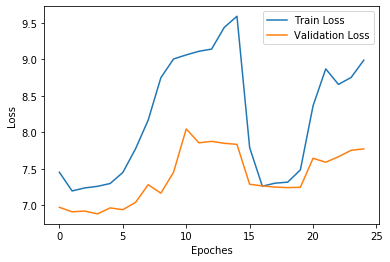

In [18]:
plt.plot(train_loss, label="Train Loss")
plt.plot(dev_loss, label="Validation Loss")
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()

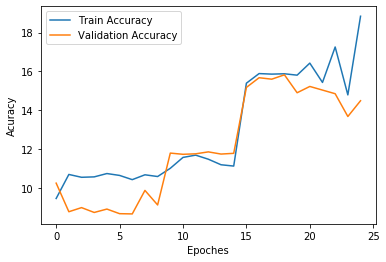

In [19]:
plt.plot(train_acc, label="Train Accuracy")
plt.plot(dev_acc, label="Validation Accuracy")
plt.xlabel('Epoches')
plt.ylabel('Acuracy')
plt.legend()
plt.show()

In [20]:
print('The best validation accuracy is %.2f%%, at epoch %i' % (max(dev_acc),np.argmax(dev_acc)))
print('The best training accuracy is %.2f%%, at epoch %i' % (max(train_acc),np.argmax(train_acc)))

The best validation accuracy is 15.82%, at epoch 18
The best training accuracy is 18.85%, at epoch 24


In [11]:
# How many word in dev not in dict
n_word = 0
for i in dev:
    for w in i:
        if w not in word_dict:
            n_word += 1          

In [7]:
dev_dict = build_dict(dev,max_words=70000)

#Words: 22532 -> 22532
('the', 79009)
(',', 73401)
('.', 62889)
('"', 40420)
('to', 37418)
...
('oneself', 1)
('duchess', 1)
('273', 1)
('8255', 1)
('exits', 1)


In [12]:
percent = n_word*100./len(dev_dict)
print('There is %.2f%% word in validation not in training dictionary' % percent)

There is 10.31% word in validation not in training dictionary
